<a href="https://colab.research.google.com/github/Sherman-1/Learning_learning/blob/main/CoursUnsupervisedLearning2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Formation doctorale en IA, Graduate School Sciences de l’Ingénierie et des Systèmes**
## Université Paris-Saclay

# *Module Apprentissage non supervisé*

*Fred NGOLE MBOULA*
---
<img src="https://drive.google.com/uc?id=1yJvXvlxsR52_SE4uoCL6bSmuGIowVMM6" alt="ml" style=" width:80%" class = "center">



# **From Machine Learning to Unsupervised Learning**

<img src="https://drive.google.com/uc?id=1x0tpIkZ5_yUW2-RiupcOFsB1fnNVjYwU" alt="ml" style="margin-left:10px;width:70%">

*Rosenblatt perceptron*

"*Machine learning* is a field devoted to understanding and building methods that let machines "learn" – that is, methods that leverage data to improve computer performance on some set of tasks" - Wikipedia.
Subfield of AI focused on leveraging data.

**Examples of tasks and applications**
* Recommender systems
* Search engines
* Emails filtering
* Automatic translation
* Objects recognition
* Medical diagnosis
* Predictive maintenance
* Acoustic event recognition
* Game playing

<img src="https://drive.google.com/uc?id=1PuAlguGO0dIescskVT_FeINUbgkRnrzc" alt="ml" style="margin-left:10px;width:50%">

**Learning paradigms**
* *Symbolic reasoning*
  - $\mathbf{x}$: facts, $\mathbf{y}$: inference based on a knowledge base
* *Supervised learning*
  - $(\mathbf{x_1}, \mathbf{y_1}), (\mathbf{x_2}, \mathbf{y_2}), \cdots, (\mathbf{x_n}, \mathbf{y_n})$: find $\mathbf{y}$ for a new $\mathbf{x}$.
* *Weakly supervised learning*
 - weak or noisy labels
* *Semi-supervised learning*
 - $(\mathbf{x_1}, \mathbf{y_1}), (\mathbf{x_2}, \mathbf{y_2}), \cdots, (\mathbf{x_m}, \mathbf{y_m}), \mathbf{x_{m+1}}, \cdots, \mathbf{x_n}$, with $m \ll n$: $\mathbf{y}_i$ for unlabelled $\mathbf{x}_i$.

* *Reinforcement learning*
 - $\mathbf{x}$ is a state, $\mathbf{y}$ is an action to take, leading to a new state. One has (or needs to learn) a cost function $c(\mathbf{x})$ which penalises or rewards each state $\mathbf{x}$.

Whenever the question is complex, answering takes understanding, reasoning, generalization, abstraction, adaptativity, all problem solving skills relating to **intelligence**.





# **From Machine Learning to Unsupervised Learning**

<img src="https://drive.google.com/uc?id=1D8Eq5D_h-KIlYvI4ngndCDLuSIx95_Ez" alt="ml" style=" width:80%" class = "center">

*Lin, T., & Zha, H. (2008). Riemannian manifold learning. IEEE transactions on pattern analysis and machine intelligence, 30(5), 796-809.*

**Unsupervised Learning**

One has a set of observations: $\mathbf{x_1}, \mathbf{x_2}, \cdots, \mathbf{x_n}$. What is there to learn?
*Data organization* in the ambient space.

* Are data embedded in a lower dimensional structure? $⇒$ New coordinates estimation, dimensionality reduction, patterns analysis
* How are data spread across the ambient space? $⇒$ Clustering analysis, density estimation, generative modelling

Uncovering abstract categories and more fundamental variability which leads back to (artificial) intelligence.

**Applications**
* Collaborative filtering
* Customer segmentation
* Anomaly detection
* Data summarization
* Networks data analysis


# **Data clustering**

<img src="https://drive.google.com/uc?id=1iGgFAJNOahrO7vwkVQi02KBOHRgm2kD7" alt="ml" style="margin-left:0px;width:80%">

*John Snow’s Cholera data*

## **Layout**

* Partitional clustering
* Probabilistic clustering
* Hierarchical clustering
* Density based clustering
* Spectral clustering




# **Partional clustering**

Builds a dataset partionning based on initial prototype points and improves the partionning and the prototype points iteratively

## **K-Means algorithm**
The most popular partiotional clustering algorithm

---
1: Select K points as initial centroids

2: **repeat**

> Form K clusters by assigning each point to its closest

> Recompute the centroid of each cluster

3: **until** convergence criterion is met.


---

Let's generate a 2D dataset consisting of 4 gaussian isotropic clusters.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

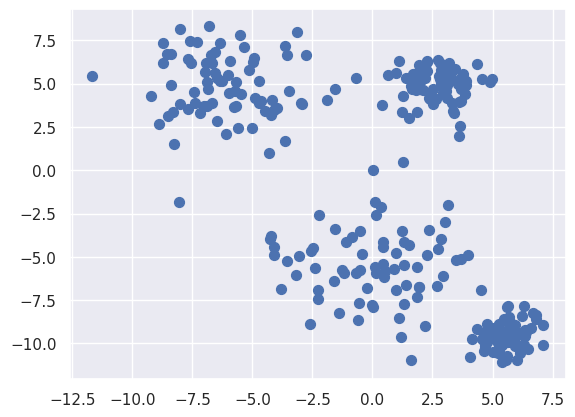

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, n_features=2,
                       cluster_std=[0.7,1,2.5,2], random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=50);

We test the algorithm using the basic implementation below.

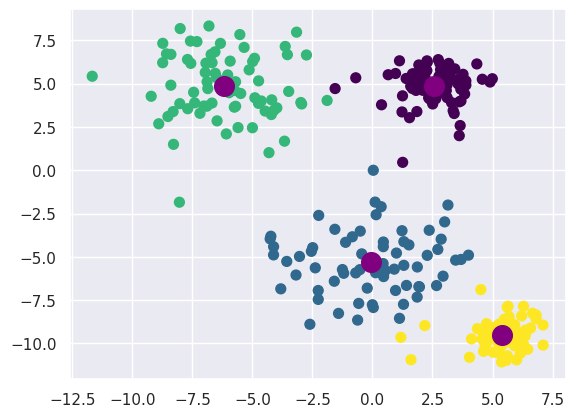

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=3,metric='euclidean'):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    n = 0
    labels_iter = []
    centers_iter = [centers]
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, metric=metric)
        labels_iter.append(labels)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        centers_iter.append(centers)

    return centers_iter, labels_iter

centers_iter, labels_iter = find_clusters(X, 4,rseed=3,metric='euclidean')
plt.scatter(X[:, 0], X[:, 1], c=labels_iter[-1],
            s=50, cmap='viridis');
plt.scatter(centers_iter[-1][:, 0], centers_iter[-1][:, 1], c='purple', s=200);

Thereafter we visualize the clusters and centroids updates after the first iterations.

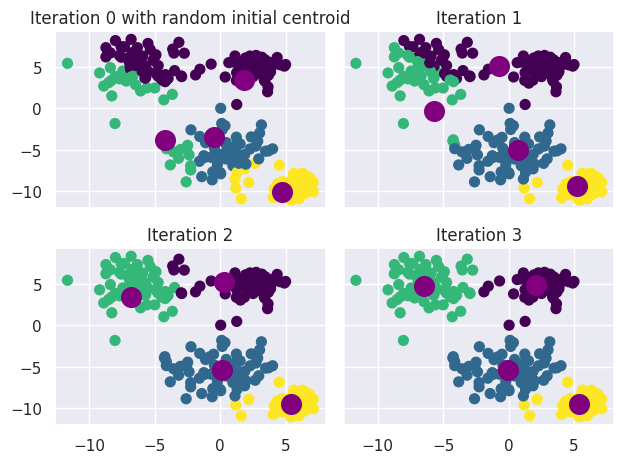

In [ ]:

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

# Iteration 0
it = 0
axs[0, 0].scatter(X[:, 0], X[:, 1], c=labels_iter[it],
            s=50, cmap='viridis');
axs[0, 0].scatter(centers_iter[it][:, 0], centers_iter[it][:, 1], c='purple', s=200);
axs[0, 0].set_title("Iteration "+str(it)+" with random initial centroid")

# Iteration 1
it = 1
axs[0, 1].scatter(X[:, 0], X[:, 1], c=labels_iter[it],
            s=50, cmap='viridis');
axs[0, 1].scatter(centers_iter[it][:, 0], centers_iter[it][:, 1], c='purple', s=200);
axs[0, 1].set_title("Iteration "+str(it))

it = 2
axs[1, 0].scatter(X[:, 0], X[:, 1], c=labels_iter[it],
            s=50, cmap='viridis');
axs[1, 0].scatter(centers_iter[it][:, 0], centers_iter[it][:, 1], c='purple', s=200);
axs[1, 0].set_title("Iteration "+str(it))


it = 3
axs[1, 1].scatter(X[:, 0], X[:, 1], c=labels_iter[it],
            s=50, cmap='viridis');
axs[1, 1].scatter(centers_iter[it][:, 0], centers_iter[it][:, 1], c='purple', s=200);
axs[1, 1].set_title("Iteration "+str(it))

plt.tight_layout()
plt.show()

When the euclidean distance is used as the proximity measure, the K-Means algorithm finds a local minimum of an objective function called the Sum of Squared Errors (SSE).

For a dataset $\mathcal{D} = \{\mathbf{x}_1,\cdots,\mathbf{x}_n\}$, we denote the clustering obtained after applying K-Means clustering by $\mathcal{C} = \{C_1,\cdots,C_K\}$.  $\mathcal{C}$ is a partition of the set $\{1,\cdots,n\}$, i.e.

- $C_i \cap C_j = \emptyset\; \forall\; i,j \in \{1,\cdots,K\}, \; i\neq j$,
- $\bigcup_{i=1}^K C_i = \{1,\cdots,n\}$.

The SSE score is computed as follows:

$\text{SSE}(\mathcal{C},\mathbf{c}_1,\cdots,\mathbf{c}_K) = \sum_{k=1}^K \sum_{i\in C_k} \|\mathbf{x}_i-\mathbf{c}_k\|_2^2$, where $\mathbf{c}_k$ is a representative of the cluster $\mathcal{C}_k$.

The gradient of SSE with respect to $\mathbf{c}_k$ is given by

$\nabla_{\mathbf{c}_k} \text{SSE}(\mathcal{C},\mathbf{c}_1,\cdots,\mathbf{c}_K) = \sum_{i\in C_k} 2(\mathbf{c}_k - \mathbf{x}_i) $.

Thus $\sum_{\mathbf{x}_i\in C_k} 2(\mathbf{c}_k - \mathbf{x}_i) = 0 \Rightarrow \mathbf{c}_k^* = \sum_{i\in C_k} \frac{\mathbf{x}_i}{|C_k|}$

Hence the K-Means centroid update's rule.

The $k^{\text{th}}$cluster is then updated as follows:
$C_k^* = \{i \in \{1,\cdots,n\} / k = \underset{l\in \{1,\cdots, K\}}{\text{argmin}} \|\mathbf{x}_i-\mathbf{c}_l\|_2^2\}$.

Thus, the SSE decreases with each K-Means iteration.


## **K-Means parameters**
The K-Means algorithm performance is critically affected by the following parameters:
1. The centroids initialization,
2. The number of clusters K.

### **Centroids initialization**

The initialization influence can be seen on the previous example by simpling changing the random generator seed.

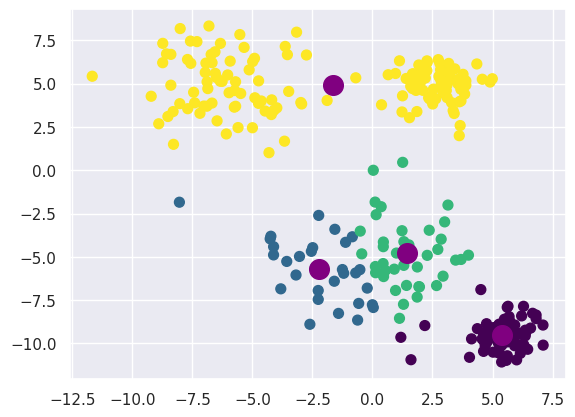

In [ ]:
centers_iter, labels_iter = find_clusters(X, 4,rseed=2,metric='euclidean')
plt.scatter(X[:, 0], X[:, 1], c=labels_iter[-1],
            s=50, cmap='viridis');
plt.scatter(centers_iter[-1][:, 0], centers_iter[-1][:, 1], c='purple', s=200);

## **Forgy method**

Named after Edward W. Forgy who reinvented the k-means algorithm independantly, it simply consists in choosing K random points in the dataset as initial centroid. It is motivated by the fact that good clusters representatives lie in higher density regions.





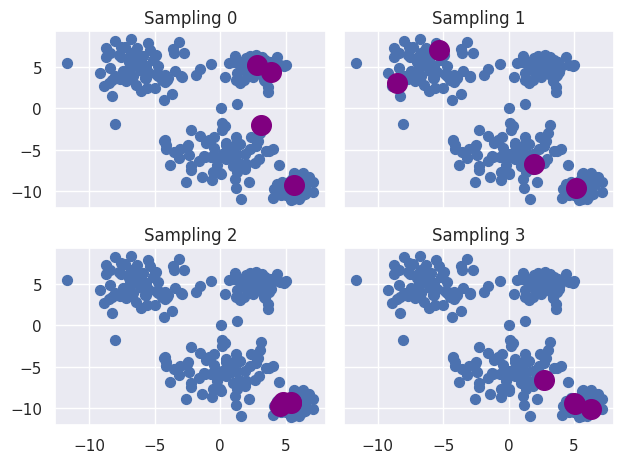

In [ ]:
def forgy_initialize(X, k,nb_samplings=5):
    '''Return Randomly sampled points from the data'''
    centers_list = []
    for i in range(nb_samplings):
      centers_list.append(X[np.random.choice(range(X.shape[0]), replace = False,     size = k), :])
    return centers_list

centers = forgy_initialize(X, 4)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

# Iteration 0
it = 0
axs[0, 0].scatter(X[:, 0], X[:, 1],
            s=50);
axs[0, 0].scatter(centers[it][:, 0], centers[it][:, 1], c='purple', s=200);
axs[0, 0].set_title("Sampling "+str(it))

# Iteration 1
it = 1
axs[0, 1].scatter(X[:, 0], X[:, 1],
            s=50);
axs[0, 1].scatter(centers[it][:, 0], centers[it][:, 1], c='purple', s=200);
axs[0, 1].set_title("Sampling "+str(it))

it = 2
axs[1, 0].scatter(X[:, 0], X[:, 1],
            s=50);
axs[1, 0].scatter(centers[it][:, 0], centers[it][:, 1], c='purple', s=200);
axs[1, 0].set_title("Sampling "+str(it))


it = 3
axs[1, 1].scatter(X[:, 0], X[:, 1],
            s=50);
axs[1, 1].scatter(centers[it][:, 0], centers[it][:, 1], c='purple', s=200);
axs[1, 1].set_title("Sampling "+str(it))

plt.tight_layout()
plt.show()

An immediate drawback of this initialization is that the firts representatives can be sampled from the same dense region. A natural improvement consists in selective successive initial centroids conditionally to the previously chosen one in such a way to make sampling from the same dense region unlikely.

## **The K-Means++ algorithm**

---
1. Choose the first initial cluster representative $\mathbf{c}_1$ uniformly at random from $\mathcal{D}$.
2. For each sample $\mathbf{x}_i$ not chosen yet, compute $d(\mathbf{x}_i)$, the distance between $\mathbf{x}_i$ and the nearest center that has already been chosen.
3. Sample the next initial cluster representative $\mathbf{c}_k$ from the set $\mathcal{D}'$ of the remaining data points with the probability $\mathbb{P}(\mathbf{x}_i) = \frac{d(\mathbf{x}_i)^2}{\sum_{\mathbf{x}\in \mathcal{D}'} d(\mathbf{x})^2}$
4. Repeat steps 2. and 3. until K clusters representatives have been chosen.
---

Arthur, D., & Vassilvitskii, S. (2007, January). K-means++ the advantages of careful seeding. In Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms (pp. 1027-1035).


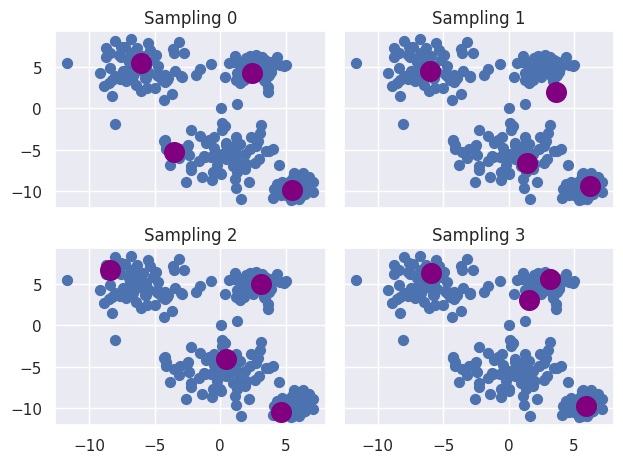

In [ ]:
def dist(data, centers):
    distance = np.sum((np.array(centers) - data[:, None, :])**2, axis = 2)
    return distance

def kmeans_plus_plus(X, k, pdf_method = True):
    '''Initialize one point at random.
    loop for k - 1 iterations:
        Next, calculate for each point the distance of the point from its nearest center. Sample a point with a
        probability proportional to the square of the distance of the point from its nearest center.'''
    centers = []
    X = np.array(X)
    # Sample the first point
    initial_index = np.random.choice(range(X.shape[0]), )
    centers.append(X[initial_index, :].tolist())
    # Loop and select the remaining points
    for i in range(k - 1):
        distance = dist(X, np.array(centers))
        if i == 0:
            pdf = distance/np.sum(distance)
            centroid_new = X[np.random.choice(range(X.shape[0]), replace = False, p = pdf.flatten())]
        else:
            # Calculate the distance of each point from its nearest centroid
            dist_min = np.min(distance, axis = 1)
            if pdf_method == True:
                pdf = dist_min/np.sum(dist_min)
                # Sample one point from the given distribution
                centroid_new = X[np.random.choice(range(X.shape[0]), replace = False, p = pdf)]
            else:
                index_max = np.argmax(dist_min, axis = 0)
                centroid_new = X[index_max, :]
        centers.append(centroid_new.tolist())

    return np.array(centers)

nb_sampling = 5
centers = [kmeans_plus_plus(X, 4) for i in range(nb_sampling)]


fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

# Iteration 0
it = 0
axs[0, 0].scatter(X[:, 0], X[:, 1],
            s=50);
axs[0, 0].scatter(centers[it][:, 0], centers[it][:, 1], c='purple', s=200);
axs[0, 0].set_title("Sampling "+str(it))

# Iteration 1
it = 1
axs[0, 1].scatter(X[:, 0], X[:, 1],
            s=50);
axs[0, 1].scatter(centers[it][:, 0], centers[it][:, 1], c='purple', s=200);
axs[0, 1].set_title("Sampling "+str(it))

it = 2
axs[1, 0].scatter(X[:, 0], X[:, 1],
            s=50);
axs[1, 0].scatter(centers[it][:, 0], centers[it][:, 1], c='purple', s=200);
axs[1, 0].set_title("Sampling "+str(it))


it = 3
axs[1, 1].scatter(X[:, 0], X[:, 1],
            s=50);
axs[1, 1].scatter(centers[it][:, 0], centers[it][:, 1], c='purple', s=200);
axs[1, 1].set_title("Sampling "+str(it))

plt.tight_layout()
plt.show()

Let $E[\text{SSE}]$ denote the $\text{SSE}$ expectation at convergence when using K-Means++ for centroids initialization and $\text{SSE}_{\text{opt}}$ the global minimum of the $\text{SSE}$ for K clusters.
The following bound holds:

$E[\text{SSE}]\leq 8(\ln(K)+2)\text{SSE}_{\text{opt}}$.

Thus, if the optimal oracle partition has a very small $\text{SSE}$, then the $\text{SSE}$ obtained using K-Means++ is guaranteed to be small in expectation.

## **Number of clusters estimation**

In the previous illustrations, the actual number of clusters where known before hand, which is not always the case in real applications.
We show K-Means clustering results on our toy dataset with three and five clusters below.

Text(0.5, 1.0, '5 clusters')

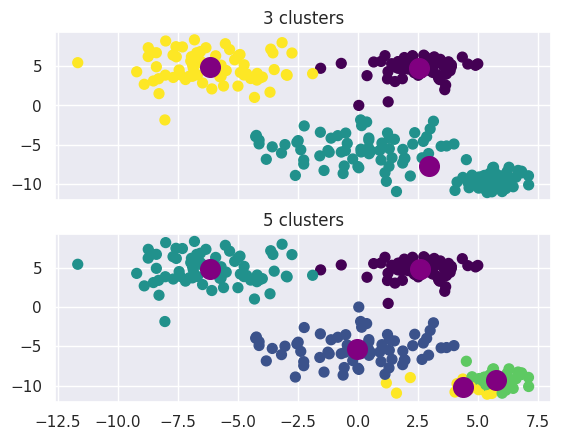

In [ ]:
centers_iter_3, labels_iter_3 = find_clusters(X, 3,rseed=3,metric='euclidean')
centers_iter_5, labels_iter_5 = find_clusters(X, 5,rseed=3,metric='euclidean')
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].scatter(X[:, 0], X[:, 1], c=labels_iter_3[-1],
            s=50, cmap='viridis')
axs[0].scatter(centers_iter_3[-1][:, 0], centers_iter_3[-1][:, 1], c='purple', s=200)
axs[0].set_title("3 clusters")

axs[1].scatter(X[:, 0], X[:, 1], c=labels_iter_5[-1],
            s=50, cmap='viridis')
axs[1].scatter(centers_iter_5[-1][:, 0], centers_iter_5[-1][:, 1], c='purple', s=200)
axs[1].set_title("5 clusters")

Several criterion and methods have been proposed in the literature to estimate the number of clusters.

### **Gap Statistic**
*Robert Tibshirani and others, Estimating the Number of Clusters in a Data Set Via the Gap Statistic, Journal of the Royal Statistical Society Series B: Statistical Methodology, Volume 63, Issue 2, July 2001*

The gap statistic approach proceeds from the intuition that as long as the number of clusters is underestimated, one expects a rapid decrease of the SSE as a function of K due to a successful idendification of a "natural" cluster. More formally, it means that $\text{SSE}(K+1)\ll \text{SSE}(K)$ for $K < K^*$, $K^*$ being the ground truth number of clusters. On the other hand, once $K$ becomes larger than $K^*$, one starts partionning the natural clusters which shall yield a slower decrease in SSE, as the former are more homogeneous. This change of steepness is the *gap* to be detected.

Let $\text{SSE}(K)$ denote the SSE of the clustering solution on the dataset for K clusters and $\text{SSE}_u(K)$, the SSE obtained on a random dataset uniformly distributed in a box containing the real data.

The following quantity is computed:

$\text{Gap}(K) = \frac{1}{B} \sum_{l=1}^B \log(\text{SSE}_u(K)) - \log(\text{SSE}(K))$, where the uniformly distributed dataset is drawn $B$ times.

Then $K^*$ is estimated as

$K^*  = \underset{K}{\text{argmin}} \{K /\text{Gap}(K) >\text{Gap}(K+1)-s_{k+1}\}$,
$s_{k+1}$ being an estimate of the standard deviation of $\log(\text{SSE}_u(K+1))$.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

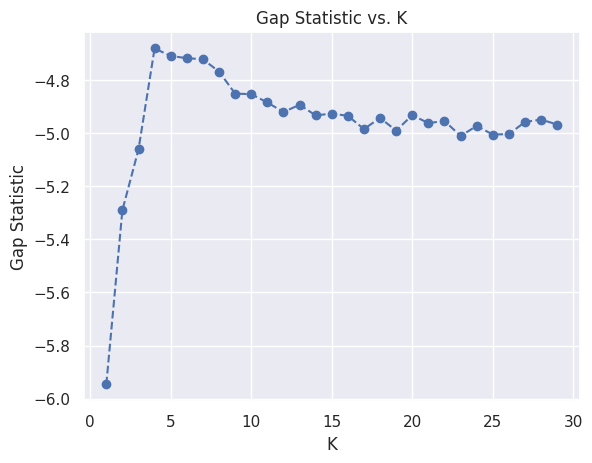

In [ ]:
# Gap Statistic for K means
import pandas as pd
from sklearn.cluster import KMeans
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):

            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)

            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)

            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)

        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap

        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

score_g, df = optimalK(X, nrefs=5, maxClusters=30)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

### **Silhouette coefficient**

One approach to select K consists informally in maximizing the inter cluster distance while minimizing the intra cluster variability. A common criterion with this respect is the average Silhouette Coefficient, which is computed as follows:

$S = \frac{\sum_{i=1}^n\frac{b_i-a_i}{\text{max}(a_i,b_i)}}{n}$,

where $a_i$ is the average distance between a data point $\mathbf{x}_i$ and the points assigned to the same cluster and $b_i$ is the average distance between $\mathbf{x}_i$ and the points assigned to other clusters.

The silhouette coefficient value ranges from -1 to 1 and its interpretation is rather intuitive. For instance, an average silhouette coefficient equal to 0.8 implies that on average, the distance between two points belonging to different clusters is 5 times higher than the distance between two points belonging to the same cluster.




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

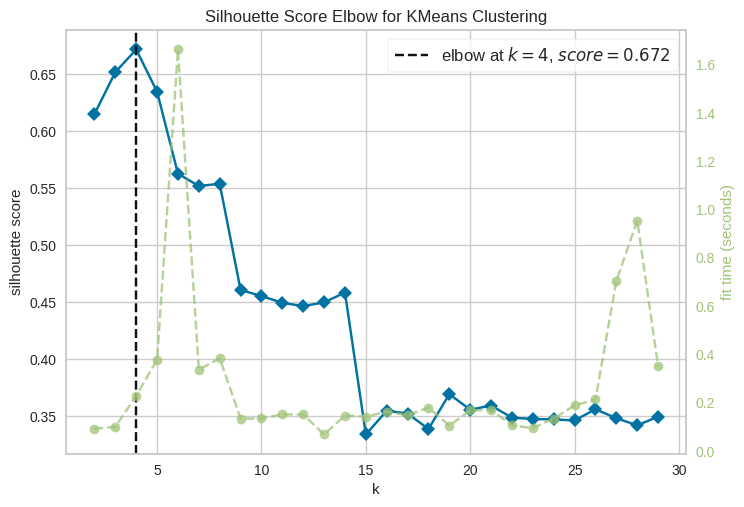

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:

# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## **K-Means variations**
K-Means simplicity makes very simple to make modifications to build a more efficient algorithm.
Common variants are based on
1. Choosing cluster representatives different manners,
2. Using different dissimilarity measures,
3. Choosing better initial centroids.



### **Robust variants**

K-Means algorithm lacks robustness with respect to outliers because square Euclidean distance places the highest influence on
the largest distances.


We introduce two robust variants. The **K-Medoid clustering** algorithm chooses each cluster representative as one of the data point solving the following optimization problem:

$\mathbf{m}_k = \underset{i \in C_k}{\text{argmin}} \sum_{j\in C_k} D(\mathbf{x}_j,\mathbf{x}_i)$, where $D$ is a dissimilarity measure.

The clusters update is unchanged.
It is worth noting that the clusters centers computation in K-Medoid clustering has a complexity of $O(|C_k|^2)$ as opposed to $O(|C_k|)$ in the regular K-Means algorithm. Besides, the K-Medoid clustering can be performed solely based on the dissimilary matrix since the algorithm only performs indices updates. The actual data points are not required. In a sense, it is more general than the K-Means algorithm.

Another variant is the **K-Medians clustering**. The cluster representative is calculated as follows:

$\mathbf{m}_k = \underset{\mathbf{m}}{\text{argmin}} \sum_{i\in C_k} \|\mathbf{x}_i-\mathbf{m}\|_1$.

The $j^\text{th}$ component of $\mathbf{m}_k$ is given by
$\mathbf{m}_k[j] = \text{median}\{\mathbf{x}_i[j], i\in C_k\}$. The median enforces robustness with respect to extremal values. Besides, contrary to the K-Medoid clustering, in the K-Median clustering, the clusters centers are not actual instances of the dataset.

# **Probabilistic clustering**

<img src="https://drive.google.com/uc?id=1dloOzngN3TLPJezj1UlsXukq7MKzFbYK" alt="ml" style="width:50%" class="center">


The K-Means clustering algorithm partitions the data space following a Voronoi diagram where each cell is cluster. It does not weight the degree of membership of data points to the cluster, which intuitively is more uncertain at cells boundaries, and low far from clusters centers. Besides, the detected clusters tend to be isotropic and balanced (the uniform effect).

*Probabilistic models* allows for more flexibility in both respect.


## **Mixture models**
Probabilistic clustering aims at modelling the observed data points as the result of a random process which depends on underlying factors which define the clusters.

<img src="https://drive.google.com/uc?id=1kXdqqbIvZRopZuQmi9f_rOqVxvbAM0G7" alt="ml" style="width:50%" class="center">

A mixture model formalizes this view defining the probability density of a data point $\mathbf{x}$ as follows:


$p_X(\mathbf{x}) = \sum_{k=1}^K \mathbb{P}(Z = k)p_{X|Z}(\mathbf{x}|Z = k)$, where $K$ is the number of components of the mixture model (i.e. the number of clusters. $Z$ is a random discrete variable which takes values in $\{1,\cdots,K\}$ and determines the model component from which the observation $\mathbf{x}$ is to be drawn. Finally,
$p_{X|Z}(\mathbf{x}|Z = k)$ is the probability density of the $k^\text{th}$ mixture component, evaluated for the data point $\mathbf{x}$. $\mathbb{P}(Z = k)$ sets the overall weight of the component $k$ in explaing the dataset. We simply note $\mathbb{P}(Z = k) = \pi_k$ thereafter.

$p_{X|Z}(.|Z=k)$ depends upon parameters that needs to be estimated from the data.

For instance, in **Gaussian Mixture Models** (GMM), $p_{X|Z}(.|Z=k) = \mathcal{N}(\boldsymbol{\mu}_k,\mathbf{\Sigma_k}) $, which is

$p_{X|Z}(\mathbf{x}|Z=k)  = \frac{1}{\sqrt{(2\pi)^d|\mathbf{\Sigma_k}|}}\exp(-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_k)^T\mathbf{\Sigma_k}^{-1}(\mathbf{x}-\boldsymbol{\mu}_k))$.
$d$ is the data space dimension, $\boldsymbol{\mu}_k$ is the d-dimensional gaussian's mean, $\mathbf{\Sigma_k}$ is the $d \times d$ covariance matrix and $|\mathbf{\Sigma_k}|$ denotes its determinant.

In general, $p_{X|Z}(.|Z=k)$ is defined as a parametric function $f_{\boldsymbol{\theta}_k}$, where $\boldsymbol{\theta}_k$ is a set of parameters to be estimated from the data. Those are $\boldsymbol{\mu}_k$ and $\mathbf{\Sigma_k}$ for the GMM.

**Expectation-maximization algorithm**

Let $\boldsymbol{\Theta}$ denote the mixture model set of parameters. The log-likelihood function on the dataset $\mathcal{D}$ if defined as

$l(\boldsymbol{\Theta}) = \log(\prod_{i=1}^n p_{X,\boldsymbol{\Theta}}(\mathbf{x}_i)) = \log(\prod_{i=1}^n \sum_{k=1}^K \pi_k p_{X|Z,\boldsymbol{\Theta}}(\mathbf{x}_i|Z = k)) = \sum_{i=1}^n \log(\sum_{k=1}^K \pi_k p_{X|Z,\boldsymbol{\Theta}}(\mathbf{x}_i|Z = k))$.

The Maximum Likelihood Estimation (MLE) consists in calculating $\boldsymbol{\Theta}$ as

$\boldsymbol{\Theta}_{ML} = \underset{\boldsymbol{\Theta}}{\text{argmax }} l(\boldsymbol{\Theta})$.

For GMM, $l(\boldsymbol{\Theta}) = \sum_{i=1}^n \log(\sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}_i|\boldsymbol{\mu}_k,\mathbf{\Sigma_k}))$.

Setting the likelihood derivatives with respect to $\boldsymbol{\mu}_k$, $\mathbf{\Sigma_k}$ and $\pi_k$ to 0 yields the following equalities:

$\boldsymbol{\mu}_k = \frac{\sum_{i=1}^n \gamma_{ik} \mathbf{x}_i}{\sum_{i=1}^n \gamma_{ik}}$

$\mathbf{\Sigma}_k = \frac{\sum_{i=1}^n \gamma_{ik} (\mathbf{x}_i-\boldsymbol{\mu}_k)(\mathbf{x}_i-\boldsymbol{\mu}_k)^T}{\sum_{i=1}^n \gamma_{ik}}$

$\pi_k = \frac{\sum_{i=1}^n \gamma_{ik}}{n}$

and $\gamma_{ik} = \mathbb{P}(Z=k|\mathbf{x}_i) = \frac{\pi_k \mathcal{N}(\mathbf{x}_i|\boldsymbol{\mu}_k,\mathbf{\Sigma_k}))}{\sum_{j=1}^K \pi_j \mathcal{N}(\mathbf{x}_i|\boldsymbol{\mu}_j,\mathbf{\Sigma_j}))}$,  as a consequence of Bayes theorem. It quantifies how much the $k^{\text{th}}$ component of the model can be accounted for the occurrence of the data point $\mathbf{x}_i$.

Given that $\gamma_{ik}$ depends on $\boldsymbol{\mu}_k$, $\mathbf{\Sigma_k}$ and $\pi_k$, those equalities are not closed-form solutions. However it suggests the following alternate iterative scheme:

---
**Expectation-Maximisation algorithm or Gaussian Mixture Model**

---
1. Initialize $\boldsymbol{\mu}_k^{(0)}$, $\mathbf{\Sigma_k}^{(0)}$ and $\pi_k^{(0)}$
2. **E-Step** Compute $\gamma_{ik}^{(l)}$ using $\boldsymbol{\mu}_k^{(l-1)}$, $\mathbf{\Sigma_k}^{(l-1)}$ and $\pi_k^{(l-1)}$
3. **M-Step** Compute $\boldsymbol{\mu}_k^{(l)}$, $\mathbf{\Sigma_k}^{(l)}$ and $\pi_k^{(l)}$ using $\gamma_{ik}^{(l)}$.

----

At step 2., the *complete* log-likelihood expectation with respect to the $Z$ posterior probabilities can be computed as

$\mathcal{Q}(\boldsymbol{\Theta},\boldsymbol{\Theta}^{(l)}) = \sum_{i=1}^n \sum_{k=1}^K \gamma_{ik}^{(l)}\log( p_{X|Z,\boldsymbol{\Theta}}(\mathbf{x}_i|Z = k))$.

The **M-Step** precisely maximises $\mathcal{Q}(\boldsymbol{\Theta},\boldsymbol{\Theta}^{(l-1)})$.

The generated sequence $(\boldsymbol{\Theta}^{(l)})_l$ actually converges to a local maximum of $l(\boldsymbol{\Theta})$, which holds true besides GMM.



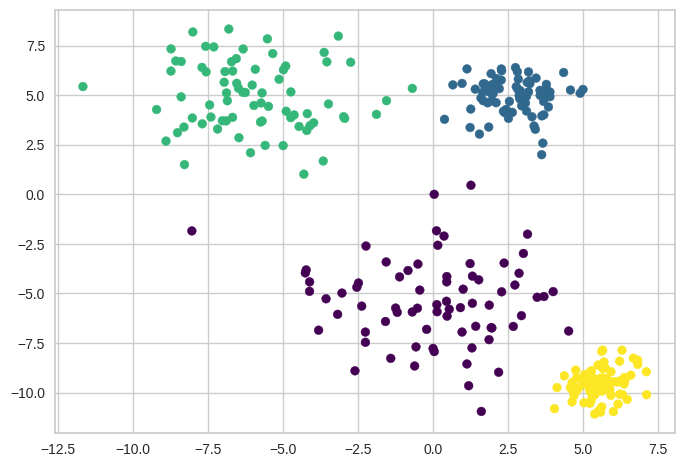

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
probs = gmm.predict_proba(X)
print(probs[:10].round(3))

[[0.001 0.    0.    0.999]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [0.987 0.    0.013 0.   ]
 [0.001 0.    0.    0.999]
 [0.    0.998 0.002 0.   ]
 [0.    1.    0.    0.   ]]


In [ ]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, ec='black', fc='lightgray',
                                lw=3, alpha=0.5, zorder=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


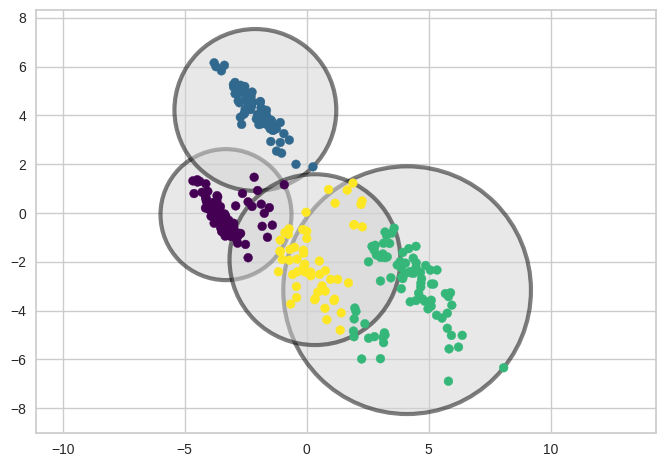

In [ ]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

<ipython-input-29-3014cb791912>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


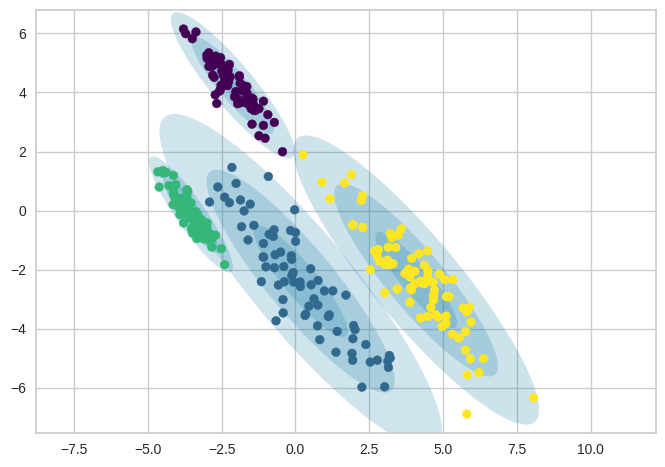

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X_stretched)

# **Hierarchical clustering**

<img src="https://drive.google.com/uc?id=16tY96oj2xQ7zS3PC2HiT2nZmWIr3x_2s" alt="ml" style="width:50%" class="center">

- Partionning and probabilistic models can not recover clusters of arbitrary shapes.
- The number of clusters or components has to specified.
- No relationship between clustering solutions for different numbers of clusters.


**Hierarchical clustering** methods aims at proposing several nested clustering solutions among which the practioner can choose, especially thanks to the *dendogram* data structure which provides a practical view of the dataset organisation.


## **Two paradigms**
1. Agglomerative clustering (bottom-up approach): from singleton clusters to the whole dataset merging two clusters at the time
2. Divisive clustering (top-down approach): from the whole dataset, to smaller clusters, dividing one cluster at the time

### Agglomerative clustering
Agglomerative clustering methods proceed by merging the two clusters with the smallest inter cluster dissimilarity at each step. Thus, they differ in the way of measuring clusters dissimilarity.

**Dissimilarity measures between clusters**
We consider two clusters $G$ and $H$.
Let $d_{ij}$ the pairwise dissimilarity between the data point $i$ and the data point $j$ and $\mathcal{d}(G,H)$ the dissimilarity between $G$ and $H$.
- Single linkage

$d_{SL}(G,H) = \underset{\mathbf{x}_i\in G,\mathbf{x}_j\in H}{\min} d_{ij}$

<img src="https://drive.google.com/uc?id=1_TQgAlzhHTpwG6RIailOgYMYm8VDE3iI" alt="ml" style="margin-left:10px;width:30%">

This linkage tends to produce elongated clusters (chaining effect) and is sensitive to noise.

- Complete linkage

$d_{CL}(G,H) = \underset{\mathbf{x}_i\in G,\mathbf{x}_j\in H}{\max} d_{ij}$

<img src="https://drive.google.com/uc?id=1lDcRo1rceUpqZm7Jvjypi9jyYktm21bm" alt="ml" style="margin-left:10px;width:30%">

This linkage tends to produce compact clusters. However data points assigned to a cluster can be much
closer to members of other clusters than they are to some members of their own cluster, due to noise.

- Group average linkage

$d_{GA}(G,H) = \frac{1}{|G||H|} \sum_{\mathbf{x}_i\in G}\sum_{\mathbf{x}_j\in H} d_{ij}$

<img src="https://drive.google.com/uc?id=1fnNHlKJWDvdh5ZXVsSUjwyROGSYmJte4" alt="ml" style="margin-left:10px;width:30%">

- Ward linkage

$d_{W}(G,H) = \text{SSE}(G\bigcup H)-(\text{SSE}(G)+\text{SSE}(H)) = \frac{|G||H|}{|G|+|H|}\|\mathbf{x}_G-\mathbf{x}_H\|_2^2$, where $\mathbf{x}_G$ and $\mathbf{x}_H$ are $G$ and $H$ centroids respectively. It is assumed in this case that $d_{ij} = \|\mathbf{x}_i-\mathbf{x}_j\|_2^2$.

<img src="https://drive.google.com/uc?id=1VECQzc8NIcHnStlTsNDpKrv3reApeywf" alt="ml" style="margin-left:10px;width:30%">

The last two linkage mitigates the drawbacks of the first one by involving all the data points in the dissimilarity measurement. $d_W$ is cheaper to compute than $d_{GA}$ when the clusters sizes become large.



In [ ]:
url = 'https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv'
customer_data = pd.read_csv(url)

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [ ]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:

customer_data.describe().transpose()

count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


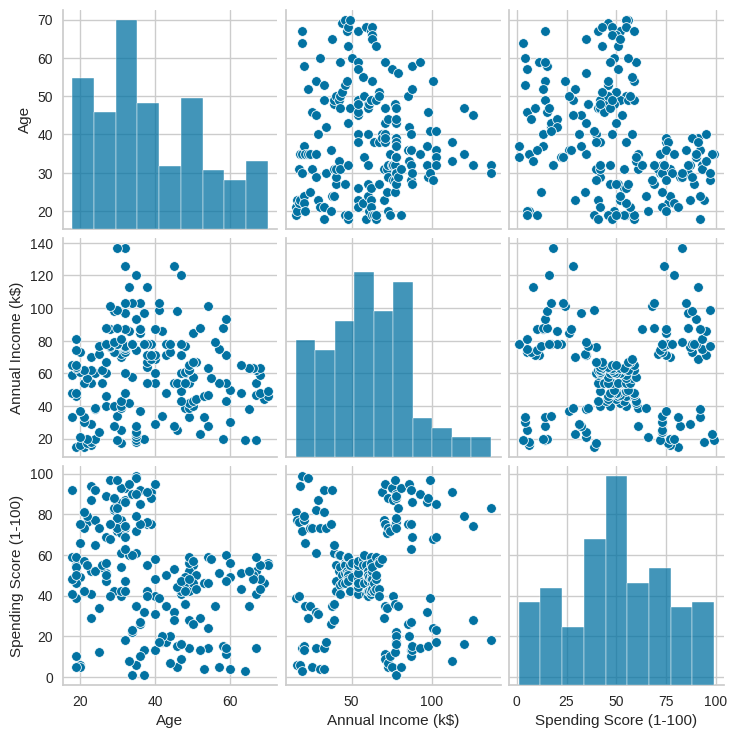

In [ ]:
import seaborn as sns

# Dropping CustomerID column from data
customer_data = customer_data.drop('CustomerID', axis=1)

sns.pairplot(customer_data)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

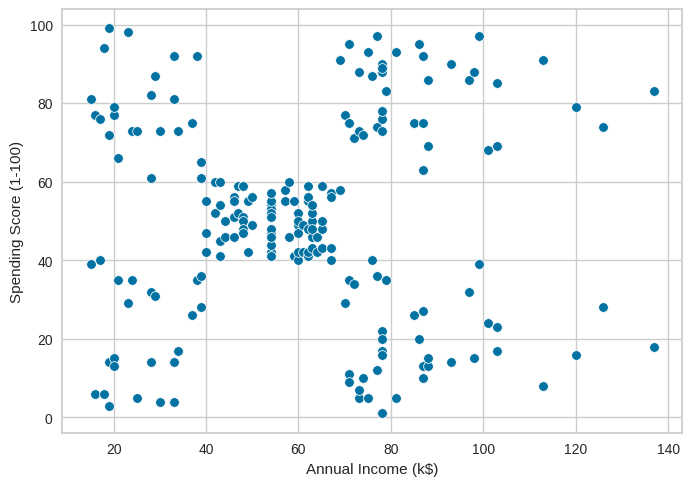

In [ ]:
sns.scatterplot(x=customer_data['Annual Income (k$)'],
                y=customer_data['Spending Score (1-100)'])

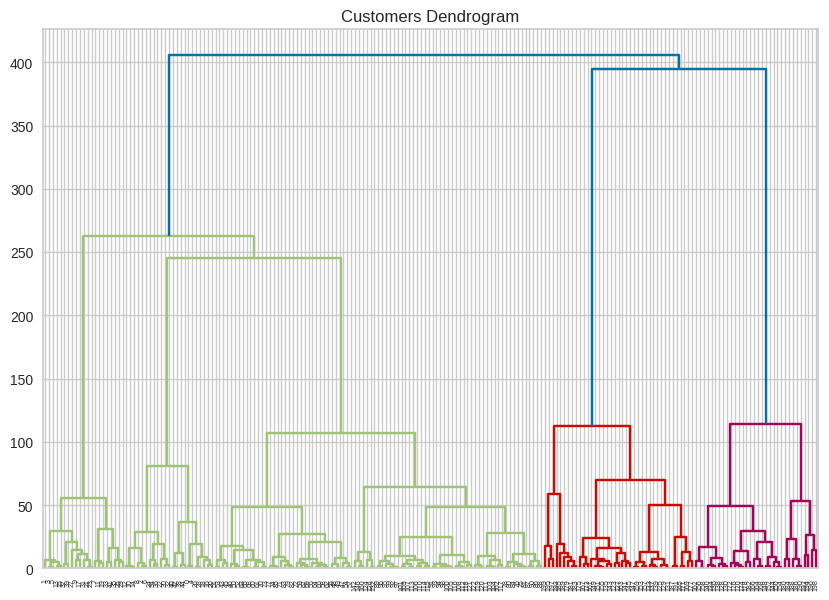

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = customer_data.iloc[:, 2:]
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

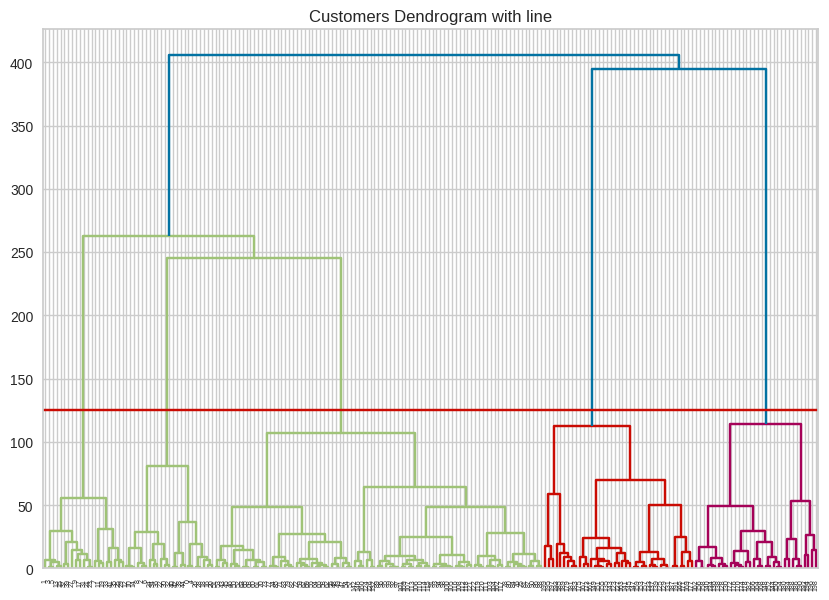

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

Text(0.5, 1.0, 'Labeled Customer Data')

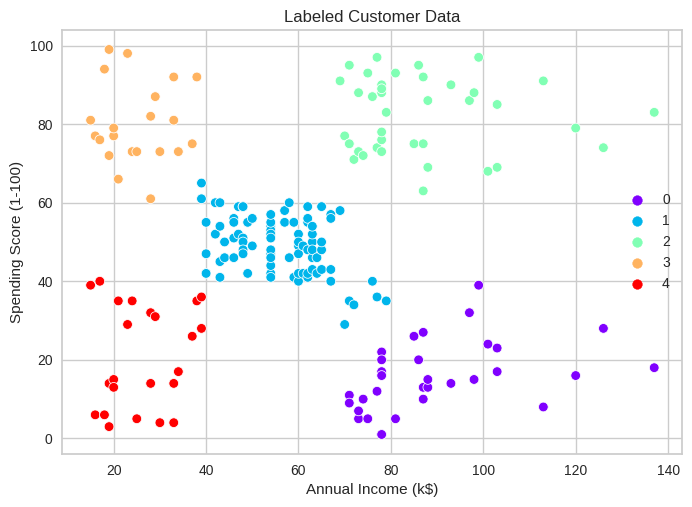

In [ ]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=selected_data,
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')

The dendogram can be viewed as a dataset's summary.

### Divisive clustering

- Potential interest over agglomerative clustering when one is looking for a small number of clusters
- K-Means-like clustering algorithm can be used to split clusters at each step

The cluster to be divided might be chosen as the one with the largest diameter $D_G = \underset{\mathbf{x}_i, \mathbf{x}_j\in G}{\max}d_{ij}$.
A somewhat more robust criterion is the average intra cluster dissimilarity.



### Limitations
- Decision made at one level can not be refined latter on in the clustering process.
- Different merger or splitting criteria and small changes in the dataset can produce different clustering solutions, especially if the dataset does not have a strong clustering tendency.
- Hierarchical methods impose hierarchical structure whether or not such structure actually exists in the data. The relevance of this structure can be assessed using the cophenetic correlation coefficient.

# **Density based clustering**

<img src="https://drive.google.com/uc?id=1itMdFysO5XMdcE_f9CMgYtWeW1M0h5Ho" alt="ml" style="width:70%" class="center">

Density based clustering has been developped to address the problem of finding clusters of arbitrary shapes while handling noise and outliers.
In this framework, clusters are dense connected regions of the data space surrounded by sparse regions where lie noise and outliers.

The key questions will be:
- How is connectivity defined?
- How is density measured?

**DBSCAN**

$\text{dist}(\mathbf{x}_i,\mathbf{x}_j)$ denotes a distance value between the data points $\mathbf{x}_i$ and $\mathbf{x}_j$ in the dataset $\mathcal{D}$.

We introduce a couple of tools which will enable a formal definition of a cluster in this paradigm.

The eps-neighborhood of a data point $\mathbf{x}_i$ is defined as

$NEps(\mathbf{x}_i) = \{\mathbf{x} \in \mathcal{D}/ \text{dist}(\mathbf{x}_i,\mathbf{x}) \leq Eps\}$.

$\mathbf{x}_i$ is a *core point* if $NEps(\mathbf{x}_i)$ contains at least $MinPts$ points.

$\mathbf{x}_j$ is *directly density reachable* from $\mathbf{x}_i$ if $\mathbf{x}_i$ is a core point and $\mathbf{x}_j \in NEps(\mathbf{x}_i)$.

$\mathbf{x}_j$ is *density reachable* from $\mathbf{x}_i$ if there is a sequence of data points $\mathbf{p}_1,\cdots,\mathbf{p}_l \in \mathcal{D}$ such that $\mathbf{p}_1 = \mathbf{x}_i$, $\mathbf{p}_l = \mathbf{x}_j$ and $\forall k \in \{1,\cdots, l-1\}$, $\mathbf{p}_{k+1}$ is directly density reachable from $\mathbf{p}_k$.

$\mathbf{x}_i$ is *density connected* to $\mathbf{x}_j$ if there is a data point $\mathbf{o}$ such that $\mathbf{x}_i$ and $\mathbf{x}_j$ are density reachable from $\mathbf{o}$ with respect of $Eps$ and $MinPts$.
Density connectivity can be thought of as a symmetrised extension of the density reachability.

Then a cluster with respect to $Eps$ and $MinPts$ is a non-empty subset $\mathcal{C}$ of $\mathcal{D}$ satisfying
1. $\forall \mathbf{x}_i \in \mathcal{C}$ and $\mathbf{x}_j \in \mathcal{D}$, if $\mathbf{x}_j$ is density reachable from $\mathbf{x}_i$, then $\mathbf{x}_j \in \mathcal{C}$.

2. $\forall \mathbf{x}_i,\; \mathbf{x}_j \in \mathcal{C}$, $\mathbf{x}_i$ is density connected to $\mathbf{x}_j$ with respect to $Eps$ and $MinPts$.

<img src="https://drive.google.com/uc?id=17QWid21O5w2g0a3m2C8oes4xYCDxB6xJ" alt="ml" style="margin-left:10px;width:55%">

Besides, $\mathbf{x}_i$ is a border point if it belongs to a cluster and his neighborhood is not dense, i.e. $|NEps(\mathbf{x}_i)|< MinPts$.

Finally, noisy points are data points who does not belong to any cluster.

Clusters defines in this way has a nice property which is, they are uniquely determine as the set of all the data points density reachable from any of the cluster's core points.
It follows that, to find clusters, DBSCAN algorithm
- selects an an arbitrary data point $\mathbf{x}_i$ and retrieves all points density-reachable from $\mathbf{x}_i$ with respect to $Eps$ and $MinPts$;
- if $\mathbf{x}_i$ is a core point, DBSCAN identifies a cluster
- if not, $\mathbf{x}_i$ is labeled as noise and may be assigned to cluster later on in the procedure
- the procedure terminates when all points have been assigned to clusters or labelled as noise.

Thus, the number of clusters need not to provided and the clustering solution is not impaired by the presence of outliers by construction. Moreover, it makes no assumption on the clusters shapes. However, the clustering solution is dependant on the parameters $Eps$ and $MinPts$.


**OPTICS**

An important limitation of DBSCAN is the use of global density parameters. A dataset might have variable densities due for instance to sampling bias.

OPTICS algorithm extends DBSCAN framework to handle varying densities.
Assuming global density parameters $Eps$ and $MinPts$, two new notions are introduced.

1. **The core distance**

For a data point $\mathbf{x}_i \in \mathcal{D}$, $NEps(\mathbf{x}_i)$ denotes its eps-neighborhood.  If $|NEps(\mathbf{x}_i)|\geq MinPts$, then $\text{MinPts-distance}(\mathbf{x}_i)$ is defined to be the distance between $\mathbf{x}_i$ and its $MinPts$-closest neighbor.

$\text{core-distance}_{Eps,MinPts}(\mathbf{x}_i) = \text{None}$ if $|NEps(\mathbf{x}_i)|< MinPts$ and $\text{core-distance}_{Eps,MinPts}(\mathbf{x}_i) = \text{MinPts-distance}(\mathbf{x}_i)$ otherwise.

The core distance is the smallest radius below $Eps$ for which $\mathbf{x}_i$ is a core point.

<img src="https://drive.google.com/uc?id=1e4iiMFpF_4KYKvqBn9_zLkbRtjWjsqd9" alt="ml" style="margin-left:10px;width:30%">


2. **Reachability distance**

For another point $\mathbf{x}_j \in \mathcal{D}$, the reachability distance of $\mathbf{x}_i$ with respect to $\mathbf{x}_j$ is defined as follows:

$\text{reachability-distance}_{Eps,MinPts}(\mathbf{x}_i) = \text{None}$ if $|NEps(\mathbf{x}_j)|< MinPts$ and $\text{reachability-distance}_{Eps,MinPts}(\mathbf{x}_i) = \max(d(\mathbf{x}_i,\mathbf{x}_j),\text{core-distance}_{Eps,MinPts}(\mathbf{x}_j))$ otherwise.

The reachability distance is the smallest radius for which $\mathbf{x}_i$ is directly density reachable from $\mathbf{x}_j$.

<img src="https://drive.google.com/uc?id=1hjvzHB-eVit5D2_1OgbUnwOMZg1v70-9" alt="ml" style="margin-left:10px;width:30%">

In OPTICS, $Eps$ sets the minimal authorized density in a cluster. The core distances on the other hand vary with the local density. In a cluster, the reachability distance is expected to be low and is by definition bounded below by the core distance. Thus, it varies with the clusters density.

Similar to DBSCAN, the clusters are constructed following a growing scheme. However, a crucial contribution of OPTICS is that the cluster members are ordered, prioritizing points with the smallest reachibility distance with respect to the core points already visited in a given connected data subset. This reachability distance is saved for each point. Then, the so-called reachability plot enables the retrieval of different densities clusters.

<img src="https://drive.google.com/uc?id=1G15jhk2NbhLRbjCkA8xhwZPAyc-hY6-Y" alt="ml" style="margin-left:10px;width:80%">

Ankerst, M., Breunig, M. M., Kriegel, H. P., & Sander, J. (1999). OPTICS: Ordering points to identify the clustering structure. ACM Sigmod record, 28(2), 49-60.


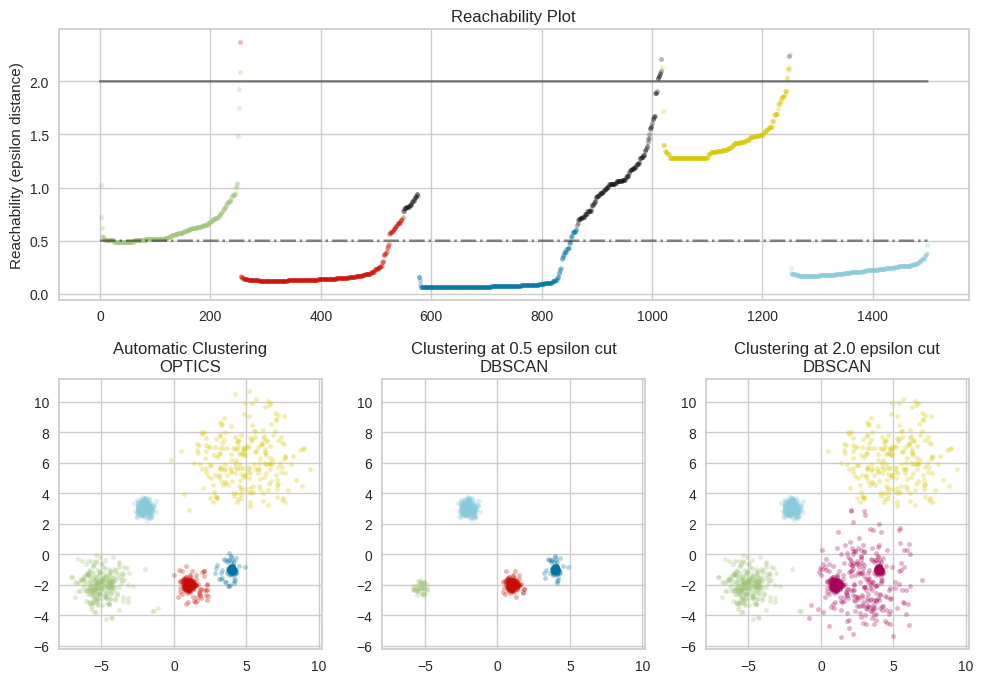

In [ ]:
# Authors: Shane Grigsby <refuge@rocktalus.com>
#          Adrin Jalali <adrin.jalali@gmail.com>
# License: BSD 3 clause

from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data

np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + 0.8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + 0.1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + 0.3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g.", "r.", "b.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

# **Spectral clustering**
<img src="https://drive.google.com/uc?id=1EAgNBHzIdPzcGUZcmxVYc9Dj5ydb4AnI" alt="ml" style="width:70%" class="center">

*Spectral clustering* is an important general framework for clustering. As for density-based clustering, no assumption is made upon the clusters shape, making this approach appealing in situations where one expects a complicated interleaving of clusters.

## **Graph representation**
The dataset $\mathcal{D} = \{\mathbf{x}_1,\cdots,\mathbf{x}_n\}$ is treated as a graph $G$ described by an adjacency matrix $\mathbf{W} = (w_{ij})_{1\leq i,j \leq n}$. The nodes $i$ and $j$ are connected if $w_{ij}>0$.
The adjacency matrix can be constructed in three ways:

- K-nearest neighbor graph: $w_{ij}>0$ if and only if $\mathbf{x}_i$ is among the K-Nearest neighbors of $\mathbf{x}_j$ or conversely, with respect to a chosen metric in the original data space.

- Eps-neighborhood graph: $w_{ij}>0$ if and only if $d(\mathbf{x}_i,\mathbf{x}_j)\leq Eps$; $Eps$ has to be carefully chosen.

- Fully connected graph: $w_{ij}= \exp(-\frac{d(\mathbf{x}_i,\mathbf{x}_j)}{\sigma^²})$; important time and space complexity when the number of data points is high.

We assume in the following that $\mathbf{W}$ is a symmetric matrix with non negative entries.

## **Unnormalized Graph Clustering**
The degree of the node $i$ is defined as $d_i = \sum_{j=1}^n w_{ij}$. The degree matrix is the diagonal matrix $\mathbf{D} = (d_{i,j})_{1 \leq i,j \leq }$ given by $d_{i,i} = d_i$.

The **unnormalized Graph Laplacian** is defined as $\mathbf{L} = \mathbf{D}-\mathbf{W}$.

### **Properties**
1. For an arbitrary vector $\mathbf{v} = (v_i)_{1 \leq i \leq n}$,  $\mathbf{v}^T\mathbf{L}\mathbf{v} = \frac{1}{2} \sum_{1\leq i,j \leq n} w_{ij}(v_i-v_j)^2$.

2. $\mathbf{L}$ is symmetric and positive semidefinite.

3. The smallest eigenvalue of $\mathbf{L}$ is 0 with eigenvector $\mathbb{1}$.

### **Zero's eigenspace**
For a subset of vertices $A$ of $G$, its indicator vector is defined as $\mathbb{1}_A = (f_i)_{1\leq i \leq n}$ where $f_i = 1$ if $i \in A$ and $f_i = 0$ otherwise.

We assume that $G$ has $K$ connected components $A_1, \cdots, A_K$ with laplacian matrices $\mathbf{L}_1,\cdots,\mathbf{L}_K$ respectively.

The data points can be reordered so that $\mathbf{L}$ has a block diagonal structure:

$\mathbf{L} =
 \begin{pmatrix}
  \mathbf{L}_1 &  &  &  \\
   & \mathbf{L}_2 &  &  \\
    &   & \ddots &   \\
   &  &  & \mathbf{L}_n
 \end{pmatrix}$

The indicator vectors $\mathbb{1}_{A_1}, \cdots, \mathbb{1}_{A_K}$ of the connected components of $G$
are eigenvectors associated with the eigenvalue 0. Moreover, any eigenvector associated with the eigenvalue $0$ is necessarily a linear combination of these indicator vectors, thanks to property (1.) above.

Thus the eigenspace of the eigenvalue 0 of $\mathbf{L}$ is spanned by the indicator vectors $\mathbb{1}_{A_1}, \cdots, \mathbb{1}_{A_K}$. The multiplicity of the eigenvalue 0 is equal to the number of connected components of $G$.

This is the theoretical motivation of spectral clustering.

---
**Unnormalized spectral clustering algorithm**

---

1. Compute the adjacency matrix and the degree matrix $\mathbf{W}$ and $\mathbf{D}$ respectively.
2. Compute the unnormalized graph laplacian $\mathbf{L} = \mathbf{D}-\mathbf{W}$
3. Determine the $K$ eigenvectors $\mathbf{v}_1, \cdots, \mathbf{v}_k$ associated with the lowest eigenvalues of $\mathbf{L}$.
4. Construct the matrix $\mathbf{V} \in \mathbb{R}^{n\times K}$ by stacking the vectors  $\mathbf{v}_1, \cdots, \mathbf{v}_k$.
5. Treat each row of $\mathbf{V}$ as a new representation of the original data points in $\mathbb{R}^{K}$ (it is the so called spectral embedding)
 and find clusters using one of the previous clustering methods.

---

In [ ]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

Text(0, 0.5, 'Height')

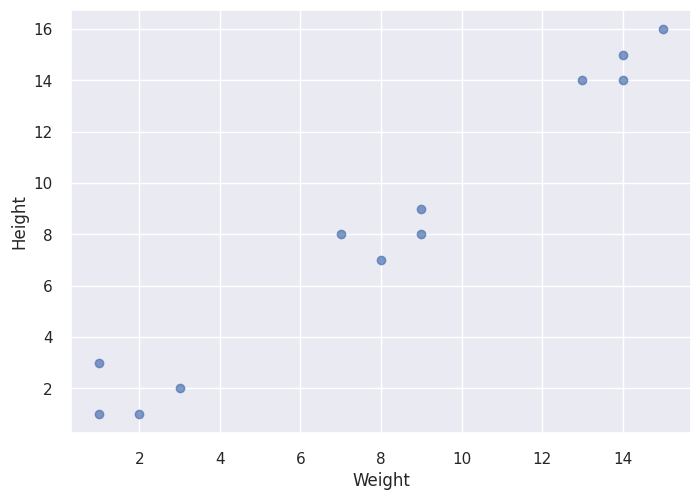

In [ ]:
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')


In [ ]:
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
print(W)


[[1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]]


In [ ]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

[[0 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 0]]


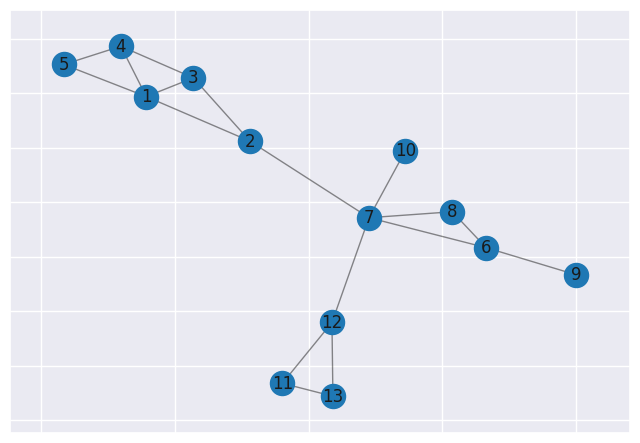

In [ ]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [6, 9],
    [9, 6],
    [7, 10],
    [7, 2],
    [11, 12],
    [12, 13],
    [7, 12],
    [11, 13]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [ ]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0  0  0  0  0]
 [-1  3 -1  0  0  0 -1  0  0  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0  0  0  0  0]
 [-1  0  0 -1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1  0  0  0  0]
 [ 0 -1  0  0  0 -1  5 -1  0 -1  0 -1  0]
 [ 0  0  0  0  0 -1 -1  2  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2 -1 -1]
 [ 0  0  0  0  0  0 -1  0  0  0 -1  3 -1]
 [ 0  0  0  0  0  0  0  0  0  0 -1 -1  2]]


In [ ]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[6.333 5.020 4.471 3.862 3.535 3.138 1.915 -0.000 0.184 0.348 0.772 1.421
 3.000]
eigenvectors:
[[-0.136 0.867 -0.086 0.015 0.092 0.040 -0.079 -0.277 0.347 0.078 0.040
  -0.009 -0.000]
 [0.312 -0.253 -0.318 0.023 0.299 0.482 -0.527 -0.277 0.205 0.014 -0.054
  0.127 -0.000]
 [-0.070 -0.189 0.667 0.008 -0.073 -0.355 -0.434 -0.277 0.333 0.071 0.025
  0.035 0.000]
 [0.056 -0.231 -0.577 -0.044 -0.352 -0.473 0.135 -0.277 0.384 0.096 0.069
  -0.062 0.000]
 [0.018 -0.211 0.269 0.016 0.169 0.380 0.661 -0.277 0.403 0.106 0.089
  -0.124 -0.000]
 [0.220 0.077 0.087 -0.795 -0.122 0.025 0.077 -0.277 -0.152 -0.355 0.113
  0.214 0.000]
 [-0.834 -0.166 -0.114 -0.042 -0.179 0.248 -0.058 -0.277 -0.102 -0.113
  -0.185 0.174 -0.000]
 [0.142 0.029 0.011 0.450 0.196 -0.240 0.226 -0.277 -0.140 -0.284 -0.059
  0.670 -0.000]
 [-0.041 -0.019 -0.025 0.278 0.048 -0.012 -0.084 -0.277 -0.187 -0.545
  0.495 -0.507 0.000]
 [0.156 0.041 0.033 0.015 0.071 -0.116 0.063 -0.277 -0.125 -0.174 -0.810
  -0.414 0.

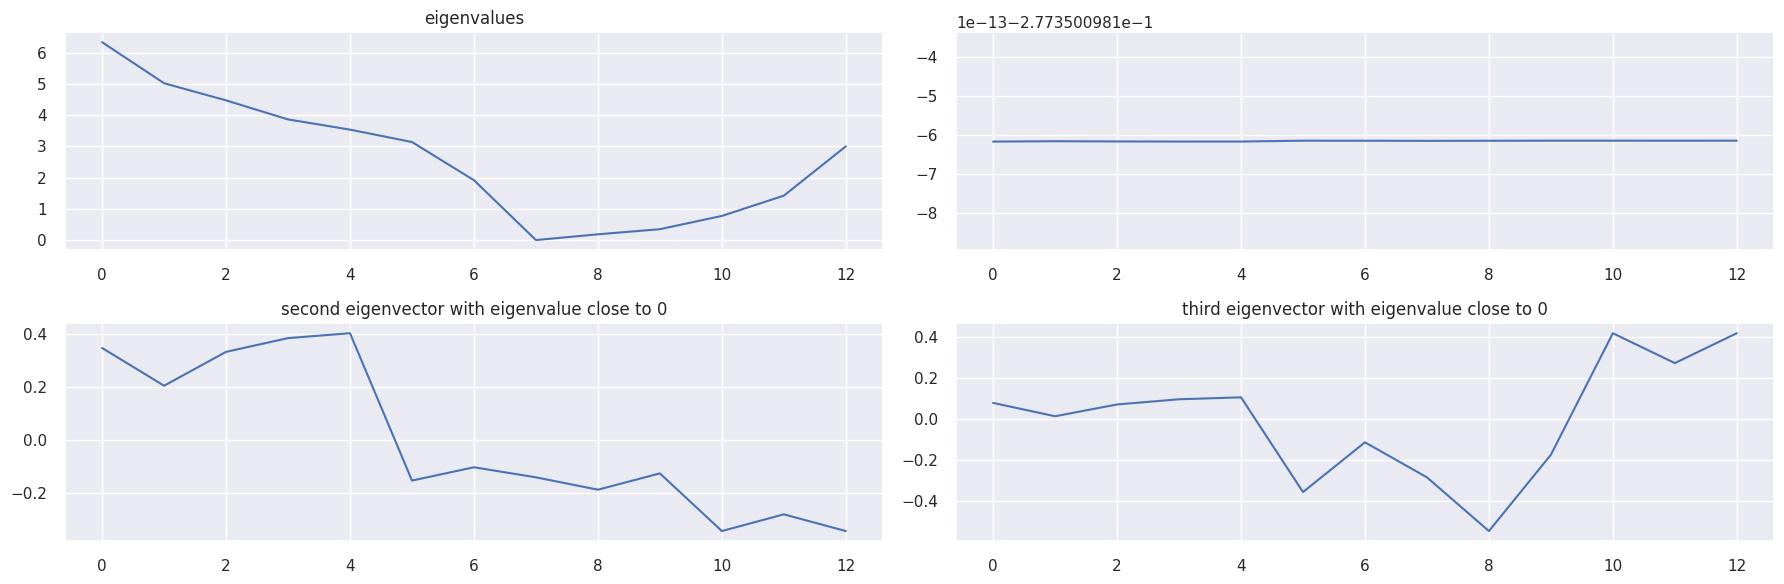

In [ ]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 0.5)[0]
ax2 = plt.subplot(222)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(223)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(v[:, i[2]])
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()

In [ ]:
U = np.array(v[:, i])
km = KMeans(init='k-means++', n_clusters=3)
km.fit(U)
km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2], dtype=int32)

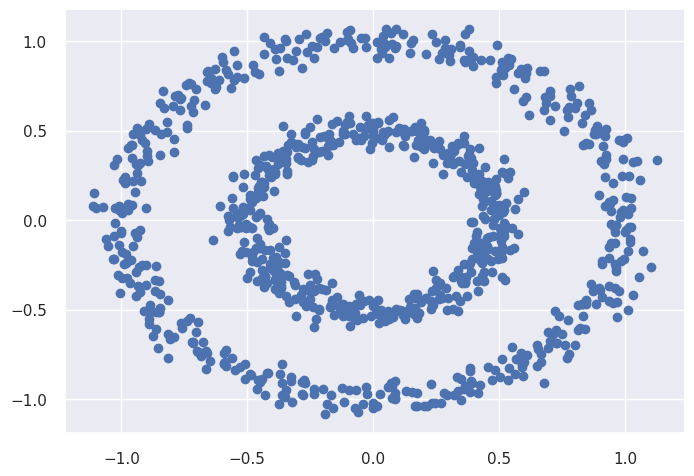

In [ ]:
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
plt.scatter(X[:,0], X[:,1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


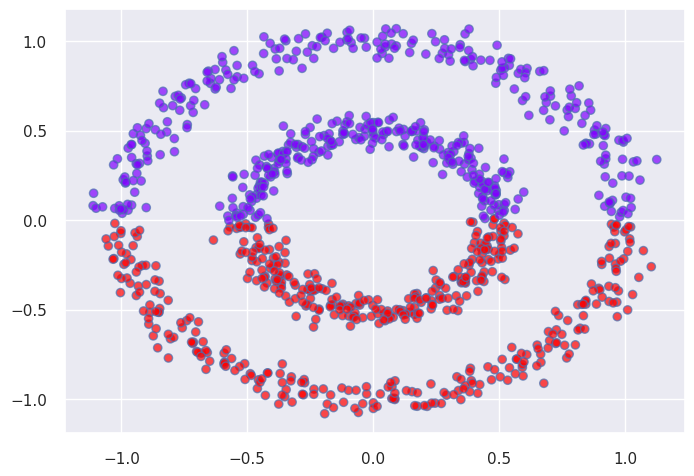

In [ ]:
km = KMeans(init='k-means++', n_clusters=2)
km_clustering = km.fit(X)
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


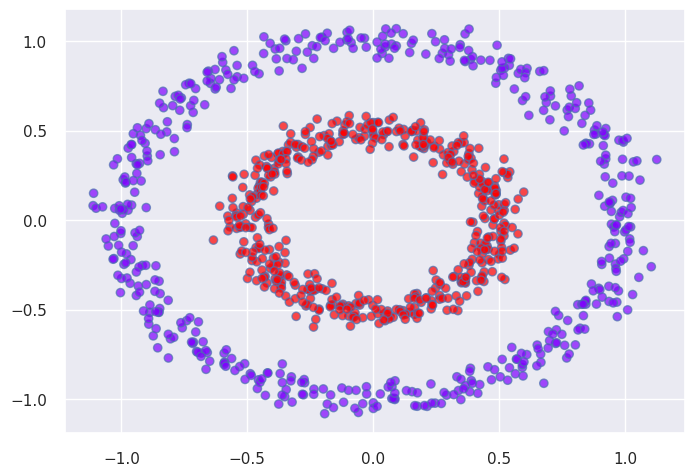

In [ ]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=sc_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

## **Normalized Graph Clustering**

There are two forms of normalized graph laplacian in the literature:

1. $\mathbf{L}_{sym} = \mathbf{D}^{-\frac{1}{2}}\mathbf{L}\mathbf{D}^{-\frac{1}{2}} = \mathbf{I} - \mathbf{D}^{-\frac{1}{2}}\mathbf{W}\mathbf{D}^{-\frac{1}{2}}$, where $sym$ stands for symmetric,

2. $\mathbf{L}_{rw} = \mathbf{D}^{-1}\mathbf{L} = \mathbf{I} - \mathbf{D}^{-1}\mathbf{W}$, where $rw$ refers to its random walks interpretation.


### **Properties**
1. For an arbitrary vector $\mathbf{v} = (v_i)_{1 \leq i \leq n}$,  $\mathbf{v}^T\mathbf{L}_{sym}\mathbf{v} = \frac{1}{2} \sum_{1\leq i,j \leq n} w_{ij}(\frac{v_i}{\sqrt{d_i}}-\frac{v_j}{\sqrt{d_j}})^2$.

2. $\lambda$ is an eigenvalue of $\mathbf{L}_{rw}$ with eigenvector $\mathbf{w}$ if and only if $\lambda$ and $\mathbf{w}$ verifie $\mathbf{L}\mathbf{w} = \lambda \mathbf{D}\mathbf{w}$

3. The smallest eigenvalue of $\mathbf{L}_{sym}$ and $\mathbf{L}_{rw}$ is 0 with eigenvectors $\mathbf{D}^{-\frac{1}{2}}\mathbb{1}$ and $\mathbb{1}$ respectively.

### **Zero's eigenspace**
As for the unnormalized laplacian, the mulplicity $K$ for the eigenvalue 0 is equal to the number of connected components $A_1, \cdots, A_K$ in the graph.

For $\mathbf{L}_{rw}$, the eigenspace of 0 is spanned by the indicator vectors $\mathbb{1}_{A_1}, \cdots, \mathbb{1}_{A_K}$ of the connected components.

For $\mathbf{L}_{sym}$, the eigenspace of 0 is spanned by  $\mathbf{D}^{-\frac{1}{2}}\mathbb{1}_{A_1}, \cdots, \mathbf{D}^{-\frac{1}{2}}\mathbb{1}_{A_K}$ of the connected components.


The normalized spectral clustering algorithms are adapted as follows:


---
**Symmetric normalized spectral clustering algorithm**

---

1. Compute the adjacency matrix and the degree matrix $\mathbf{W}$ and $\mathbf{D}$ respectively.
2. Compute the symmetric normalized graph laplacian $\mathbf{L}_{sym} = \mathbf{D}^{-\frac{1}{2}}\mathbf{L}\mathbf{D}^{-\frac{1}{2}}$
3. Determine the $K$ eigenvectors $\mathbf{v}_1, \cdots, \mathbf{v}_k$ associated with the lowest eigenvalues of $\mathbf{L}_{sym}$.
4. Construct the matrix $\mathbf{V} \in \mathbb{R}^{n\times K}$ by stacking the vectors  $\mathbf{v}_1, \cdots, \mathbf{v}_K$.
5. Normalize the rows of $\mathbf{V}$ so that $\sum_{j=1}^K \mathbf{V}[i,j]^2 = 1,\; \forall i \in \{1,\cdots,n\}$
6. Treat each row of $\mathbf{V}$ as a new representation of the original data points in $\mathbb{R}^{K}$
 and find clusters using one of the previous clustering methods.

---


---
**Random walk normalized spectral clustering algorithm**

---

1. Compute the adjacency matrix and the degree matrix $\mathbf{W}$ and $\mathbf{D}$ respectively.
2. Compute the unnormalized graph laplacian $\mathbf{L} = \mathbf{D}-\mathbf{W}$
3. Determine the $K$ eigenvectors $\mathbf{v}_1, \cdots, \mathbf{v}_k$ associated with the lowest eigenvalues in the generalized  eigenproblem $\mathbf{L}\mathbf{w} = \lambda \mathbf{D}\mathbf{w}$.
4. Construct the matrix $\mathbf{V} \in \mathbb{R}^{n\times K}$ by stacking the vectors  $\mathbf{v}_1, \cdots, \mathbf{v}_k$.
5. Treat each row of $\mathbf{V}$ as a new representation of the original data points in $\mathbb{R}^{K}$ (it is the so called spectral embedding)
 and find clusters using one of the previous clustering methods.

---

## **Graph cut perspective**
Let $A_1$ and $A_2$ denote two disjoint sets of vertices of G, i.e. $A_1 \cap A_2 = \emptyset$.
The $cut$ is defined as the sum of the weights of the edges across the two sets:

$cut(A_1,A_2) = \sum_{i\in A_1, j\in A_2} w_{ij}$.

The smaller is the cut, the more separated are the sets.
The cut's defitnition is generalized to $K$ sets as follows:

$cut(A_1,\cdots,A_K) = \sum_{i=1}^K cut(A_i, \bar{A_i})$,

where $\bar{A_i}$ is the complement of $A_i$ in the set of nodes.
Minimizing the cut is direct way of partionning a graph. However, it is prone to producing unbalanced partitions, due to high degree vertices.

This problem can be mitigated using normalized versions of the cut.

Among other solutions, the *Normalized Cut* is defined as follows:

$NCut(A_1,\cdots,A_K) = \sum_{i=1}^K \frac{cut(A_i, \bar{A_i})}{\text{assoc}(A_i)}$,

where $\text{assoc}(A_i) = \sum_{j\in A_i} d_j$ is the sum of the degrees of the vertices comprised in $A_i$.

It can be shown that the normalized spectral clustering algorithms solve a relaxed $NCut$ minimization problem.

## **Random walk perspective**
<img src="https://drive.google.com/uc?id=1qHftGtAg-_XYn9wdLQLq9zEQk3sh5I2Z" alt="ml" style="width:70%" class="center">

*Andreï Markov*

The matrix $\mathbf{M} = \mathbf{D}^{-1}\mathbf{W} = (\frac{w_{ij}}{d_i})_{1\leq i,j \leq n}$ can be read as the transition matrix of a random walk on the graph $G$:

$\mathbb{P}(i→j|i) = \frac{w_{ij}}{d_i}$.

We introduce the following vector:

$\boldsymbol{\pi} = (\pi_1,\cdots,\pi_n)$, with $\pi_i = \frac{d_i}{d_G}$.

$d_G$ is the total degree in the graph.

One can verify that $\boldsymbol{\pi} = \boldsymbol{\pi}\mathbf{M}$, which implies that $\boldsymbol{\pi}$ is a stationary distribution of the random walk.

Let $A$ denote a set  of vertices of $G$, and $P(A→\bar{A}|A)$, the probability of the random walk transiting from $A$ to $\bar{A}$ if the current state is in $A$ and with state probabilities following the stationary distribution $\boldsymbol{\pi}$.

Then, $NCut(A,\bar{A}) = P(A→\bar{A}|A)+P(\bar{A}→A|\bar{A})$.

It follows that minimizing the $NCut$ amounts to finding a graph partionning such that if the random walk gets into one of the partition's subsets of vertices, it tends to remain in it.



##**References**
*Density based clustering*

- Martin Ester, Hans-Peter Kriegel, Jörg Sander, and Xiaowei Xu. A density-based algorithm
for discovering clusters in large spatial databases with noise. In KDD, pages 226–231, 1996.

- Mihael Ankerst, Markus M. Breunig, Hans-Peter Kriegel, and Jörg Sander. OPTICS: Ordering
points to identify the clustering structure. In SIGMOD Conference, pages 49–60, 1999.

- Yixin Chen and Li Tu. Density-based clustering for real-time stream data. In KDD, pages
133–142, 2007.

*Spectral clustering*

- Mikhail Belkin and Partha Niyogi. Laplacian eigenmaps and spectral techniques for em-
bedding and clustering. In Advances in Neural Information Processing Systems 14, pages
585–591, 2001.

- Xinlei Chen and Deng Cai. Large scale spectral clustering with landmark-based representa-
tion. In Proceedings of the Twenty-Fifth AAAI Conference on Artificial Intelligence, pages
313–318, 2011.

- Yun Chi, Xiaodan Song, Dengyong Zhou, Koji Hino, and Belle L. Tseng. Evolutionary
spectral clustering by incorporating temporal smoothness. In Proceedings of the 13th ACM
SIGKDD International Conference on Knowledge Discovery and Data Mining, pages 153–
162, 2007.

- Fan R. K. Chung. Spectral Graph Theory. American Mathematical Society, 1994.

*Stream clustering*

- F. Cao, M. Ester, W. Qian, A. Zhou. Density-based clustering over an evolving data stream
with noise. In SDM Conference, pages 326–337, 2006.

- C. Aggarwal. Data Streams: Models and Algorithms, Springer, 2007.

- C. Aggarwal, J. Han, J. Wang, and P. Yu. A framework for clustering evolving data streams.
In VLDB Conference, pages 81–92, 2003.

- S. Guha, A. Meyerson, N. Mishra, R. Motwani, and L. O’Callaghan. Clustering data streams:
Theory and practice. In IEEE FOCS Conference, pages 515–528, 2000.

- P. Rodrigues, J. Gama, and L. Lopes. Clustering distributed sensor data streams, PKDD Con-
ference, 5212:282–297, 2008.

# **Matrix factorization**

##**Principal Component Analysis**
Main purpose: reduce the dimensionality of a dataset consisting of observations with correlated variables, while retaining as most as possible of the variability present in the dataset:

$\mathbf{x}_1, \cdots, \mathbf{x}_n \in \mathbb{R}^d ⟶ T(\mathbf{x}_1), \cdots, T(\mathbf{x}_n) \in \mathbb{R}^{d'}$, with $d' \ll d$.



###**Derivation of PCA**
Let consider a vector $\mathbf{x}$ of $d$ random variables $(x_i)_{1\leq i \leq d}$.
First, we look for a constant vector $\mathbf{u}_1 = (u_{1i})_{1\leq i \leq d}$ so that the variance of the random variable $z_1 = \mathbf{u}_1^T\mathbf{x}$ is maximized.  We assume that the covariance matrix of $\mathbf{x}$ is known and we note $\boldsymbol{\Sigma} = \mathbb{E}[(\mathbf{x}-\mathbb{E}(\mathbf{x}))(\mathbf{x}-\mathbb{E}(\mathbf{x}))^T]$.

Then $\text{var}(z_1) = \mathbf{u}_1^T\boldsymbol{\Sigma}\mathbf{u}_1$.
It is clear that the maximum is not achieved for a bounded value of $\mathbf{u}_1$, so we additionnally request that $\mathbf{u}_1^T\mathbf{u}_1 = \|\mathbf{u}_1\|_2^2=1$.

So we consider the following optimization problem:
$\underset{\mathbf{u}_1}{\max} \mathbf{u}_1^T\boldsymbol{\Sigma}\mathbf{u}_1 \text{ subject to } \mathbf{u}_1^T\mathbf{u}_1 = 1$.

It can be solved by maximizing the lagrangian function

$\mathcal{L}(\mathbf{u}_1,\lambda) = \mathbf{u}_1^T\boldsymbol{\Sigma}\mathbf{u}_1 - \lambda(\mathbf{u}_1^T\mathbf{u}_1 - 1)$.

Then setting $\nabla_{\mathbf{u}_1}\mathcal{L}(\mathbf{u}_1,\lambda) = \mathbf{0}$ yields

$\boldsymbol{\Sigma}\mathbf{u}_1 - \lambda\mathbf{u}_1 = \mathbf{0} ⇔ \boldsymbol{\Sigma}\mathbf{u}_1  = \lambda\mathbf{u}_1$.

Hence, $\mathbf{u}_1$ is an eigenvector of $\mathbf{\Sigma}$ associated with the eigenvalue $\lambda$. It implies that $\mathbf{u}_1^T\boldsymbol{\Sigma}\mathbf{u}_1  = \lambda\mathbf{u}_1^T\mathbf{u}_1  = \lambda$.

Thus, $\lambda$  has to be the largest eigenvalue of $\boldsymbol{\Sigma}$, and $\text{var}(\mathbf{u}_1^T\mathbf{x})$ = $\lambda_1$.

The second principal component $\mathbf{u}_2^T\mathbf{x}$ has a maximal variance, subject to being uncorrelated to $\mathbf{u}_1^T\mathbf{x}$.

Thus, $\mathbf{u}_2$ is a solution to the following optimization problem:

$\underset{\mathbf{u}_2}{\max} \mathbf{u}_2^T\boldsymbol{\Sigma}\mathbf{u}_2 \text{ subject to } \mathbf{u}_2^T\mathbf{u}_2 = 1 \text{ and } \text{cov}(\mathbf{u}_1^T\mathbf{x},\mathbf{u}_2^T\mathbf{x}) = 0$.

But $\text{cov}(\mathbf{u}_1^T\mathbf{x},\mathbf{u}_2^T\mathbf{x}) = \mathbf{u}_1^T\boldsymbol{\Sigma}\mathbf{u}_2 = \mathbf{u}_2^T\boldsymbol{\Sigma}\mathbf{u}_1 = \lambda_1 \mathbf{u}_2^T\mathbf{u}_1$.

Hence, the optimization can be rewritten as

$\underset{\mathbf{u}_2}{\max} \mathbf{u}_2^T\boldsymbol{\Sigma}\mathbf{u}_2 \text{ subject to } \mathbf{u}_2^T\mathbf{u}_2 = 1 \text{ and } \mathbf{u}_2^T\mathbf{u}_1 = 0$

The lagrangian function writes as

$\mathcal{L}(\mathbf{u}_2,\lambda,\beta) = \mathbf{u}_2^T\boldsymbol{\Sigma}\mathbf{u}_2 - \lambda(\mathbf{u}_2^T\mathbf{u}_2 - 1) - \beta\mathbf{u}_2^T\mathbf{u}_1 $.

Then $\nabla_{\mathbf{u}_2}\mathcal{L}(\mathbf{u}_1,\lambda,\beta) = \mathbf{0} ⇔ \boldsymbol{\Sigma}\mathbf{u}_2 - \lambda\mathbf{u}_2 -\beta\mathbf{u}_1 = \mathbf{0}$.

Multplying the last equality on the left by $\mathbf{u}_1^T$, one gets $\mathbf{u}_1^T\boldsymbol{\Sigma}\mathbf{u}_2 - \lambda\mathbf{u}_1^T\mathbf{u}_2 -\beta\mathbf{u}_1^T\mathbf{u}_1 = \mathbf{0}$ which implies $\beta = 0$, since $\mathbf{u}_1^T\boldsymbol{\Sigma}\mathbf{u}_2 = \lambda\mathbf{u}_1^T\mathbf{u}_2 = 0$ and $\mathbf{u}_1^T\mathbf{u}_1 = 1$.

Therefore $\boldsymbol{\Sigma}\mathbf{u}_2 = \lambda\mathbf{u}_2$ and $\mathbf{u}_2^T\boldsymbol{\Sigma}\mathbf{u}_2 = \lambda$.

Thus, $\mathbf{u}_2$ is an eigenvector associated with the largest eigenvalue $\lambda_2 \leq \lambda_1$.

More generally $\forall k \in  \{ 1, \cdots, d\}$, the $k^\text{th}$ principal component is given by $\mathbf{u}_k^T\mathbf{x}$, where $\mathbf{u}_k$ is a unitary eigenvector associated with the $k^\text{th}$ largest eigenvalue $\lambda_k$ and $\text{var}(\mathbf{u}_k^T\mathbf{x}) = \lambda_k$.

Defining $\mathbf{U} = [\mathbf{u}_1,\cdots,\mathbf{u}_d]$ and $\mathbf{S}$ as a diagonal matrix which $k^\text{th}$ entry is equal to $\lambda_k$, one has the following spectral decomposition of $\boldsymbol{\Sigma}$:

$\boldsymbol{\Sigma} = \mathbf{U}\mathbf{S}\mathbf{U}^T = \sum_{k=1}^d \lambda_k \mathbf{u}_k\mathbf{u}_k^T$.





###**Population properties if PCA**
#### Geometrical properties

We consider the family of $d-$dimensional ellipsoids defined as $\mathbf{x}^T\boldsymbol{\Sigma}^{-1}\mathbf{x} = c$.
The principal components defines the principal axes of the ellipsoids.

This has a straightforward interpretation for multivariate gaussian distributions of covariance matrix $\boldsymbol{\Sigma}$ since these ellipsoids define contours of constant probability density.


<img src="https://drive.google.com/uc?id=1eGKCdRWH6Rltd7uecKrBczoxZOR_T_yW" alt="ml" style="width:40%" class="center">

#### Principal components from correlation matrix

There might be huge differences in variances among the different components of the random vector $\mathbf{x}$ if for instance they are physical measurements in different units. One will conveniently use a standardized version of $\mathbf{x}$,

$\mathbf{x}^* = [\frac{x_1}{\text{std}(x_1)},\cdots,\frac{x_p}{\text{std}(x_p)}]^T$.

The principal components will be computed as $\mathbf{z} = \mathbf{U}^T\mathbf{x}^*$, using the covariance matrix of $\mathbf{x}^*$ which is nothing but the correlation matrix of $\mathbf{x}$.

Using the correlation matrix for PCA mitigates the variances unbalance, and make the analysis more comparable among different data samples.




###**Sample properties if PCA**
In this section we assume that we have $n$ indepent realisations $\mathbf{x}_1,\cdots,\mathbf{x}_n$ of the random vector $\mathbf{x}$, while its covariance matrix is unknown.

We define $\tilde{z}_{i1} = \mathbf{u}_1^T\mathbf{x}_i$,

where $\mathbf{u}_1$ is the vector which maximizes the sample variance $\frac{1}{n-1}\sum_{i=1}^n(\tilde{z}_{i1}-\bar{z}_{1})^2$, with the normalization constraint $\mathbf{u}_1^T\mathbf{u}_1 = 1$,

$\bar{z}_1$ being the sample mean:  $\bar{z}_1= \frac{1}{n}\sum_{i=1}^n \tilde{z}_{i1}$.

$\tilde{z}_{i2}$ and $\mathbf{u}_2$ are defined in a similar fashion, with the additional constraint that $\tilde{z}_{i2}$ is uncorrelated to $\tilde{z}_{i1}$ in samples.

These definitions are generalized to any $k\in \{1,\cdots,p\}$ with $\tilde{z}_{ik} = \mathbf{u}_k^T\mathbf{x}_i$.

The following matrix are introduced:

$\tilde{\mathbf{X}} = [\mathbf{x}_1,\cdots,\mathbf{x}_n]^T \in \mathbb{R}^{n\times d}$

$\mathbf{Z} = (\tilde{z}_{ik})_{1\leq i \leq n,\;1\leq k \leq d} \in \mathbb{R}^{n\times d}$

$\mathbf{S} = (\frac{1}{n-1} \sum_{i=1}^n (x_{ik}-\bar{x}_k)(x_{il}-\bar{x}_l))_{1\leq k,l \leq d}$ is the sample covariance matrix, where $x_{ik}$ and $x_{il}$ are the $k^\text{th}$ and the $l^\text{th}$ variables of the sample $\mathbf{x}_i$ and $\bar{x}_k$ and $\bar{x}_l$ the corresponding sample means

$\mathbf{U} = [\mathbf{u}_1,\cdots,\mathbf{u}_d] \in \mathbb{R}^{d\times d}$,
where $\mathbf{u}_k$ is a normalized eigenvector associated with $k^\text{th}$ largest eigenvalue of $\mathbf{S}$, $l_k$.

Those are related through the following equality:

$\mathbf{Z} = \tilde{\mathbf{X}}\mathbf{U}$

Besides, the spectral decomposition previously encountered holds:

$\mathbf{S} = \sum_{k=1}^d l_k \mathbf{u}_k\mathbf{u}_k^T$.

The centered sample matrix is defined as $\mathbf{X} = [\mathbf{x}_1-\bar{\mathbf{x}},\cdots,\mathbf{x}_n-\bar{\mathbf{x}}]^T \in \mathbb{R}^{n\times d}$, where $\bar{\mathbf{x}} = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i$.

Then the sample covariance matrix can be written as $\mathbf{S} = \frac{1}{n-1}\mathbf{X}^T\mathbf{X}$.




####**Affine subspace projection, approximation error**

Let $\mathbf{B} \in \mathbb{R}^{d\times q}$ be a matrix with orthgonal columns, so that the linear mapping

$p_{\mathbf{B}}: \mathbf{y} \in \mathbb{R}^d ↦ \mathbf{B}\mathbf{B}^T\mathbf{y}$ is a projector onto a q-dimensional subspace of $\mathbb{R}^{d}$.

Then, the the projection approximation error on the sample defined as

$\mathcal{E}_\mathbf{B} = \sum_{i=1}^n \|\mathbf{x}_i - p_{\mathbf{B}}(\mathbf{x}_i)\|_2^2$

is minimized if $\mathbf{B} = [\mathbf{u}_1,\cdots,\mathbf{u}_q]$.

This provides an alternative derivation of PCA.

<img src="https://drive.google.com/uc?id=1aMX5XP-_CVfDi-lHo-jQ7FFP2qZOipNi" alt="ml" style="width:40%" class="center">

Now we consider the matrix $\boldsymbol{\Omega} = \mathbf{X}\mathbf{X}^T \in \mathbb{R}^{n\times n}$, where $\mathbf{X} = [\mathbf{x}_1-\bar{\mathbf{x}},\cdots,\mathbf{x}_n-\bar{\mathbf{x}}]^T$.

The $i^\text{th}$ diagonal value of $\boldsymbol{\Omega}$ is equal to $\|\mathbf{x}_i-\bar{\mathbf{x}}\|_2^2$, which is the distance of the sample $\mathbf{x}_i$ to the samples centroid.

Besides, the $(i,j)$ off-diagonal entry value is given by $<\mathbf{x}_i-\bar{\mathbf{x}},\mathbf{x}_j-\bar{\mathbf{x}}> = \|\mathbf{x}_i-\bar{\mathbf{x}}\|_2\|\mathbf{x}_j-\bar{\mathbf{x}}\|_2\cos{\theta_{ij}}$,

where $\theta_{ij}$ is the angle between the vectors joining the centroid to $\mathbf{x}_i$ and $\mathbf{x}_j$ respectively.

Thus, $\boldsymbol{\Omega}$ carries information about the relative disposition of the samples with respect to their centroid.

Keeping the same definition for the projection matrix $\mathbf{B}$, the coordinates of the sample $\mathbf{x}_i$ in the q-dimensional subspace are given by $\mathbf{h}_i = \mathbf{B}^T\mathbf{x}_i$.

Similar to $\mathbf{X}$, one can define the matrix $\mathbf{H} = [\mathbf{h}_1-\bar{\mathbf{h}},\cdots,\mathbf{h}_n-\bar{\mathbf{h}}]^T$, where $\bar{\mathbf{h}} = \frac{1}{n} \sum_{i=1}^n \mathbf{h}_i$,

and $\boldsymbol{\Omega}_{\mathbf{H}} = \mathbf{H}\mathbf{H}^T$.

Then the geometric distorsion calculated as $\|\boldsymbol{\Omega}-\boldsymbol{\Omega}_{\mathbf{H}}\|_F^2$ is again minimized if $\mathbf{B} = [\mathbf{u}_1,\cdots,\mathbf{u}_q]$.



####**Singular value decomposition**
<img src="https://drive.google.com/uc?id=1lc9gW7aa3CJa9XXMYfg7iU1XhJ5Mae_J" alt="ml" style="width:40%" class="center">

Given an arbitrary matrix $\mathbf{X} \in \mathbb{R}^{n\times p}$ of rank r, which in this context consists of n observation on p centered variables, the following factorization can always be done:

$\mathbf{X} = \mathbf{V}_r\mathbf{L}_r\mathbf{U}_r^T$ where
1. $\mathbf{V}_r$ and $\mathbf{U}_r$ are respectively $n\times r$ and $p\times r$ matrixes satisfying $\mathbf{V}_r^T\mathbf{V}_r = \mathbf{U}_r^T\mathbf{U}_r = \mathbf{I}_r$
2. $\mathbf{L}_r$ is a $r\times r$ diagonal matrix.

Keeping the previous notations, $\mathbf{u}_1,\cdots,\mathbf{u}_r$ are the top $r$ eigenvectors of $\mathbf{X}^T\mathbf{X}$ and $l_1,\cdots,l_r$ are the corresponding eigenvalues. Then, $\mathbf{U}_r$ can be taken as
$\mathbf{U}_r = [\mathbf{u}_1,\cdots,\mathbf{u}_r]$,

$\mathbf{L}_r$ as the $r\times r$ diagonal matrix whose $k^\text{th}$ diagonal value is equal to $l_k^\frac{-1}{2}$ and

$\mathbf{V}_r = [\mathbf{v}_1,\cdots,\mathbf{v}_r]$, with $\mathbf{v}_k = l_k^\frac{-1}{2}\mathbf{X}\mathbf{u}_k$, for $k \in \{1,\cdots,r\}$.

Besides, the matrix $\mathbf{X}_{r'} = \mathbf{V}_{r'}\mathbf{L}_{r'}\mathbf{U}_{r'}^T$ where

$\mathbf{U}_{r'} = [\mathbf{u}_1,\cdots,\mathbf{u}_{r'}]$

$\mathbf{L}_{r'} = \text{diag}(l_1,\cdots,l_{r'})$, and

$\mathbf{V}_{r'} = [\mathbf{v}_1,\cdots,\mathbf{v}_{r'}]$, with $r'<r$,

is the best rank $r'$ approximation of $\mathbf{V}_{r'}$, in the sense of optimisation problem

$\underset{\mathbf{Y}}{\min} \|\mathbf{Y}-\mathbf{X}\|_F^2$ subject to $ \text{rank}(\mathbf{Y})\leq r'$.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

**Normally distributed dataset**

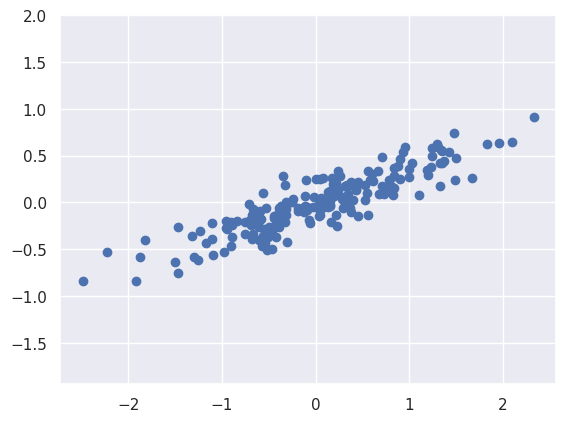

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
print(pca.mean_)

[ 0.03351168 -0.00408072]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


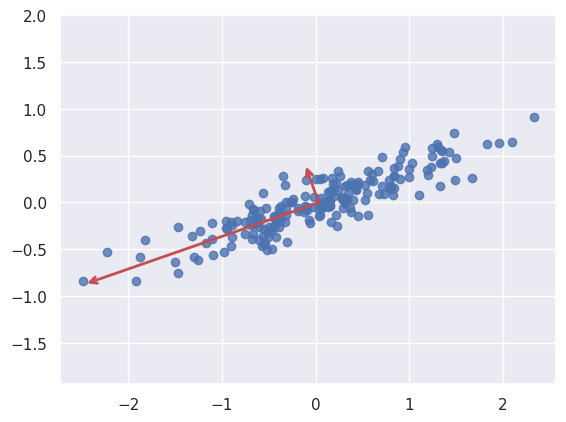

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color='r')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.8)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

**Non gaussian distribution**

In [ ]:
from sklearn.datasets import make_blobs
X_blob, y_true = make_blobs(n_samples=300, centers=4, n_features=2,
                       cluster_std=[0.7,1,2.5,2])
pca_blob = PCA(n_components=2)
pca_blob.fit(X_blob)
pca_blob.components_
pca_blob.explained_variance_

array([63.54159089, 26.76523141])

[-7.06471009  3.69208101]
[-2.39622547 -4.58512103]


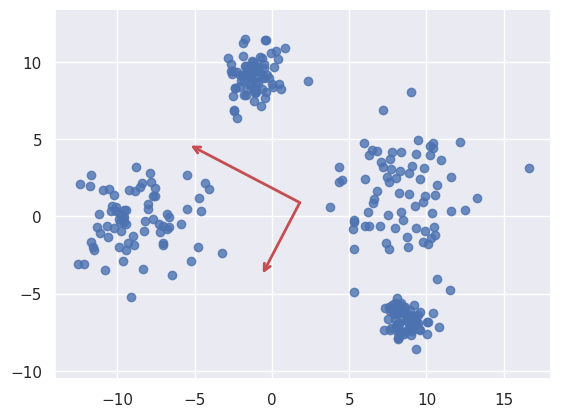

In [ ]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], alpha=0.8)

for length, vector in zip(pca_blob.explained_variance_, pca_blob.components_):
    v = vector * np.sqrt(length)
    print(v)
    draw_vector(pca_blob.mean_, pca_blob.mean_ + v)
plt.axis('equal');

**Dimensionality reduction**

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


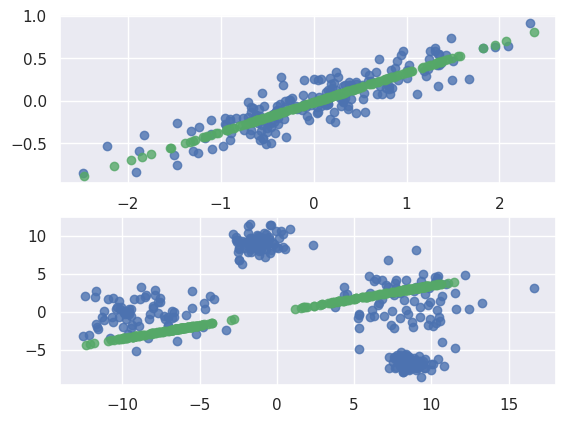

In [ ]:
pca_blob = PCA(n_components=1)
pca_blob.fit(X_blob)
X_pca_blob = pca_blob.transform(X_blob)

X_new = pca.inverse_transform(X_pca)
X_new_blob = pca.inverse_transform(X_pca_blob)
fig, axs = plt.subplots(2, 1, sharex=False, sharey=False)
axs[0].scatter(X[:, 0], X[:, 1], alpha=0.8)
axs[0].scatter(X_new[:, 0], X_new[:, 1], alpha=0.8,color='g')
axs[1].scatter(X_blob[:, 0], X_blob[:, 1], alpha=0.8)
axs[1].scatter(X_new_blob[:, 0], X_new_blob[:, 1], alpha=0.8,color='g')

**Handwritten digits**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


<ipython-input-13-7564ba3d768d>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


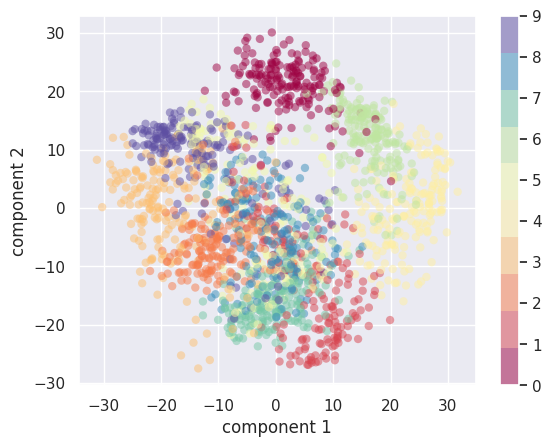

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x

    if components is None:
        components = np.eye(len(coefficients), len(x))

    mean = np.zeros_like(x) + mean


    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")

    approx = mean.copy()

    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig



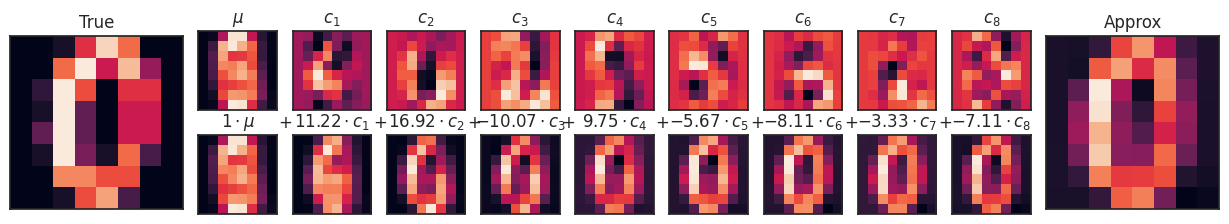

In [ ]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)


**Number of components**

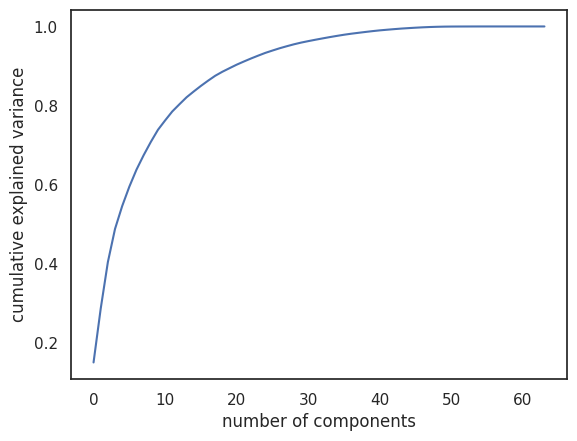

In [ ]:
pca = PCA().fit(digits.data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


**Noise filtering**

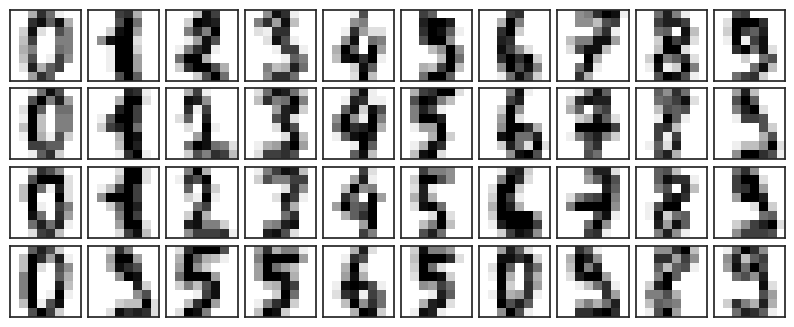

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

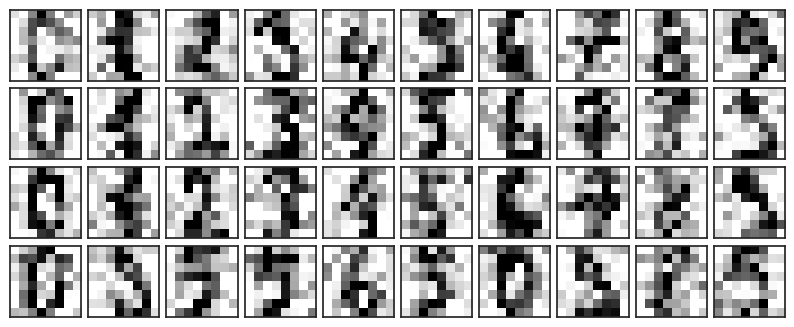

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [ ]:
n_components = 12
pca_noisy = PCA(n_components=n_components)
Xproj_noisy = pca_noisy.fit_transform(noisy)



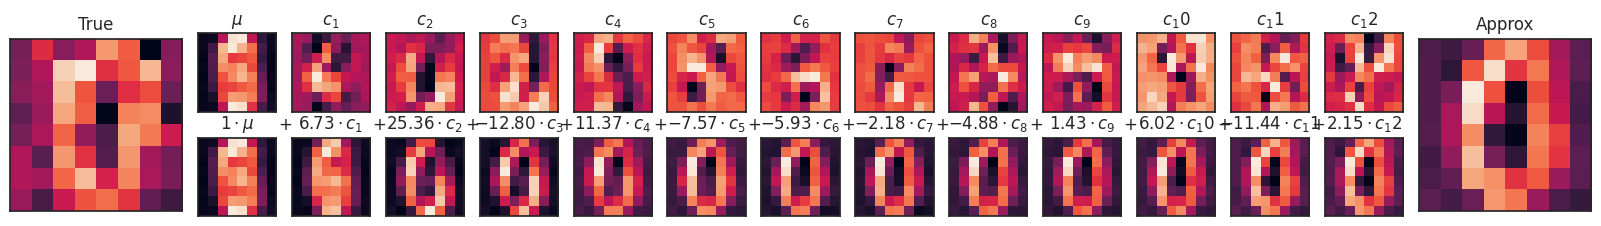

In [ ]:
sns.set_style('white')
fig = plot_pca_components(noisy[10], Xproj_noisy[10],
                          pca_noisy.mean_, pca_noisy.components_,n_components=n_components)

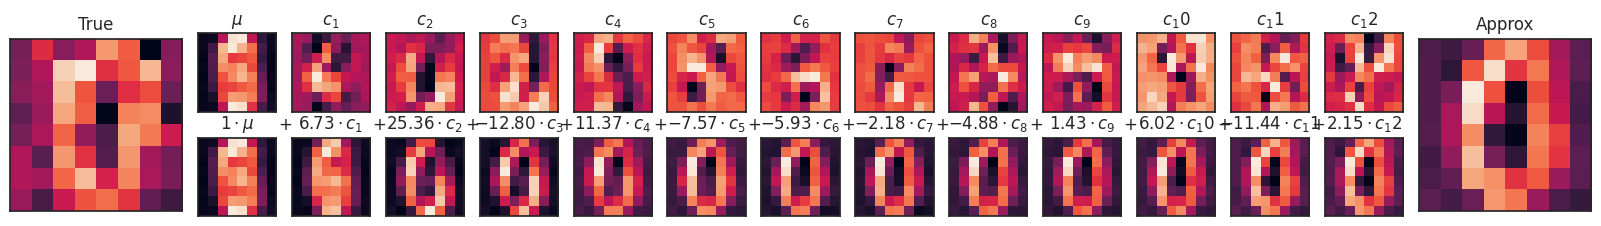

In [ ]:
sns.set_style('white')
fig = plot_pca_components(noisy[10], Xproj_noisy[10],
                          pca_noisy.mean_, pca_noisy.components_,n_components=12)

Set the number of component automatically. Below, the explained variance is required to be at least 50%.

In [ ]:
pca = PCA(0.20).fit(noisy)
pca.n_components_

3

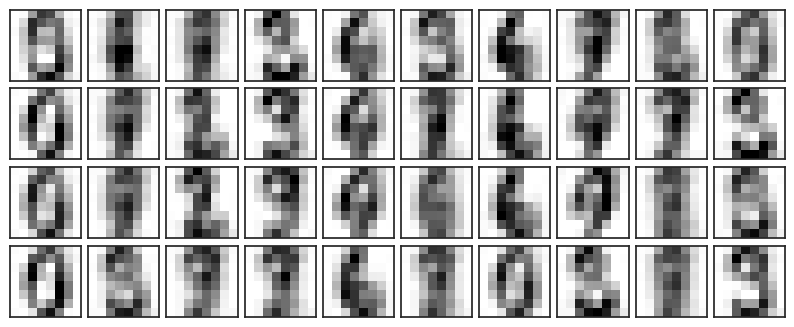

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

**Eigenfaces**

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150, svd_solver='randomized')
pca.fit(faces.data)


PCA(n_components=150, svd_solver='randomized')

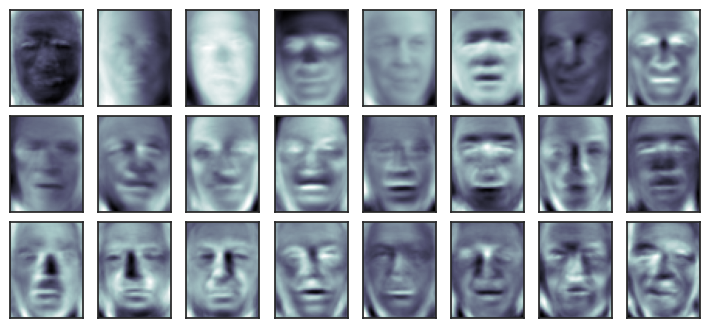

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

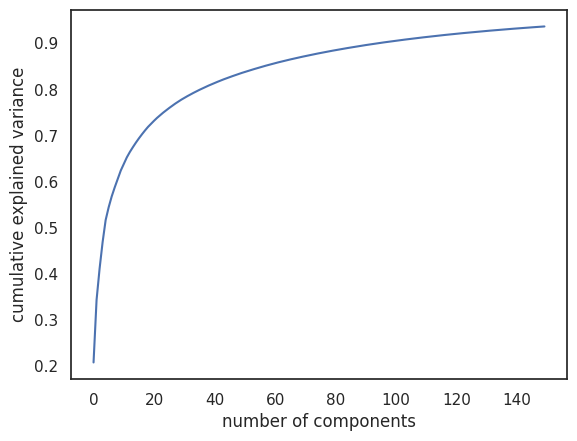

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# Compute the components and projected faces
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

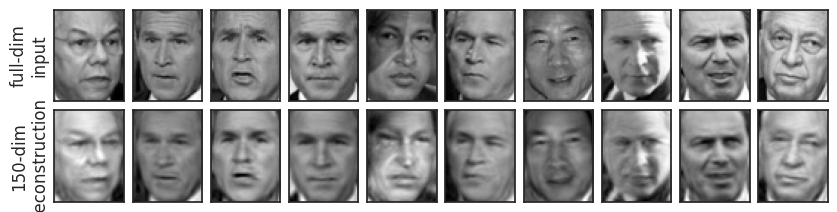

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

**Scatter plots**


###**Robustness**
Outliers might affect PCA as illustrated on the toy example below.






In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

n_samples = 1000
n_outliers = 10
n_features = 2

# generate Gaussian data of shape (125, 2)
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.0
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)

# add some outliers
X_corrupted = np.copy(X)
outliers_cov = 20.0 * np.random.randn(n_features,n_features)
#outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.0
X_corrupted[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)


Text(0.5, 1.0, 'Corrupted dataset')

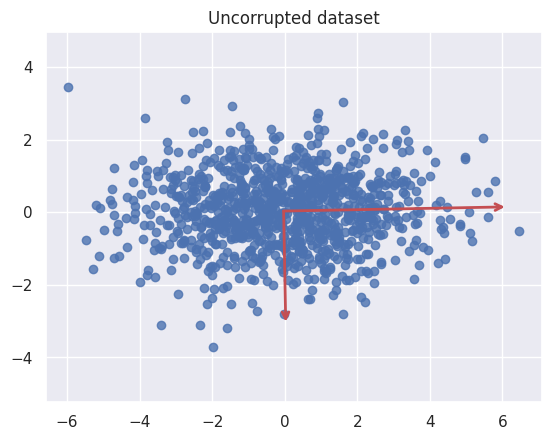

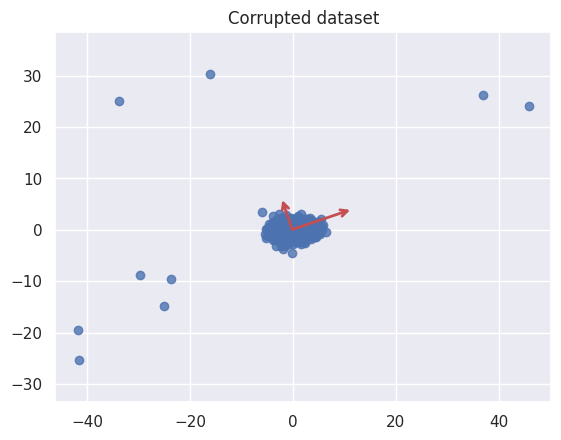

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
pca_corrupt = PCA(n_components=2)
pca_corrupt.fit(X_corrupted)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], alpha=0.8)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3* np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
plt.title('Uncorrupted dataset')

plt.figure()
plt.scatter(X_corrupted[:, 0], X_corrupted[:, 1], alpha=0.8)
for length, vector in zip(pca_corrupt.explained_variance_, pca_corrupt.components_):
    v = vector * 3* np.sqrt(length)
    draw_vector(pca_corrupt.mean_, pca_corrupt.mean_ + v)
plt.axis('equal');
plt.title('Corrupted dataset')

####**Influential observations**

- A definition: Observations whose removal have a considerable effect on the eigenvalues or the eigenvectors of the sample covariance matrix
- $Influencial ⇒ outlier$ but $outlier \nRightarrow Influencial$

- Straightforward approach: compute the leave-one-out statistics: $\theta - \theta_{(i)}$ where $\theta$ is the quantity of interest and $\theta_{(i)}$ is the same quantity computed omitting the $i^\text{th}$ sample.

- Alternately, a theoretical influence function of a value $\mathbf{x}$ can be defined as $I(\mathbf{x},\theta) = \underset{\epsilon ⇒ 0}{\lim} \frac{\theta_{\epsilon}-\theta}{\epsilon}$, where $\epsilon$ is a small variation of the density function underlying the data at $\mathbf{x}$, and $\theta_{\epsilon}$ is the perturbed value of the statistic $\theta$.

- <u>Examples</u>:
  1. $I(\mathbf{x}, l_k) = z_k(\mathbf{x})^2-l_k$, where $l_k$ is the $k^\text{th}$ eigenvalue of the covariance matrix and $z_k(\mathbf{x})$ is the $k^\text{th}$ principal component of $\mathbf{x}$ i.e. the $k^\text{th}$ element of the vector $\mathbf{U}^T\mathbf{x}$,
  2. $I(\mathbf{x}, \mathbf{u}_k) = -z_k(\mathbf{x})\sum_{h=1, h\neq k}^d \frac{z_h(\mathbf{x})\mathbf{u}_k}{l_h-l_k}$.

Remark: influential observation need not to be extreme points.

**Mitigating strategies**

- Detection and removal of outliers prior to PCA for instance using influence estimation,
- Samples denoising
- Robust covariance matrix estimation with samples reweighting strategies

<u>Example</u>: *Robust PCA*

*Emmanuel J. Candes; Xiaodong Li; Yi Ma; John Wright (2009). "Robust Principal Component Analysis?". Journal of the ACM. 58 (3): 1–37*

- Observation model: $\mathbf{X} = \mathbf{X}_0 + \mathbf{O}$ where $\mathbf{X}$ is the observed corrupted data matrix, $\mathbf{X}_0$ is the unobserved uncorrupted and low rank data matrix and $\mathbf{O}$ is a sparse spurious noise matrix.

- Optimisation problem: $\underset{\mathbf{X}_0,\mathbf{0}}{\min} \|\mathbf{X}_0\|_* + \lambda\|\mathbf{O}\|_1 \text{ s.t. } \mathbf{X}_0+\mathbf{O} = \mathbf{X}$.
  1. Nuclear norm: $ \| \mathbf{X}_0 \|_* = \sum_{i} \sigma(\mathbf{X}_0)_i $, $\sigma(\mathbf{X}_0)_i$ being the $i^\text{th}$ singular value of $\mathbf{X}_0$; low rank promoting penalty.
  2. $\lambda\|\mathbf{O}\|_1$: sparsity promoting penalty.

Test on a toy example:

In [ ]:
import requests
r = requests.get('https://raw.githubusercontent.com/dganguli/robust-pca/master/r_pca.py')
with open('r_pca.py', 'w') as f:
    f.write(r.text)

In [ ]:
from r_pca import R_pca

In [ ]:
rpca = R_pca(X_corrupted, mu=0.1, lmbda=0.08)
L, S = rpca.fit(max_iter=10000, iter_print=100)

iteration: 1, error: 8.24763601926295
iteration: 88, error: 1.329436037365433e-05


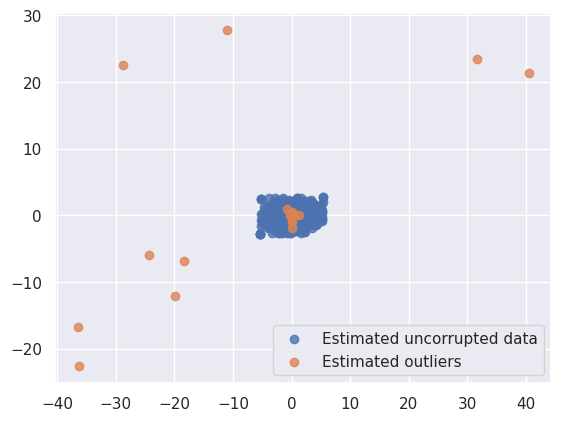

In [ ]:
plt.scatter(L[:, 0], L[:, 1], alpha=0.8,label='Estimated uncorrupted data')
plt.scatter(S[:, 0], S[:, 1], alpha=0.8,label='Estimated outliers')
plt.legend()

##**Non-Negative Matrix Factorization**


###**Motivations**

Many real-word data are non-negative: pixels values (intensity measurements in general), chemical compounds concentrations, words frequencies in a document (histograms in general), etc... Positivity constraint might yield a more interpretable representation of the data.



Extracting the top 16 eigendigits from 1797 images
Extracting 16 non-negative features from 1797 images


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


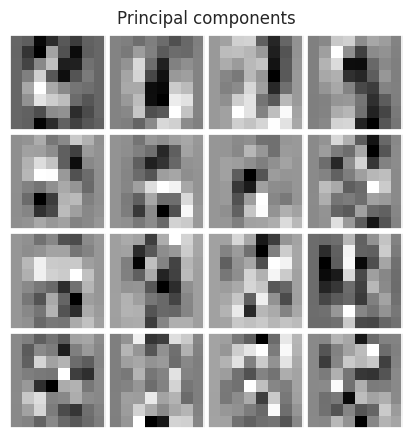

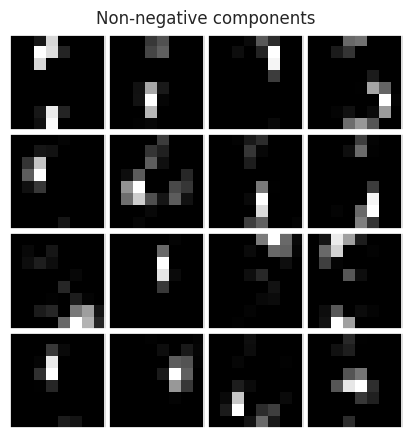

In [ ]:
import pylab as pl

from sklearn.decomposition import PCA, NMF
from sklearn import datasets

digits = datasets.load_digits()

# reshape the data using the traditional (n_samples, n_features) shape
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
n_features = X.shape[1]

n_components = 16

######################################################################
# Compute a PCA (eigendigits) on the digit dataset

print( "Extracting the top %d eigendigits from %d images" % (
    n_components, X.shape[0]))
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized').fit(X)

eigendigits = pca.components_

######################################################################
# Compute a NMF on the digit dataset

print( "Extracting %d non-negative features from %d images" % (
    n_components, X.shape[0]))
nmf = NMF(n_components=n_components).fit(X)

nmfdigits = nmf.components_

######################################################################
# Plot the results

n_row, n_col = 4, 4

f1 = pl.figure(figsize=(1. * n_col, 1.13 * n_row))
f1.text(.5, .95, 'Principal components', horizontalalignment='center')
for i in range(n_row * n_col):
    pl.subplot(n_row, n_col, i + 1)
    pl.imshow(eigendigits[i].reshape((8, 8)), cmap=pl.cm.gray,
              interpolation='nearest')
    pl.xticks(())
    pl.yticks(())
pl.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

f2 = pl.figure(figsize=(1. * n_col, 1.13 * n_row))
f2.text(.5, .95, 'Non-negative components', horizontalalignment='center')
for i in range(n_row * n_col):
    pl.subplot(n_row, n_col, i + 1)
    pl.imshow(nmfdigits[i].reshape((8, 8)), cmap=pl.cm.gray,
              interpolation='nearest')
    pl.xticks(())
    pl.yticks(())
pl.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
pl.show()

###**Problem formulation**
Given a non-negative data matrix $\mathbf{X} = [\mathbf{x}_1,\cdots,\mathbf{x}_n] \in \mathbb{R}^{d\times n}_+$, non-negative matrix factorization consists in approximating $\mathbf{X}$ with the matrix product of two non-negative and typically low rank matrices:

$\mathbf{X} \approx \mathbf{S}\mathbf{A}^T$, where $\mathbf{S} = [\mathbf{s}_1,\cdots,\mathbf{s}_r] \in \mathbb{R}^{d\times r}_+$, $\mathbf{A} = [\mathbf{a}_1,\cdots,\mathbf{a}_r] \in \mathbb{R}^{n\times r}_+$, with $r\ll d$.

Each sample is modeled as a non-negative linear combination of non-negative vectors.
<img src="https://drive.google.com/uc?id=1gigFvZnWFYyHpcebgn3gHsGE5o71OWbD" alt="ml" style="width:40%" class="center">

Equivalently, it can be described as an approximation of $\mathbf{X}$ with $r$ rank one matrices.
<img src="https://drive.google.com/uc?id=1uS7hV9bgu48Fyf3cNN62AgD1kwhTjBM-" alt="ml" style="width:40%" class="center">

$\mathbf{S}$ and $\mathbf{A}$ can be estimated solving the following optimization problem:

$\underset{\mathbf{S}, \mathbf{A}}{\min} \|\mathbf{X}-\mathbf{S}\mathbf{A}^T\|_F^2$ subject to $\mathbf{S} \geq 0$ and $\mathbf{A} \geq 0$.

Another common approach makes use of the Kullback-Leibler divergence:

$\underset{\mathbf{S}, \mathbf{A}}{\min} \sum_{i=1}^p\sum_{j=1}^n x_{ij}\log(\frac{x_{ij}}{(\mathbf{S}\mathbf{A}^T)_{ij}})-x_{ij}+(\mathbf{S}\mathbf{A}^T)_{ij}$.

It yields a multiplicative iterative algorithm which naturally preserves positivity.



###**Applications**


####**Topic modelling**

<img src="https://drive.google.com/uc?id=16Qrm_FJAUhx1-g9YHAOBZWfwuuqiYbIM" alt="ml" style="width:40%" class="center">

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [ ]:
# Importing Data
text_data= fetch_20newsgroups(remove=('headers', 'footers', 'quotes')).data
text_data[:3]

['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
 "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't an

**TF-IDF definition**

In [ ]:
# converting the given text into term-document matrix

vectorizer = TfidfVectorizer(max_features=1500, min_df=10, stop_words='english')
X = vectorizer.fit_transform(text_data)
print(X.shape[0]," words and ",X.shape[1]," documents")


11314  words and  1500  documents


In [ ]:
# Applying Non-Negative Matrix Factorization

nmf_fro = NMF(n_components=10, beta_loss="frobenius")
A_fro = nmf_fro.fit_transform(X)


In [ ]:
nmf_kl = NMF(n_components=10, beta_loss="kullback-leibler",solver='mu')
A_kl = nmf_kl.fit_transform(X)

In [ ]:
import matplotlib.pyplot as plt
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

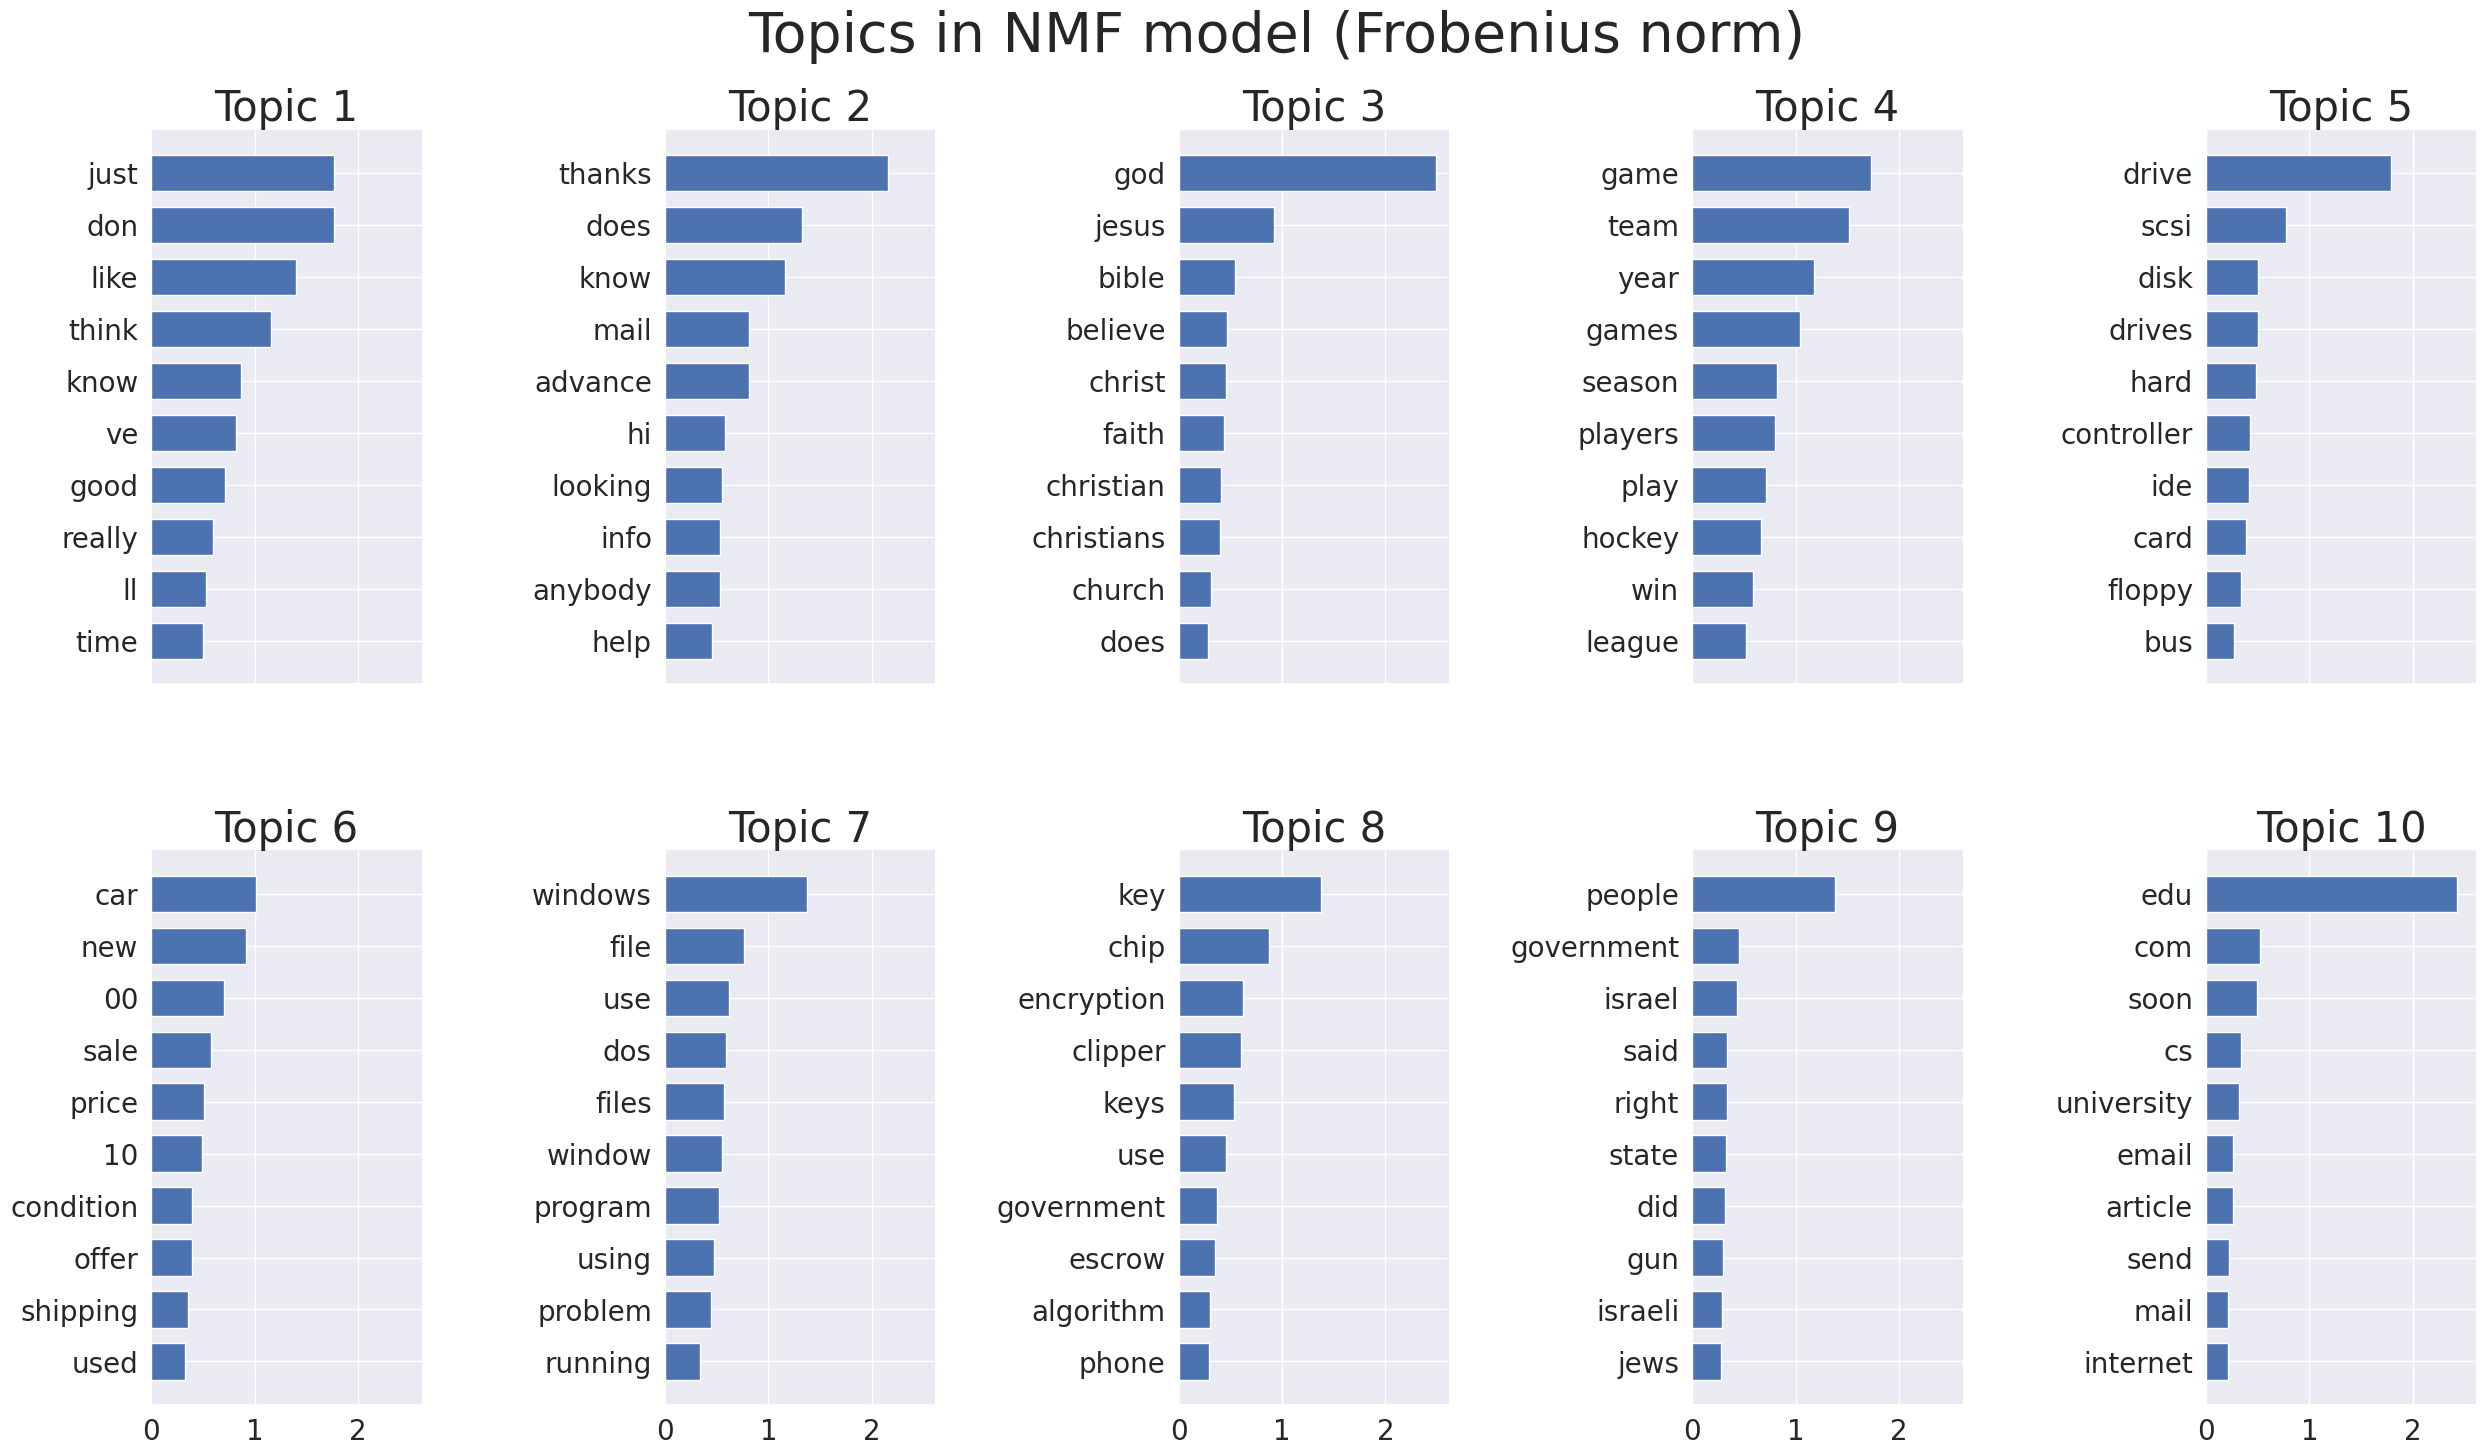

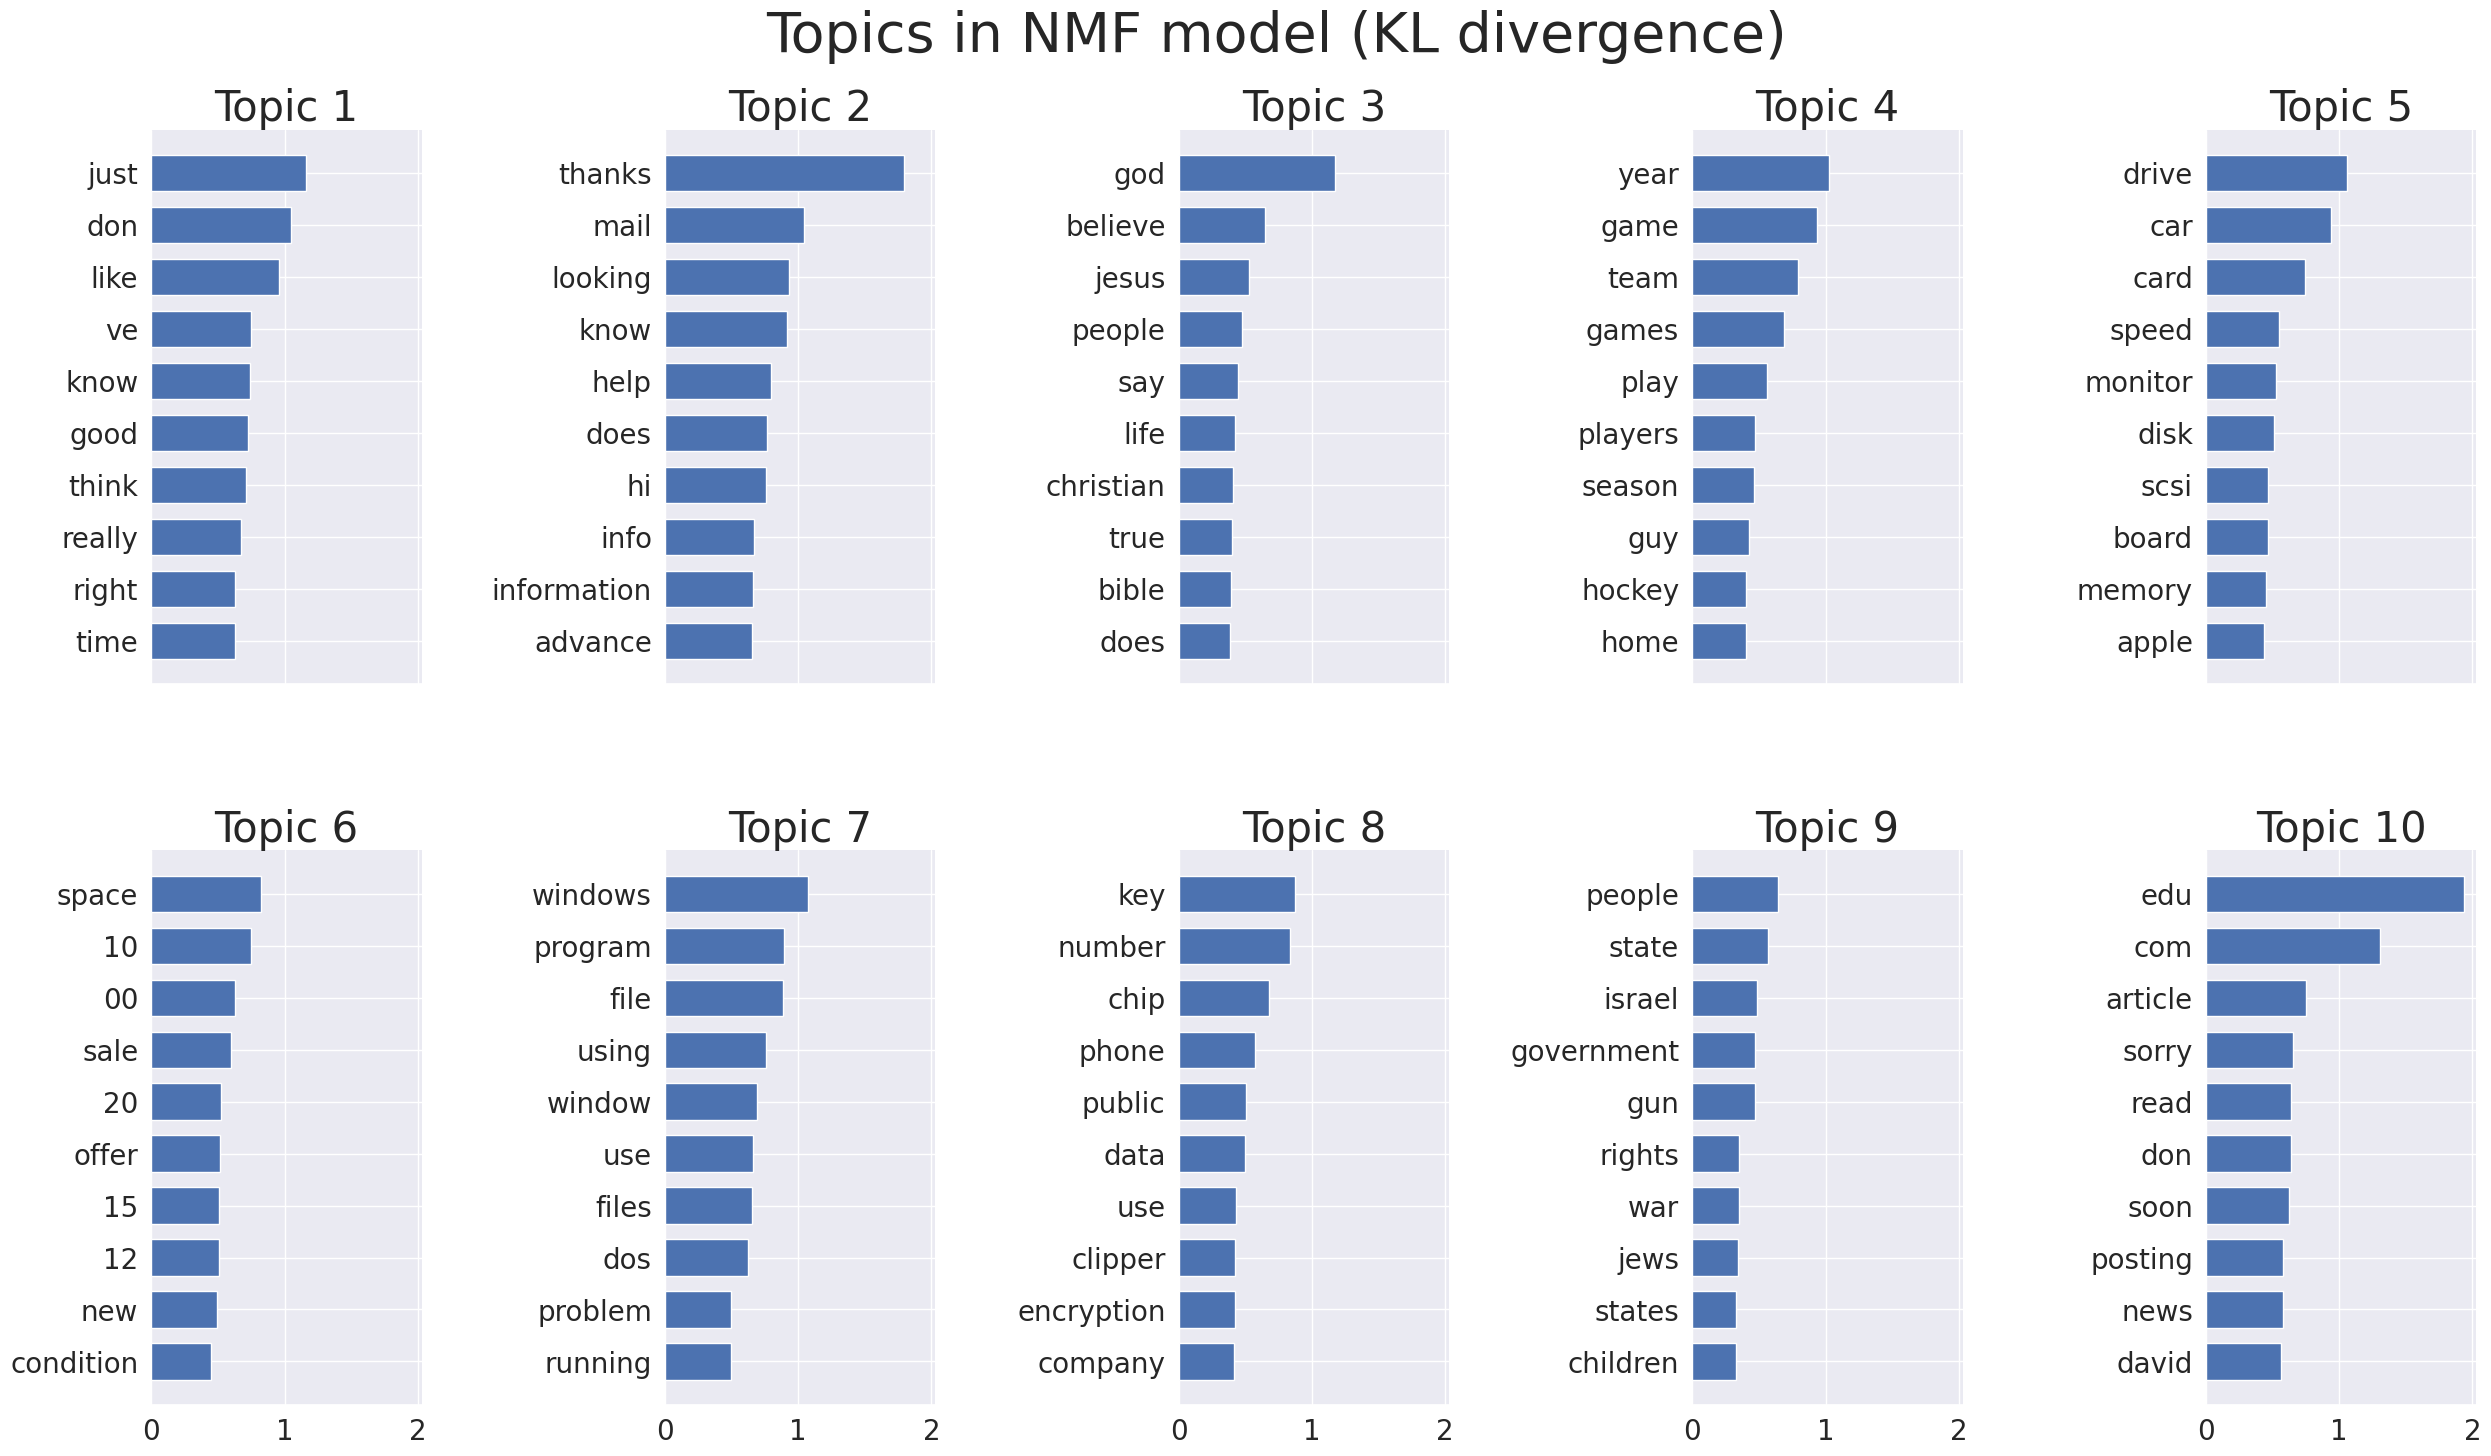

In [ ]:
n_top_words = 10
tfidf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(
    nmf_fro, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)
plot_top_words(
    nmf_kl, tfidf_feature_names, n_top_words, "Topics in NMF model (KL divergence)"
)


####**Limitations**
- Non unique solution
- Sensitive to initialization
- No ordering of the components
- Setting the right number of components is non trivial

###**Dictionary Learning**

Dictionary Learning consists of learning a dictionary tunned to sparsely encode a family of signals available through examples in a data set.

The dictionary learning problem takes the following from:

$\underset{D,\boldsymbol{\alpha}}{\min}\sum_{i=1}^{n_s} \|x_i - D\alpha_i\|^2 \text{s.t.} \|\alpha_i\|_0\leq k$,

where $u_i\in \mathbb{R}^d$, $D\in \mathbb{R}^{d\times m}$, with $d\ll m$, $\alpha_i\in \mathbb{R}^m$ and $\|\alpha_i\|_0$ is the number of non zero coordinates of $\alpha_i$.

The sparse coding is enforced by taking $k\ll m$.

This amounts to learn an encoder with an implicit non linear sparse coding function $\phi(u_i) = \alpha_i$ and a linear decoder $D\alpha_i \approx u_i$.

The dictionary $D$ can then be used as a prior in problems (denoising, deconvolution, etc.) involving structurally similar signals.

**Discrete cosine transform dictionary**

<img src="https://drive.google.com/uc?id=1yAg6HTWS1OTJZ4vKwAsxL0q_AAWZwiKR" alt="ml" style="width:40%" class="center">

**Dictionary learnt from a photograph patches**

<img src="https://drive.google.com/uc?id=1fxm3EyirrT5nECT414R0nD-f-m_Ge0LX" alt="ml" style="width:40%" class="center">

We can see that th dictionary captures different textures and patterns in different directions, and it is quite redundant, which enables a sparse representation.

However there are two drawbacks.

* Given its lack of structure, optimisation involves explicit matrix multiplication with $D$ which might be computationally intensive.

* For high dimensional data, since we need to have the number of atoms $m\gg  d$, learning a redundant dictionary is untractable.

Learning a k-sparsifying dictionary amounts to approximating the data manifold with a collection $k$ dimensional subspaces, learning the spanning vectors explicitly, which are the dictionary atoms.

<img src="https://drive.google.com/uc?id=1VCZShrowY8Ggye2GWxCCpSztWt5MHowq" alt="ml" style="width:40%" class="center">

If the data manifold has a large intrinsic dimension, this would require a combinatorially large number of atoms.

Therefore, one has to resort split images or 1D signals into small patches in order to learn a dictionary, with the drawback that it can not model large scale structures.


# **Manifold Learning**

<img src="https://drive.google.com/uc?id=1em4gYb1NtBmvQOb5Ngu72K5lIq31Lqbp" alt="ml" style="width:40%" class="center">



### **Definitions**

A **Riemanian Manifold $\mathcal{M}$** is a smooth multidimensional curved surface in $\mathbb{R}^p$ that is locally Euclidean, in the sense that any small neighbourhood around any point it can be deformed to a neighbourhood of $\mathbb{R}^d$. In this case the manifold is said to be d-dimensional. d is the **intrinsic dimension** of $\mathcal{M}$.

<u>**Tangent space**</u>: $\mathcal{M}$ can be approximated at any point $\mathbf{x}$ by affine subspace coined the *tangent space* and noted $\mathcal{T}_\mathbf{x}(\mathcal{M})$.  
- $\mathbf{x} \in \mathcal{T}_\mathbf{x}(\mathcal{M})$
- $\mathcal{T}_\mathbf{x}(\mathcal{M}) = \{\mathbf{x}\}+\text{span}(\mathbf{v}\in \mathbb{R}^p/ \mathbf{v} = \gamma'(0) \; \forall \gamma: I\in \mathbb{R} → \mathcal{M}, \gamma(0) = \mathbf{x})$.

$\mathcal{T}_\mathbf{x}(\mathcal{M})$ is a $d-$dimensional affine subspace.

<u>**Riemannian metric**</u>: the tangent space $\mathcal{T}_\mathbf{x}(\mathcal{M})$ is equipped with a scalar product

$\langle .,. \rangle_\mathbf{x}: \mathcal{T}_\mathbf{x}(\mathcal{M}) \times \mathcal{T}_\mathbf{x}(\mathcal{M}) → \mathbb{R}$ that varies smoothly with $\mathbf{x}$.

It induces a norm $\|\mathbf{u}\|_\mathbf{x} = \sqrt{\langle \mathbf{u}, \mathbf{u} \rangle_\mathbf{x}}$.

<u>**Geodesics**</u>:
Let $\mathbf{u}$ and $\mathbf{v}$ be two points in $\mathcal{M}$ and $\gamma: [0,T] → \mathcal{M}, \gamma(0) = \mathbf{u} \text{ and } \gamma(T) = \mathbf{v}$.

Assuming that $\gamma$ is derivable, its arc lenght is given by

$l(\gamma) = \int_0^T \|\gamma(t)'\|_{\gamma(t)}dt$.

$\gamma$ is a geodesic if it has a minimal arc lenght among all the curves in $\mathcal{M}$ whose endpoints are $\mathbf{u}$ and $\mathbf{v}$.

The geodesics in an euclidean space are straight lines.

The minimal arc lenght is the geodesic distance $d_{\mathcal{M}}(\mathbf{u},\mathbf{v})$.


<u>**Manifold hypothesis**</u>: the observed data lie on a low-dimensional manifold embedded in a higher-dimensional space: $d\ll p$.

**Linear VS non-linear manifold**: does linear combination/interpolation of data points make sense?


## **Manifold learning algorithms**

###**Multidimensional Scaling**

<img src="https://drive.google.com/uc?id=1ravEVBcju0EODFpAWZtwsTAszIc67gW_" alt="ml" style="width:40%" class="center">


- One has or can derive pairwise similarities or dissimilarities between some instances (similarity scores in psychoacoustical tests for instance)
- One seeks a euclidean embedding of these instances which preserves the (dis)similarity information.

Let assume that one has a dissimilarity matrix $\mathbf{D} = (d_{ij})_{1\leq i,j \leq n}$ and that $d_{ij} = \|\mathbf{u}_i-\mathbf{u}_j\|_2$ for some unknown vectors $\mathbf{u}_1,\cdots,\mathbf{u}_n \in \mathbb{R}^d$.

 $\mathbf{U} = [\mathbf{u}_1,\cdots,\mathbf{u}_n]$ denotes the latent representation matrix in $\mathbb{R}^{d\times n}$.

A straightforward approach consists in estimating the $\mathbf{u}_i$s solving the following optimization problem:

$\underset{\mathbf{x}_1,\cdots,\mathbf{x}_n \in \mathbb{R}^d}{\min} \sum_{1\leq i,j \leq n}(d_{ij}-\|\mathbf{x}_i-\mathbf{x}_j\|_2)^2$.


On the other hand, $d_{ij}^2 = \|\mathbf{u}_i\|_2^2-2\langle \mathbf{u}_i,\mathbf{u}_j \rangle +\|\mathbf{u}_j\|_2^2$.


Then, the matrix $\mathbf{D}^{(2)} = (d_{ij}^2)_{1\leq i,j \leq n}$ can be decomposed as follows:

$\mathbf{D}^{(2)} = \mathbf{n_u}\mathbb{1}^T - 2\mathbf{G}_u + \mathbb{1}\mathbf{n_u}^T$

where $\mathbf{n_u} = (\|\mathbf{u}_1\|_2^2,\cdots,\|\mathbf{u}_n\|_2^2)^T$, $\mathbf{G}_u = (\langle \mathbf{u}_i,\mathbf{u}_j \rangle)_{1\leq i,j \leq n}$ and $\mathbb{1}$ is the ones vector in $\mathbb{R}^n$.

Let $\mathbf{H} = \mathbf{I}_n - \frac{1}{n}\mathbb{1}\mathbb{1}^T$ be the *centering matrix*, $\mathbf{I}_n$ being the identity matrix in $\mathbb{R}^n$.

Multiplying a matrix by $\mathbf{H}$ on the left or the right amounts to subtracting the rows or the columns means respectively.

Then, $-\frac{1}{2}\mathbf{H}\mathbf{D}^{(2)}\mathbf{H} = \mathbf{H}\mathbf{G}_u\mathbf{H}$.

Besides $\mathbf{G}_u = \mathbf{U}^T\mathbf{U}$.

Therefore $\mathbf{H}\mathbf{G}_u\mathbf{H} = (\mathbf{U}\mathbf{H})^T(\mathbf{U}\mathbf{H}) = (\langle \mathbf{u}_i - \bar{\mathbf{u}},\mathbf{u}_j-\bar{\mathbf{u}} \rangle)_{1\leq i,j \leq n}$, where $\mathbf{u}$ is the hidden samples mean.

- Mulplying by $\mathbf{H}$ transforms a distance matrix into a centered Gram matrix, which is achieved without explicit computation of the samples mean.
- The matrix $\mathbf{B} = -\frac{1}{2}\mathbf{H}\mathbf{D}^{(2)}\mathbf{H}$ can be read as a pairwise similarity matrix between the instances of interest.

Therefore a alternate approach to determine a similarity preserving embedding goes by solving the following problem:

$\underset{\mathbf{x}_1,\cdots,\mathbf{x}_n \in \mathbb{R}^d}{\min} \sum_{1\leq i,j \leq n}(b_{ij}-\langle \mathbf{x}_i,\mathbf{x}_j\rangle)^2 ⇔ \underset{\mathbf{X} \in \mathbb{R}^{d\times n}}{\min} \|\mathbf{B}-\mathbf{X}^T\mathbf{X}\|_F^2$,

a problem already encountered while covering PCA optimality properties.

Hence the classical MDS algorithm goes as follows:

---
**Classical MDS algorithm**

---
1. Compute the element-wise squared dissimilarity matrix $\mathbf{D}^{(2)} = (d_{ij}^2)_{1\leq i,j \leq n}$,

2. Compute $\mathbf{B} = -\frac{1}{2}\mathbf{H}\mathbf{D}^{(2)}\mathbf{H}$, where $\mathbf{H} = \mathbf{I}_n - \frac{1}{n}\mathbb{1}\mathbb{1}^T$ is the centering matrix,

3. Compute the $d$ largest eigenvalues of $\mathbf{B}$, $\lambda_1,\cdots,\lambda_p$ and the corresponding eigenvectors $\mathbf{e}_1,\cdots,\mathbf{e}_d$: $\mathbf{E} = [\mathbf{e}_1,\cdots,\mathbf{e}_d]^T \in \mathbb{R}^{d\times n}$ and $\boldsymbol{\Delta}_d = \text{diag}(\lambda_1,\cdots,\lambda_d)$,

4. The embeddings are the columns of the matrix $\mathbf{X} = \sqrt{\boldsymbol{\Delta}_d}\mathbf{E} \in \mathbb{R}^{d\times n}$.

---

<u>Remarks</u> :
- If $\mathbf{D}$ actually consists of pairwise euclidean distances, Classical MDS embeddings are exactly samples principal components.

- As for PCA, the appropriate embedding dimension $d$ can be assessed by expecting the eigenvalues decay.

- Embeddings are calculated up to an isometry.

- How does it differ from spectral clustering's embedding?

<img src="https://drive.google.com/uc?id=1QInhnqCWeGVtqf1Z1Iq9zUDWY_0EObSh" alt="ml" style="width:40%" class="center">

<u>Applications</u> :

- Wireless local localization techniques

<img src="https://drive.google.com/uc?id=1X5SQm0-72tnp1XRP60CMl_5Gz5P_dyTE" alt="ml" style="width:40%" class="center">

*Saeed, N., Nam, H., Al-Naffouri, T. Y., & Alouini, M. S. (2019). A state-of-the-art survey on multidimensional scaling-based localization techniques. IEEE Communications Surveys & Tutorials, 21(4), 3565-3583.*

- Numerous usage of cheap location information: underwater navigation, asset tracking, IoT based services



###**ISOMAP**

<img src="https://drive.google.com/uc?id=1Vy1lnLEaRJzyNXXDbBdsRcwdFtpG4ZQT" alt="ml" style="width:40%" class="center">

<u>Assumptions</u>
- Data points are sampled from a manifold $\mathcal{M}\subset \mathbb{R}^p$
- There exists an isomorphism $\varphi: \Omega \subset \mathbb{R}^d →  \mathcal{M}$ where $d\ll p$ and $\Omega$ is convex.

Based on this hypothesis, it extends MDS beyond euclidean hypothesis by adapting dissimilarity matrix computation.


---
**Isometric features Mapping algorithm**

---

1. Consruct neighborhood graph:  define a graph G over all data points by connecting samples i and j if $d_{ij}<\epsilon $, or if i is one of the K
nearest neighbors of j. Set edge lengths to $d_{ij}$,

2. Compute shortest paths lenghts $d_G(i,j)$ on G (using Dijkstra and Floyd-Warshall algorithms for instance), and define the matrix $\mathbf{D}_G = (d_{ij})_{1\leq i,j \leq n}$

3. Compute a d-dimensional embedding using MDS.

---


<img src="https://drive.google.com/uc?id=1V_EkCtaf2QDVTSt9XcCCcOW4D52Ot_c7" alt="ml" style="width:40%" class="center">


*Tenenbaum, J. B., Silva, V. D., & Langford, J. C. (2000). A global geometric framework for nonlinear dimensionality reduction. science, 290(5500), 2319-2323.*


<u> Remarks </u>
- Application to non-linear dimensionality reduction

<img src="https://drive.google.com/uc?id=10mbj6C5CTgx_1L22GsAQQ1UXC2Klxs8l" alt="ml" style="width:40%" class="center">

*4096 pixels images*

- Low intrinsic dimension ($<10$) and additional hypothesis on the manifold curvature guarantee a sufficient sampling density with a few thousands of data points, for the local euclidean distances to be good approximations of geodesic distance on $\mathcal{M}$.


- Poor scalabity with respect to the number of samples $→$
Landmark ISOMAP.

- Poor perfomances on manifold with holes, which breaks the convexity hypothesis.


###**Locally Linear Embedding**

LLE aims at finding a global parametrization of a low dimensional manifold that preserves the local manifold structure, without estimating the geodesic distances.

It proceeds from the idea that for a sufficient number of samples, each given data point and its nearest neighbors fall into an approximately *linear patch* of the manifold. Let $(N_i(j))_{1\leq j\leq K}$ denote the set of indices of the k-nearest neighbors of the sample $\mathbf{x}_i$. The barycentric coordinates of $\mathbf{x}_i$ with respect to its neighbors are calculated as follows:

$\hat{\mathbf{w}}_i = \underset{w_{i1},\cdots,w_{ik}}{\text{argmin}} \|\mathbf{x}_i-\sum_{j=1}^k w_{ij}\mathbf{x}_{N_i(j)} \|_2^2$.

<img src="https://drive.google.com/uc?id=1mXa2JM3GSCvqgm4jx2HnUPH8eXFRp9nE" alt="ml" style="width:40%" class="center">

$\hat{\mathbf{w}}_i$ is invariant to rotations, scaling, and translation of $\mathbf{x}_i$ and its neighbors.

As a consequence, $\hat{\mathbf{w}}_i$ captures an intrinsic geometric property of $\mathcal{M}$ on the neighborhood of $\mathbf{x}_i$.

On the other hand, if the sampling is sufficiently dense, then the mapping of $\mathbf{x}_i$ and its neighbors to their respectives manifold coordinates can be well approximated locally with linear transformation, namely a rotation, a scaling or a translation.

Therefore, it is expected that the manifold embedding $\mathbf{y}_i$ of $\mathbf{x}_i$ has the same barycentric coordinates $\hat{\mathbf{w}}_i$ with respect to its neighbors. Hence, the embeddings $\mathbf{y}_1,\cdots,\mathbf{y}_n$ are calculated solving the followning optimization problem:

$\underset{\mathbf{y}_1,\cdots,\mathbf{y}_n}{\min} \sum_{i=1}^n \|\mathbf{y}_i - \sum_{j=1}^k w_{ij}\mathbf{y}_{N_i(j)}\|_2^2$.

In this step, the barycentric coordinates are fixed.

*Example from the original LLE paper*

<img src="https://drive.google.com/uc?id=1_kNdXPXL0H6qTUwHMAu-at9qDyzJtlVh" alt="ml" style="width:40%" class="center">

*Roweis, S. T., & Saul, L. K. (2000). Nonlinear dimensionality reduction by locally linear embedding. science, 290(5500), 2323-2326.*


<u> Remark </u>
There is no particular ordering among the features in the embedding.


###**Differential operators based approached**

<img src="https://drive.google.com/uc?id=1PyfNOzcFjA7D6JAIf-L6wNO3P-qx1Qhu" alt="ml" style="width:40%" class="center">


#### **Laplacian Eigenmap**

Let G = (V,E) be the data points neighborhood graph constructed as for ISOMAP. The connectivity is either based on $\epsilon-$neighborhood or k-nearest neighbors.


The adjacency matrix $\mathbf{W} = (w_{ij})_{1\leq i,j \leq n}$ is defined as follows:

- $w_{ij} = \exp(\frac{-\|\mathbf{x}_i-\mathbf{x}_j\|_2^2}{t})$ if the nodes $i$ and $j$ are connected, with a user-provided parameter $t$
- $w_{ij} = 0$ otherwise.

Consider the problem of mapping G on the real line so that connected vertices stay as close as possible.

Let $\mathbf{y} = (y_1,\cdots,y_n)^T$ be such a map.   

An intuitive penalty for choosing this map is the following

$\sum_{1\leq i,j\leq n}(y_i-y_j)^2w_{ij}$, under appropriate constraint to discard trivial solutions.

For instance, one might impose $\mathbf{y}^T\mathbf{D}\mathbf{y} = 1$, $\mathbf{D}$ being the degrees matrix.

We recall that the unnormalized laplacian matrix is defined as

$\mathbf{L} = \mathbf{D}-\mathbf{W} $.

It can be verified that $\sum_{1\leq i,j\leq n}(y_i-y_j)^2w_{ij} = 2\mathbf{y}^T\mathbf{L}\mathbf{y}$.

Then, the problem of finding the mapping reduces to

$\underset{\mathbf{y}}{\min} \mathbf{y}^T\mathbf{L}\mathbf{y} \text{ s.t. } \mathbf{y}^T\mathbf{D}\mathbf{y} = 1$.

This problem has a trivial solution $\hat{\mathbf{y}} = \frac{1}{\sum_i d_{ii}}\mathbf{1}_n$, which maps all the nodes to a single value.

Therefore an additional orthogonaity constraints is added:


$\underset{\mathbf{y}}{\min} \mathbf{y}^T\mathbf{L}\mathbf{y} \text{ s.t. } \mathbf{y}^T\mathbf{D}\mathbf{y} = 1 \text{ and } \mathbf{y}^T\mathbf{D}\mathbf{1} = 0$.

This problem can be extended to finding a d-dimensional mapping as follows

$\underset{\mathbf{Y}\in \mathbb{R}^{n\times d}}{\min} \text{tr}(\mathbf{Y}^T\mathbf{L}\mathbf{Y}) \text{ s.t. } \mathbf{Y}^T\mathbf{D}\mathbf{Y} = \mathbf{I}$,

where the $i^\text{th}$ row of the matrix $\mathbf{Y}$ is the low dimensional mapping of the sample $\mathbf{x}_i$.

This problem is solved by computing the eigenvectors corresponding to the lowest eigenvalues in the generalized eigenproblem $\mathbf{L}\mathbf{y} = \lambda \mathbf{D}\mathbf{y}$.

<u> Remarks </u>:
- the constraint $\mathbf{y}^T\mathbf{D}\mathbf{y} = 1$ removes an arbitrary scaling factor in the embedding
- the constraint $\mathbf{y}^T\mathbf{D}\mathbf{1} = 0$ removes translation invariance in the embedding.


<img src="https://drive.google.com/uc?id=16wBhQIA8AswAMPzJ5Aiz1QFAtAVmBpFz" alt="ml" style="width:40%" class="center">

*Laplace-Beltrami operator eigenfunctions, Chung, M. K., & Qui, A. New Validation Technique for Cortical Data Smoothing*

**Laplace-Beltrami operator**

This method can be justified using the Laplace-Beltrami operator in deriving an optimal embedding on the data manifold $\mathcal{M}$.

We consider a map $f: \mathcal{M} → \mathbb{R}$ which is twice differentiable.
 $f$ preverses distances f two points close on the manifold $\mathcal{M}$ have close mappings on the real line.

Let $\mathbf{x}$ and $\mathbf{z}$ be two neighboring points on $\mathcal{M}$.

The following inequality holds:

$ |f(\mathbf{z}) - f(\mathbf{x})| \leq \text{dist}_\mathcal{M}(\mathbf{x},\mathbf{z})\|\nabla f(\mathbf{x}))\| + \text{o}(\text{dist}_\mathcal{M}(\mathbf{x},\mathbf{z}))$.

If $\text{dist}_\mathcal{M}(\mathbf{x},\mathbf{z}) = \|\mathbf{x}-\mathbf{z}\|_{\mathbb{R}^p}+o(\|\mathbf{x}-\mathbf{z}\|_{\mathbb{R}^p})$, then

$ |f(\mathbf{z}) - f(\mathbf{x})| \leq \|\mathbf{x}-\mathbf{z}\|_{\mathbb{R}^p}\|\nabla f(\mathbf{x})\| + \text{o}(\|\mathbf{x}-\mathbf{z}\|_{\mathbb{R}^p})$.


Thus, $\|\nabla f(\mathbf{x})\|$ sets how far apart $f$ might map nearby points.

A map that best preserves local distance on average can be characterized through the following optimization problem:

$\underset{\|f\|_{\mathcal{L}^2(\mathcal{M})=1}}{\text{argmin}} \int_\mathcal{M} \|\nabla f(\mathbf{x})\|^2$.


The Laplace-beltrami operator is defined as $\mathcal{L}(f)  = -\text{div}\nabla(f)$.

$-\text{div} $ and $\nabla$ are adjoint operators, which is, for a vector field $\mathbf{X}$,

$\int_\mathcal{M} \langle \mathbf{X},\nabla f\rangle = -\int_\mathcal{M} \text{div}(\mathbf{X})f$.

Which implies

$ \int_\mathcal{M} \|\nabla f(\mathbf{x})\|^2 = \int_\mathcal{M} \mathcal{L}(f)f$.

Thus the penalty $\mathbf{y}^T\mathbf{L}\mathbf{y}$ can be considered a discrete equivalent of the right-hand side integral.

**Toy example**

*Belkin, M., & Niyogi, P. (2003). Laplacian eigenmaps for dimensionality reduction and data representation. Neural computation, 15(6), 1373-1396.*

<img src="https://drive.google.com/uc?id=1tg0dHcUHePVfuyzTO_zpDzm8dmu_jfGg" alt="ml" style="width:40%" class="center">


<img src="https://drive.google.com/uc?id=12VmZxM7JXvKViyj0J3VggiV29mWB-zTc" alt="ml" style="width:40%" class="center">

N: number of nearest neighbors; t: heat parameter.

<u> Remarks</u>

- The locality-preserving character of the Laplacian eigenmap algorithm
makes it relatively insensitive to outliers and noise.

- This embedding techniques tends to emphasize clusters in the datan contrary to global technique such as ISOMAP.



#### **Hessian eigenmap**

Convexity hypothesis of ISOMAP might fail namely due to exclusion phenomena which amounts to having "holes" in the manifold.

<img src="https://drive.google.com/uc?id=1KTTNsff3TrpYCvtB7OahOAUjn5tUwk2g" alt="ml" style="width:40%" class="center">


<img src="https://drive.google.com/uc?id=18aBAUYazhAYlx-TsNU2wa5kl8p6N52Xx" alt="ml" style="width:40%" class="center">

Hessian eigenmaps approach relieves this assumption as well as the global isometry one. It similarly assumes that there exists a smooth mapping

$\phi : \Omega \subset \mathbb{R}^d→ \mathcal{M} ⊂ \mathbb{R}^p$ with $d\ll p$

and builds over the following weaker hypothesis:

- *local isometry*: in a small enough neighborhood of each point $\mathbf{x} \in \mathcal{M}$, geodesic distances to nearby points $\mathbf{x}'$ are identical to Euclidean distances between the corresponding parameter points $\boldsymbol{\theta}$ and $\boldsymbol{\theta}'$ in $\Omega$: $\text{dist}_\mathcal{M}(\mathbf{x},\mathbf{x}') = \|\boldsymbol{\theta}-\boldsymbol{\theta}'\|_{\Omega}$.

- *connectedness*: $\Omega$ is an open connected subspace of $\mathbb{R}^d$.


The goal is to recover the parameters $\boldsymbol{\theta}_1,\cdots,\boldsymbol{\theta}_n$ corresponding to a set of samples $\mathbf{x}_1,\cdots,\mathbf{x}_n$, up to a rigid motion.

---

**What is the set of twice differentiable real valued functions $f$ on $\mathbb{R}^q$ verifying $\frac{\partial^2 f(\mathbf{x})}{\partial x_i \partial x_j} = 0 \; \forall \; i,j \;\in \{1,\cdots,q\}\; \forall \mathbf{x}\in \mathbb{R}^q$,
i.e. $\text{Hess}(f) = \mathbf{0}$ ?**

---

<img src="https://drive.google.com/uc?id=1QInhnqCWeGVtqf1Z1Iq9zUDWY_0EObSh" alt="ml" style="width:40%" class="center">

**Construction of the Tangent Hessian matrix**

Let $\mathcal{T}_\mathbf{x}(\mathcal{M})$ denote the tangent space of $\mathbf{x} \in \mathcal{M}$. $\mathcal{T}_\mathbf{x}(\mathcal{M})$ is an affine subspace originated at $\mathbf{x}$. Each point $\mathbf{x}'$ in a sufficiently small neighborhood of $\mathbf{x}$ in $\mathcal{M}$ is associated with its unique closest point $\mathbf{u}$ in $\mathcal{T}_\mathbf{x}$.

Considering a $C^2$-function $f: \mathcal{M} → \mathbb{R}$ defined in the vicinity of $\mathbf{x}$, the rule $g(\mathbf{u}) = f(\mathbf{x})$ defines a $C^2$-function $g: \mathcal{U}\subset \mathbb{R}^d \rightarrow \mathbb{R}$, where $\mathcal{U}$ is a neighborhood of $\mathbf{0}$.

The *Tangent Hessian matrix* is finally defined as

$\mathbf{H}^\text{tan}_{f}(\mathbf{x}) = (\frac{\partial^2 g(\mathbf{0})}{\partial u_i \partial u_j})_{1\leq i,j \leq d}$,

with $\mathbf{u} = (u_1,\cdots,u_d)^T$.

The average "curviness" of f over $\mathcal{M}$ is defined by the following quadratic form:

$\mathcal{H}(f) = \int_\mathcal{M} \|\mathbf{H}^\text{tan}_{f}(\mathbf{x})\|_F^2d\mathbf{x}$

Then $\mathcal{H}$ has a $(d+1)$-dimensional null space spanned by the constant function and the original isometric coordinates $\theta_1,\cdots,\theta_d$.

Those are estimated based on a discrete approximation of $\mathcal{H}$,calculated from the available samples $\mathbf{x}_1,\cdots,\mathbf{x}_n$.

<u> Remark</u>: discrete approximation of second order derivatives are more sensitive to noise.





### **Nonlinear PCA**



#### **Principal curves**

Principal axis are extended to smooth non linear curves though the concept of principal curves which are smooth one dimensional curves passing through the "middle of the data".

Formally, we consider a parametric curve $\mathbf{f}: \text{I}\in \mathbb{R} \mapsto \mathbb{R}^d$ and a set of observations $\mathbf{x}_1,\cdots,\mathbf{x}_n \in \mathbb{R}^d$.

The projection index of a vector $\mathbf{x} \in \mathbb{R}$ relative to $\mathbf{f}$ is defined as

$\lambda_{\mathbf{f}}(\mathbf{x}) = \underset{\mu}{\text{argmin}} \|\mathbf{x}-\mathbf{f}(\mu)\|_2$.

If there are multiple projection index, the largest is chosen.

One seeks a function $\mathbf{f}$ that minimizes the projection error

$D^2(\mathbf{X},\mathbf{f}) = E\{\|\mathbf{X} - \mathbf{f}(\lambda_{\mathbf{f}}(\mathbf{X}))\|_2^2\}$,

$\mathbf{X}$ being a random variable that generated the observations at hand.


<img src="https://drive.google.com/uc?id=1siDQ9CXCQq0hEv655jvjVdb3miWsxi3q" alt="ml" style="width:40%" class="center">

If $\mathbf{f}$ verifies

$\mathbf{f}(\lambda) = E\{\mathbf{X}|\lambda_{\mathbf{f}}(\mathbf{x}) = \lambda\}$ for every $\lambda \in  \text{I}$,

then $\mathbf{f}$ is said to be self-consistent, that is $\mathbf{f}(\lambda)$ is the average of all the point whose projection index is $\lambda$.

If additionally $\mathbf{f}$ does not self-intersect, then $\mathbf{f}$ is a principal curve for $\mathbf{X}$. From a variational stance, a principal curve is a *critical point* of the reconstruction loss $D^2$.


From the n samples dataset, one can compute $(\lambda_1,\mathbf{f}_1),\cdots,(\lambda_n,\mathbf{f}_n)\$,

where $\lambda_i$ is the estimated projection index of $\mathbf{x}_i$ and $\mathbf{f}_i \approx \mathbf{f}(\lambda_i)$.

The following two steps ierative scheme is used

---
**Principal curve estimation algorithm**

---
1- Initialize $\lambda_i$ and $\mathbf{f}_i$ as the first principal component and the projection on the first principal axis of $\mathbf{x}_i$ respectively. The $\lambda_i$ are sorted in increasing order.

2- Repeat until the reconstruction loss *converges*:
  - Expectation step: update $\mathbf{f}_i$ averaging the $\mathbf{x}_k$ such that $\lambda_k$ is $close$ to $\lambda_i$
  - Projection step: each $\mathbf{x}_i$ is mapped to the closest point $\hat{\mathbf{x}}_i$ on the piece-wise affine curve  $ \mathcal{F} = \cup_{k=1}^{n-1}[\mathbf{f}_k ; \mathbf{f}_{k+1}]$. Then $\lambda_i$ is updated as the arc length from $\mathbf{f}_0$ to $\hat{\mathbf{x}}_i$ on $\mathcal{F}$.

---

<u>Applications</u>

- Retrieving curvilinear clusters in multidimensional data

<img src="https://drive.google.com/uc?id=1jUAIUL0Olbbt_L1_FzTrezSa7UGNGg5x" alt="ml" style="width:40%" class="center">

*Bas E, Erdogmus D. Principal curves as skeletons of tubular objects: locally characterizing the structures of axons. Neuroinformatics. 2011 Sep;9(2-3):181-91.*

- Trajectory inference (pseudotemporal ordering):
"determine the pattern of a dynamic process experienced by cells and then arrange cells based on their progression through the process." (Wikipedia)

<img src="https://drive.google.com/uc?id=1xP__-QfGJvIakm8rUEU1yXVFyL0Jtx31" alt="ml" style="width:40%" class="center">

*STREET, Kelly, RISSO, Davide, FLETCHER, Russell B., et al. Slingshot: cell lineage and pseudotime inference for single-cell transcriptomics. BMC genomics, 2018, vol. 19, p. 1-16.*

$→$**Extension to principal surfaces**

$→$ In the reconstruction loss, $\lambda_\mathbf{f}$ can be thought of as an encoder and $\mathbf{f}$ as a decoder.




#### **Kernel PCA**
<img src="https://drive.google.com/uc?id=1LZrxoU8vQXEDWl2e0pY_WcLN8lUwzkzg" alt="ml" style="width:40%" class="center">

*Nonlinear data mapping: $(x,y) \mapsto (x,y,x^2+y^2)$*



Kernel PCA is the most popular non linear PCA technique. It proceeds in two steps:
1. Perform a nonlinear transformation of the sample through a mapping $\boldsymbol{\Phi}: \mathbb{R}^d → \mathcal{H} $, $\mathcal{H}$ being a higher and possibly infinite dimensional space.

2. Perform PCA on the transformed samples set $\boldsymbol{\Phi}(\mathbf{x}_1),\cdots,\boldsymbol{\Phi}(\mathbf{x}_n)$.

Assuming that $\sum_{i=1}^{n} \boldsymbol{\Phi}(\mathbf{x}_i) = 0$, the sample covariance matrix is given by

$\boldsymbol{\Sigma}_\boldsymbol{\Phi} = \frac{1}{n}\sum_{i=1}^n\boldsymbol{\Phi}(\mathbf{x}_i)\boldsymbol{\Phi}(\mathbf{x}_i)^T$.

One needs to solve the eigenequation

$\boldsymbol{\Sigma}_\boldsymbol{\Phi}\mathbf{v} = \lambda \mathbf{v}$ in $\mathcal{H}$.

If $\lambda \neq 0$, then there exists coefficients $\alpha_1,\cdots,\alpha_n$ such that,

$\mathbf{v} = \sum_{i=1}^n \alpha_i \boldsymbol{\Phi}(\mathbf{x}_i)$.

Defining the kernel matrix $\mathbf{K} = (\boldsymbol{\Phi}(\mathbf{x}_i)^T\boldsymbol{\Phi}(\mathbf{x}_j))_{1\leq i,j \leq n}$, it can be shown that $\boldsymbol{\alpha} = (\alpha_1,\cdots,\alpha_n)$ verifies

$\mathbf{K}^2\boldsymbol{\alpha} = n\lambda \mathbf{K}\boldsymbol{\alpha} ⇔ \mathbf{K}(\mathbf{K}\boldsymbol{\alpha} -n\lambda\boldsymbol{\alpha})=0$.

The kernel PCA consists in solving the eigenproblem

$\mathbf{K}\boldsymbol{\alpha} = n\lambda\boldsymbol{\alpha}$.

This depends upon being able to calculate the dots products $\boldsymbol{\Phi}(\mathbf{x}_i)^T\boldsymbol{\Phi}(\mathbf{x}_j)$, which might be untractable due to the high dimension of $\mathcal{H}$.

<img src="https://drive.google.com/uc?id=1buLoNjWZUD3QevGogbFpKthaTMzqUOFq" alt="ml" style="width:40%" class="center">

*James Mercer*

Let $K: \mathbb{R}^d \times \mathbb{R}^d ↦ \mathbb{R}$ be a continuous, symmetric, and positive definite function.

By *Mercer's theorem*, $K$ can be expanded as

$K(\mathbf{x},\mathbf{y}) = \sum_{i=0}^{+\infty} \varphi_i(\mathbf{x})\varphi_i(\mathbf{y})$, with $\varphi_i: \mathbb{R}^d ↦ \mathbb{R}$.

Thus, if the mapping $\boldsymbol{\Phi}$ is defined as

$\boldsymbol{\Phi}(\mathbf{x}) = (\varphi_i(\mathbf{x}))_{i\in \mathbb{N}}$,

then $\boldsymbol{\Phi}(\mathbf{x}_i)^T\boldsymbol{\Phi}(\mathbf{x}_j) = K(\mathbf{x}_i,\mathbf{x}_j)$ and one need not to compute the dot product explicitly.


Hence, the feature mapping is to be defined implicitly through the choice of a continuous, symmetric and positive definte kernel on the data space, which is the celebrated *kernel trick*.


Common kernels include:
- the polynomial kernel $K(\mathbf{x},\mathbf{y}) = (\langle \mathbf{x},\mathbf{y}\rangle+b)^p, b\geq 0$,
- the gaussian radial basis function $K(\mathbf{x},\mathbf{y}) = \exp(\frac{-\|\mathbf{x}-\mathbf{y}\|_2^2}{2\sigma^2})$.

Then the non linear principal component of the sample $\mathbf{x}_i$ with respet of the eigenvector $\mathbf{v}_k$ is computed as follows:

$\langle \mathbf{v}_k, \boldsymbol{\Phi}(\mathbf{x}_i)\rangle = \lambda^{-\frac{1}{2}}(\mathbf{K}\boldsymbol{\alpha}_k)_i$.

<u> Remark</u>: the kernel trick can be used to derive a non linear extension of any algorithm whose computation involves samples through dot products only. This includes the k-means algorithm.


**Application: novelty detection based on reconstruction error**

<img src="https://drive.google.com/uc?id=1eVClu8Hyo2dc-UemcUjg_rdVsufeWLXL" alt="ml" style="width:40%" class="center">

*Hoffmann, H. (2007). Kernel PCA for novelty detection. Pattern recognition, 40(3), 863-874.*



In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_examples, n_features]
    gamma: float
        Tuning parameter of the RBF kernel
    n_components: int
        Number of principal components to return
    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_examples, k_features]
        Projected dataset
    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')
    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)
    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    # Collect the top k eigenvectors (projected examples)
    X_pc = np.column_stack([eigvecs[:, i]
                           for i in range(n_components)])
    return X_pc

**Half Moon dataset**

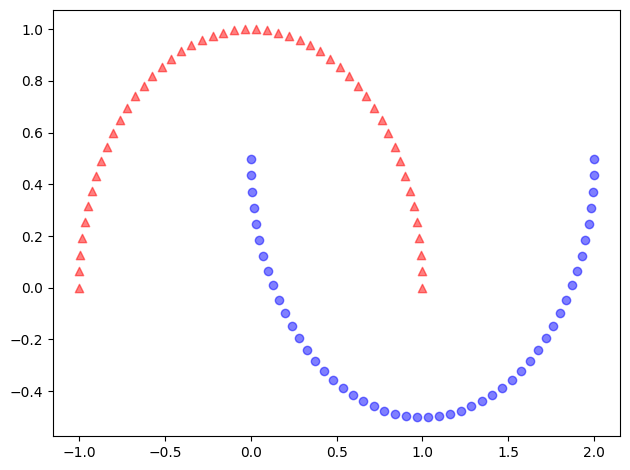

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
     color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
     color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

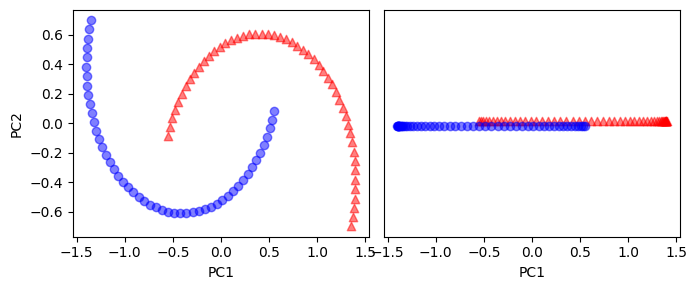

In [ ]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
               color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
               color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,
               color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,
               color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

<ipython-input-1-53fda59818fd>:26: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)


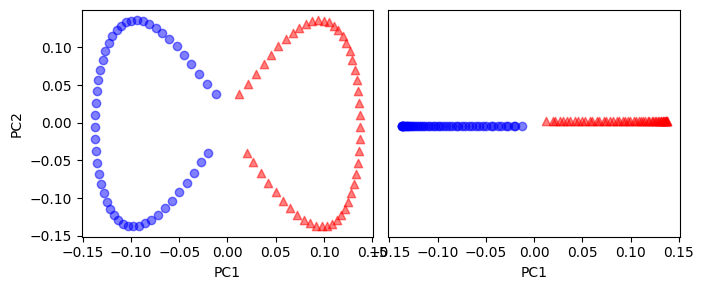

In [ ]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=4)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
               color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
               color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
               color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

<u> **General remarks** </u>
- It is worth combining linear and non linear features.
- One can learn a model predicting non linear features using a supervised learning algorithm to handle out-of-sample data embedding.


#**Practical activities**

##**Time series clustering**


### Data generation

Three waveform types (sine, square, sawtooth), with different amplitudes, offsets and periodicity.

In [ ]:
def squarewave(timevector = np.linspace(0,1,500), amp =1 , freq = 5,  phase = 0):
    sine = np.sin(2*np.pi*freq*timevector + phase)
    square = np.zeros(len(sine))
    for i, val in np.ndenumerate(sine):
        if val> 1e-10:
            square[i] = amp
        elif val < -1e-10:
            square[i] = -amp
        else:
            square[i] = 0
    return timevector, square

def sinewave(timevector = np.linspace(0,1,500), amp =1 , freq = 5,  phase = 0):
    sinewave = amp*np.sin(2*np.pi*freq*timevector+phase)
    return timevector, sinewave

def addnoise(signal1, noise_amp):
    return signal1 + np.random.normal(scale = noise_amp, size = len(signal1))

def generate_data(sr = 300, signal_length = 1,nsignals = 15, noise = .15,
                 freq_range = [2,7]):
    #sr is sampling rate, signal length in seconds, nsignals number of signals to generate
    #noise is a noise coefficient as a proportion of event amplitude
    time = np.linspace(1/sr,signal_length, sr*signal_length) #time vector
    npnts = signal_length*sr #number of points in signal
    data = np.zeros((nsignals, npnts)) #initialize data matrix
    data_labels = np.zeros(nsignals) #initialize label matrix

    for n in range(nsignals):
        signal_type = np.random.choice([1,2,3], size = 1)[0] #randomly select event type

        data_labels[n] =signal_type # save event type to data_label matrix

        #freq = np.random.choice(list(range(freq_range[0],freq_range[1]+1)))
        freq = np.random.uniform(low=freq_range[0], high=freq_range[1]) #randomly select event frequency
        amp = np.random.choice([1,2,3]) #randomly select event amplitude

        #create event based on random selections
        if signal_type == 1:
            event = sinewave(timevector = np.linspace(0, 1/freq, int(sr/freq)), freq = freq, amp = amp)[1]

        elif signal_type == 2:

            event = amp*signal.sawtooth( t = 2*np.pi*freq*np.linspace(0, 1/freq, int(sr/freq)), width=1)
        else:
            event = squarewave(timevector = np.linspace(0, 1/freq, int(sr/freq)), freq = freq, amp = amp)[1]


        #randomly embed event in signal
        start_point = np.random.randint(0, npnts-len(event), size = 1)[0]

        signal1 = np.zeros(npnts)

        signal1[start_point: start_point + int(sr/freq)] = event

        #add background noise
        signal1 = addnoise(signal1, noise*amp)

        #save signal to data matrix
        data[n, :] = signal1
    return time, data, data_labels

def standard_scaler(data):
    nsignals = len(data)
    for i in range(nsignals):
    #normalize to avoid spikes/plateaus during dtw due to differences in amplitudes
        normed_sig = (data[i]- np.mean(data[i]))/np.std(data[i])
        data[i] = normed_sig
    return data

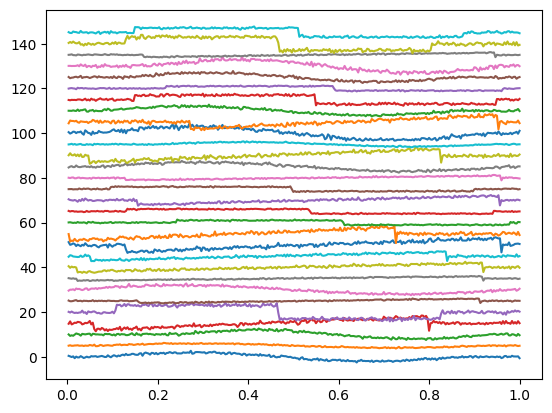

In [ ]:
#nsignals = 100, 1000, 10000
#freq_range = [1,1.5], [1,2], [1,5]
time, data, data_labels = generate_data(nsignals = 100,freq_range = [1,1.5])

nsignals = len(data)
for n in range(30):
    plt.plot(time, data[n,:]+5*n)
plt.show()

### Data Preprocessing

In [ ]:
data  = standard_scaler(data)

### 1. Visualize the dataset using PCA and Kernel PCA


In [ ]:
from sklearn.decomposition import PCA, KernelPCA

# ?PCA
#plt.scatter(X_pca[:,0],X_pca[:,1],c=data_labels)

### 2. Visualize the dataset using Manifold Learning Techniques

Change the number of neighbors (when used as an hyperparameter) to see how it affects the embedding.

In [ ]:
from sklearn.manifold import SpectralEmbedding, MDS, Isomap, LocallyLinearEmbedding

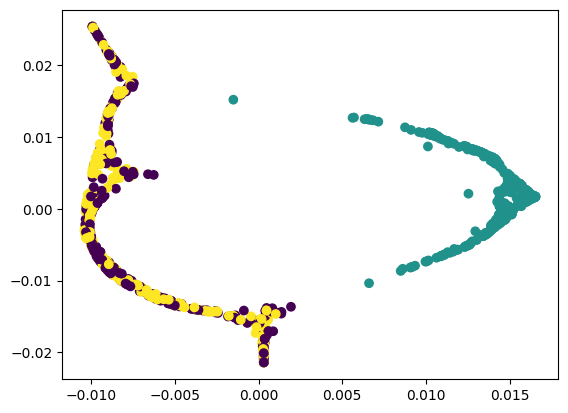

In [ ]:
embedding = SpectralEmbedding(n_components=2,n_neighbors=5)
X_transformed = embedding.fit_transform(data)
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=data_labels)

### 4. Regenerate the dataset with increasing frequency range then, number of samples

### 5. Use Dynamic Time Warping as a distance

#### Motivation: alignment based distance

<img src="https://drive.google.com/uc?id=1L9Z5UVDcF9Qou3gDy-Sx8zowvefXuHHB" alt="ml" style="width:40%" class="center">


**Formal problem**

$\text{DTW}_p(\mathbf{x},\mathbf{y}) = \underset{\pi \in \mathcal{A}(\mathbf{x},\mathbf{y})}{\text{min}}(\underset{(i,j)\in \pi}{\sum} d(x_i,x_j)^p)^\frac{1}{p}$ where

- $\pi$ is a sequence of $K$ pairs of index $((i_0,j_0),\cdots,(i_{k-1},j_{k-1}))$ called the *alignment path*

- $\mathcal{A}(\mathbf{x},\mathbf{y})$ is the set of all admissible paths.

A path is admissible if it verifies
- the start and end of the time series are matched: $(i_0,j_0) = (0,0)$ and $(i_{k-1},j_{k-1}) = (n,m)$ when $n$ and $m$ are the lengths of $\mathbf{x}$ and $\mathbf{y}$ repectively;

- the sequence is monotonically increasing in i and j; $i_{k-1}\leq i_k \leq i_{k-1}+1$ and $j_{k-1}\leq j_k \leq j_{k-1}+1$.


In [ ]:
!pip install dtw-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.5/770.5 kB 9.9 MB/s eta 0:00:00


In [ ]:
import dtw

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



<Axes: xlabel='Index', ylabel='Query value'>

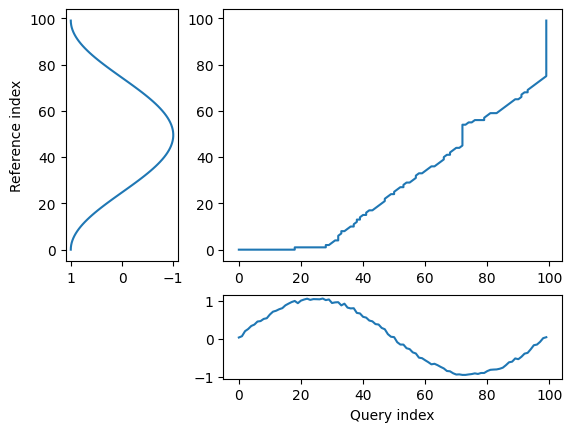

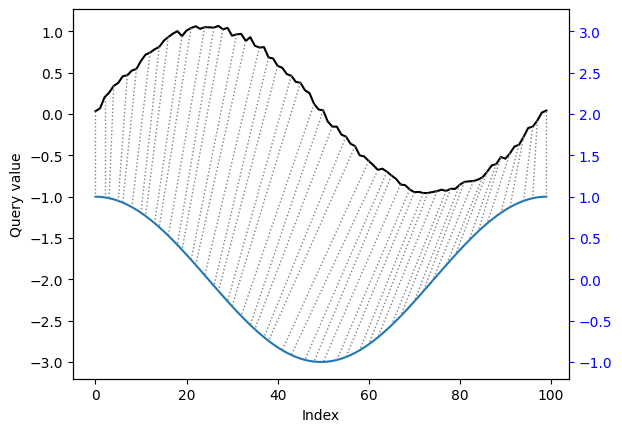

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import signal

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)



In [ ]:
alignment.distance


26.241850722638986

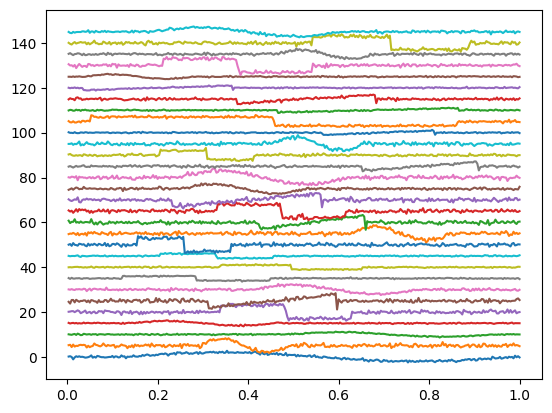

In [ ]:
#nsignals = 100, 1000, 10000
#freq_range = [1,1.5], [1,2], [1,5]
time, data, data_labels = generate_data(nsignals = 100,freq_range = [1,5])

nsignals = len(data)
for n in range(30):
    plt.plot(time, data[n,:]+5*n)
plt.show()

### Preprocessing

In [ ]:
data  = standard_scaler(data)

### 6. Compute pairwise distances using DTW



In [ ]:
def dtw_dist(data,verbose=False):

  nb_samples = data.shape[0]
  dist_mat = np.zeros((nb_samples,nb_samples))

  # Complete with a loop

  return dist_mat

In [ ]:
dist_dtw = dtw_dist(data)

### 7. Visualize using kernel PCA with DTW distance






In [ ]:
kpca = KernelPCA(n_components=2,kernel='precomputed')


### 8. Visualize the dataset using Manifold Learning Techniques with DTW distance
MDS, Spectral embedding, Isomap

### 9. Regenerate the dataset with increasing frequency range then, number of samples

### 10. Discrete Fourier Transform based approach

In [ ]:
from scipy.fft import fft

In [ ]:
time, data, data_labels = generate_data(nsignals = 100,freq_range = [1,5])
data  = standard_scaler(data)

Use the sorted modules of the DFTs as features and visualize using PCA, Kernel PCA, Spectral Embedding, Isomap and Locally Linear Embedding

### 11. Write a clustering pipeline and access accuracy

# **Unsupervised learning in high dimension Learning**

Aspects of the curse of dimensionality

- Computational burden
- No statistical significance
- Distance concentration effect
- Locally irrelevant attributes

## **Manifold Learning**

### **T-distributed Stochastic Neighbor Embedding**

*Van der Maaten, L., & Hinton, G. (2008). Visualizing data using t-SNE. Journal of machine learning research, 9(11).*

<img src="https://drive.google.com/uc?id=1Jas3rvaXi5UDh7wfC4WyCiEexONGAD2z" alt="ml" style="width:40%" class="center">

Given a set of data points $\mathbf{x}_1,\cdots,\mathbf{x}_n \in \mathbb{R}^p$, the similarity of $\mathbf{x}_i$ to $\mathbf{x}_j$ is measured by the conditional probability $p_{j|i}$ that $\mathbf{x}_i$ selects $\mathbf{x}_j$ as its neighbor under a gaussian density of neighbors hypothesis:

 $p_{j|i} = \frac{\exp(-\|\mathbf{x}_i-\mathbf{x}_j\|_2^2/2\sigma_i^2)}{\sum_{k\neq i}\exp(-\|\mathbf{x}_i-\mathbf{x}_k\|_2^2/2\sigma_i^2)}$, $\sigma_i$ being the variance of the gaussian centered on $\mathbf{x}_i$.

 Because data density is expected to vary, especillay for high dimensional dataset, $\sigma_i$ needs to be adpative, i.e., small in dense meighborhood and large in sparse regions.

 $\sigma_i$ induces the conditional probability distribution $\mathbf{P}_i = (p_{j|i})_{j\neq i}$ whose Shannon entropy is defined as

 $H(\mathbf{P}_i) = -\sum_{j\neq i} p_{j|i}\log_2(p_{j|i})$.

 $\sigma_i$ is calculated so that the quantity

 $\text{Perp}(\mathbf{P}_i)) = 2^{H(\mathbf{P}_i)}$

is equal to a user provided value.

It sets the *effective* number of neighbors of $\mathbf{x}_i$.

Thus in general $p_{j|i} \neq p_{i|j}$. The edge between $\mathbf{x}_i$ and $\mathbf{x}_j$ is instead characterized by the symmetrized conditional probability defined as

$p_{ij} = \frac{p_{j|i}+p_{i|j}}{2n}$, which ensures that $\sum_{j} p_{ij} > \frac{1}{2n}$, including for isolated $\mathbf{x}_i$'s. The overall distribution is denoted by $\mathbf{P} = (p_{ij})_{1\leq i,j\leq n}$

Let $\mathbf{y}_1,\cdots,\mathbf{y}_n \in \mathbb{R}^d$ denote the low dimensional representation of the original data and $\mathbf{Q} = (q_{ij})_{1\leq i,j\leq n}$ the induced probabilistic connectivity.

The low dimensional representation is computed in such a way to preserv the connectivity information by minimizing

$KL(\mathbf{P}||\mathbf{Q}) = \sum_{ij} p_{ij}\log{\frac{p_{ij}}{q_{ij}}}$.

Now, how are the $q_{ij}$s computed from the $\mathbf{y}_i$s ?

Suppose that a gaussian model is used as in high dimension:

$q_{ij} = \frac{\exp(-\|\mathbf{y}_i-\mathbf{y}_j\|_2^2)}{\sum_{k\neq l}\exp(-\|\mathbf{y}_l-\mathbf{y}_k\|_2^2)}$

The volume of an hypersphere of radius $r$ in $\mathbb{R}^p$ scales as $r^p$.

It implies that to map a given density (same amount of data points in the same volume) from the ambient to the low dimensional space, much larger distances will have to be involved in the low dimensional space, enforcing weak  $q_{j|i}$ values.

 However, minimizing the KL divergence imposes $q_{ij}$ to be close to $p_{ij}$ which results in the so call *crowding problem*, which is, all the data points in the low dimensional map tend to cluster, irrespective to the real underlying structure.

<img src="https://drive.google.com/uc?id=1bCKh1hd0bog9nfKfqisnSv_mervumv7u" alt="ml" style="width:40%" class="center">


This is overcome by using mapping from distances to probability densities in the low dimensional space, namely, a Student t-distribution:

$q_{ij} = \frac{(1+\|\mathbf{y}_i-\mathbf{y}_j\|_2^2)^{-1}}{\sum_{k\neq l}(1+\|\mathbf{y}_k-\mathbf{y}_l\|_2^2)^{-1}}$.

This distribution is heavy-tailed, which means that the probability densities decreases slower as a function of the distances. Thus, the high dimension dataset connectivity information can be preserved without collapsing low dimensional data points.

Then the gradient of the learning loss takes the following form:

$\nabla_{\mathbf{y}_i}KL(\mathbf{P}||\mathbf{Q}) = 4\sum_{j} (p_{ij}-q_{ij})(\mathbf{y}_i-\mathbf{y}_j)(1+\|\mathbf{y}_i-\mathbf{y}_j\|_2^2)^{-1}$.

It can be read as a combination of attractive forces from points that are close in the high dimensional space and far in the low dimensional space, and conversely, repulsive forces from points that are far in the high dimensional space and close in the low dimensional space.


<img src="https://drive.google.com/uc?id=1SIUsJRHT47Nh_nC2YNQYPI4BFaMnqO6P" alt="ml" style="width:40%" class="center">

The balance between between attractive and repulsive forces conditions the quality of the visual (link with Force-directed graph drawing).


<img src="https://drive.google.com/uc?id=1nnpWjUgQe5d8Nd_wTacaVKq1lKByUi7e" alt="ml" style="width:40%" class="center">

**Application to large datasets (>10000 points)**

T-SNE has a memory and computational complexity in $O(n^2)$ (as Isomap for instance), n being the number of data points.
While this is untractable for large scale datasets, it is possible to display a subset of data points, making use of the connectivity information of the complete dataset by means of a random walk.

The first step consists in constructing a k-nearest neighbors graphs, assigning each edge the weight $e^{-\|\mathbf{x}_i-\mathbf{x}_j\|_2^2}$. Then for each point of the sampled subset, a random walk is initiated at that point and terminated as soon as another point from the subset is reached. During the random walk, the probability of choosing an edge emanating from a node $i$ to a node $j$ is equal to $\frac{e^{-\|\mathbf{x}_i-\mathbf{x}_j\|_2^2}}{\sum_{k\neq i}e^{-\|\mathbf{x}_i-\mathbf{x}_k\|_2^2}}$. Then $p_{j|i}$ is defined as the fraction of the random that started at $i$ and terminated at $j$. This is somewhat similar to Isomap geodesic distance estimation, with the difference that $p_{j|i}$ results from an averaging over several paths, making these procedure more robust to noisy data points.


<u>Remarks</u>
- Cluster sizes and distances are not necessarily comparable, due to localized and normalized connectivity information.
- Non convex problem: different runs with different initializations will produce different embeddings.
- There is no guarantee that the tail mismatch between the gaussian probability density in high dimension and the Student t-distribution in low dimension remains relevant for embeddings in dimensions higher than 2 or 3.
- The perplexity parameter will generally require fine tunning.

More information here: https://distill.pub/2016/misread-tsne/.




<img src="https://drive.google.com/uc?id=1K0r_LaIUDZQnt0lI5uey22ceYPMSKZcF" alt="ml" style="width:40%" class="center">


### **Universal Manifold Approximation and Projection for dimension reduction (UMAP)**
*McInnes, L., Healy, J., & Melville, J. (2018). Umap: Uniform manifold approximation and projection for dimension reduction. arXiv preprint arXiv:1802.03426.*

*Claims*:
- More scalable
- Better preservation of global structure
- No restriction on embedding dimension

<img src="https://drive.google.com/uc?id=1AjyswLTRsgFn0gGO0UmS11bP4HPlJrcL" alt="ml" style="width:40%" class="center">

**Nerve theorems** from *algebraic topology* provides guarantees for approximating a topological space (the underlying Manifold in our case) from a simplicial complex, given an open cover of the topological space.

**UMAP = Application of these tools to real datasets.**

1. Open cover:

  An *open cover* of the underlying manifold can be approximated from the samples by creating ball of a given radius about each data point.

  Choosing the radius with variable densities in the ambient space is tricky. Assume instead that data are actually uniformly sampled from the underlying manifold, so that ambient space density variations are due to change in the manifold metric. As a consequence, a ball centered at  $\mathbf{x}_i$ that contains exactly the k-nearest-neighbors of $\mathbf{x}_i$ should have approximately a fixed volume for any $\mathbf{x}_i$ in the dataset. This gives motivation for using a k-nearest-neighbors graph. Besides, each $\mathbf{x}_i$ has is own local metric with a unit distance defined as the distance between the central point and its further neighbor.

2. Fuzzy topology

  Assigning weights to each edge as a value between 0 and 1 depending on the local distance and to be interpreted as the probability that the edge is actually with a set of an open cover of the underlying manifold.

3. Connectivity

  Make sure no point is isolated: the weight of the edge between a given point and its nearest neighbor is set to 1 and the weight; the subsequent edges weights decay as function of the distances to the neighbors beyond the closest one.
  
  The weights are calculated as  follows. For a data point $\mathbf{x}_i$, $\{\mathbf{x}_{i_1},\cdots,\mathbf{x}_{i_k}\}$ denotes the set of its k nearest neighbors. $\rho_i = \min\{\|\mathbf{x}_{i}-\mathbf{x}_{i_j}\|_2, j \in \{1,\cdots,k\} \}$.

  Then the weight of the directed edge $(\mathbf{x}_{i},\mathbf{x}_{i_j})$ is given by
  
  $w(\mathbf{x}_{i},\mathbf{x}_{i_j}) = \exp((\rho_i-\|\mathbf{x}_{i}-\mathbf{x}_{i_j}\|_2)/\sigma_i)$,
  
  where $\sigma_i$ is a parameter that controls the weight's decay beyond the nearest neighbor.
  
  This normalization mitigates the concentration effect in high dimension as it amounts to stress the distances differences.

4. Merging edges weights
  
  Let w_{ij} denote the weight of the directed edge $(\mathbf{x}_{i},\mathbf{x}_{j})$ and $w_{ji}$ that of $(\mathbf{x}_{j},\mathbf{x}_{i})$. The symetrised is computed as $\bar{w_{ij}} = w_{ij}+w_{ji}-w_{ij}w_{ji}$, which can be understood as the probability that either of the two edges exists.

<img src="https://drive.google.com/uc?id=1-pBqwC2-_uKSnPRzp0vPWc_FimcvmgV8" alt="ml" style="width:40%" class="center">

5. Computing the low dimensional embedding
  The weight function in the low dimensional space $\mathbb{R}^p$ takes the form $φ(\mathbf{y_1},\mathbf{y_2}) = 1 \text{ if } \|\mathbf{y_1}-\mathbf{y_2}\|_2 < \text{ dist_min }$ and $φ(\mathbf{y_1},\mathbf{y_2}) = \exp(\text{min_dist}-\|\mathbf{y_1}-\mathbf{y_2}\|_2)$ otherwise. dist_min is an hyperparameter.

  Then the embedding computation consists in minimizing the cross entropy between the membership strenght discrete function $(w_{ij})_{1\leq i,j \leq n}$ and $(φ(\mathbf{y_i},\mathbf{y_j}))_{1\leq i,j \leq n}$, using a smooth approximation of $φ$.

<img src="https://drive.google.com/uc?id=1QLvtBTMDwWsOOViTG1tP9BRaza3Ibm4y" alt="ml" style="width:40%" class="center">


<u> Remarks </u>:
- Considerably faster: for e.g, UMAP takes less than 3 minutes to project 70,000-point MNIST dataset compared to 45 minutes for scikit-learn's t-SNE implementation.

- Hyperparameters are more intuitive.

- Cluster sizes and distances are not necessarily comparable, due to localized and normalized distances.

- The hyperparameters will generally require fine tunning.

## **Autoencoders**

<img src="https://drive.google.com/uc?id=1P0igAeah4llVpUZeV4msVuoSp7WaXMJI" alt="ml" style="width:40%" class="center">

- An autoencoder is a neural network that learns the identity function on the data samples manifold, computing in doing so a useful data representation.
- It consists in two parts: an *encoder* function $f(\mathbf{x}) = \mathbf{h}$, $\mathbf{x} \in \mathbb{R}^p$, $\mathbf{h}\in \mathbb{R}^d$ and a *decoder* function $g(\mathbf{h}) \approx \mathbf{x}$.

Because it is trained to replicate only inputs that ressemble the training data, an autoencoder is expected to capture interesting properties of the data.

An autoencoder can be considered a special case of feedforward neural network and trained using the same techniques.
I can also be trained using **recirculation**, a biologically more plausible learning scheme introduced in *Hinton, G. E., & McClelland, J. (1987). Learning representations by recirculation. In Neural information processing systems*.




### **Undercomplete autoencoder**

If the codes size $d$ is equal or greater than the data ambient space dimension $p$, the autoencoder might just trivially learn the identity function everywhere. A common means for avoiding this issue is to impose a bottleneck architecture, which is setting $d<p$. The autoencoder is then said to be undercomplete and the encoder perfoms a dimension reduction.

The learning loss takes the following form: $\mathcal{L}(\mathbf{x},g(f(\mathbf{x})))$.


If $\mathcal{L}$ is a mean square error and if the decoder $g$ is linear, the autoencoder ultimately learns the training data principal subspace.

Nonlinear encoder and decoder allow for a stronger representation power that PCA, for a fixed code's size.

Note that, even in this setting, if the autoencoder is too powerful, it might overfit the training data and learn a lookup table. With enough parameters, one might get a small reconstruction error with a code size $d=1$. Hence a regularization is needed to control the autoencoder capacity, both in undercomplete and overcomplete configurations.



###**Sparse autoencoder**


<img src="https://drive.google.com/uc?id=1RRUxJ1Q_n5LMDagqQlpj8j1Ar_NgNdik" alt="ml" style="width:40%" class="center">

A common regularizer consists on imposing sparsity over the codes, which is $\mathbf{h}$ has to have far less non-zero values than the overall code's size $d$. This way, even if the autoencoder is overcomplete (d>p), one can ensure that it learns non trivial structures.

- This can be implemented by adding a sparsity inducing penalty to the loss function:  $\mathcal{L}(\mathbf{x},g(f(\mathbf{x})))+ \Omega(\mathbf{h})$.

  $\Omega$ might be chosen as the $l_1$ norm: $\Omega(\mathbf{h}) = \lambda\sum_{i=1}^d |h_i|$n where $h_i$ is the $i^\text{th}$ component of $\mathbf{h}$ and $\lambda$ is an hyperparameter.

- Sparsity can also be hard coded using a Rectified Linear Unit (ReLU) as an activation function for the codes layer, for instance.





###**Contractive autoencoder**

On the other hand, a Contractive autoencoder (CAE) enforces the encoder's derivatives to be small in the viscinity of the samples. The regularizer is defined as

$\Omega(\mathbf{h}) = \lambda\|\mathbf{J}_f(\mathbf{x})\|_F^2$, where $\mathbf{J}_f(\mathbf{x})$ is the jacobian matrix of $f$.

If the autoencoder is trained to perfom classification on the codes, then applying the contractive penalty on $f$ yields better features than applying it to $f \circ g$, in other words, at the decoders output.

The jacobian matrix $\mathbf{J}_f(\mathbf{x})$ provides a linear approximation of $f$ in the viscinity of a sample $\mathbf{x}$ following first order Taylor expansion as

$f(\mathbf{x}+\mathbf{u}) \underset{\mathbf{u} → \mathbf{0}}{=} f(\mathbf{x})+ \mathbf{J}_f(\mathbf{x})\mathbf{u} + o(\|\mathbf{u}\|)$, where we recall that $\mathbf{J}_f(\mathbf{x}) \in \mathbb{R}^{d\times p}$.

In the operator theory, the matrix $\mathbf{J}_f(\mathbf{x})$ is contractive if $\|\mathbf{J}_f(\mathbf{x})\mathbf{x}\|\leq 1$ whenever $\|\mathbf{x}\|\leq 1$. Thus, contractive autoencoder can be formally characterizes as enforcing the linear approximations of $f$ around the samples to be contractions.

The CAE penalty enforces $f$ to be constant around $\mathbf{x}$. On the other hand, the reconstruction error penalty implies that $f$ varies fast in densely sampled region. In such regions, $f$'s derivatives are expected to take strong values along the data manifold, i.e. in the tangent space, and to vanish elsewhere, i.e. in the directions orthogonal to the tangent space.

Hence, in dense regions, $\mathbf{J}_f(\mathbf{x})$ rows approximately spans the tangent space at $\mathbf{x}$.  
The tangent vectors at $\mathbf{x}$ can be estimated as the leading singular vectors of $\mathbf{J}_f(\mathbf{x})$.


<img src="https://drive.google.com/uc?id=1d7IESjjxptNJhOgMb2OVmfBYI19AdmnJ" alt="ml" style="width:40%" class="center">
Eigenvectors from local PCA

<img src="https://drive.google.com/uc?id=1KAKS658eOuNKCh8AKGKkqufa9F8mRebd" alt="ml" style="width:40%" class="center">
Estimated tangent vectors

They are doubly interesting. On the one hand, they give insights into the properties the model has learnt.

Assuming that the original dataset consists of data lying on different submanifolds associated with to different classes, the tangent vectors can be used for regularization in a downstream classification task.

Indeed, the response of the classifier must be invariant under small displacements in tangent space, since such displacement does not change the class of the sample.

Let $\mathbf{u}_1(\mathbf{x}),\cdots,\mathbf{u}_k(\mathbf{x})$ denote the set estimated of tangent vectors at $\mathbf{x}$, and $o(\mathbf{x})$ the classifier's output. The *tangent propagation* regularizer is defined as

$T(\mathbf{x}) = \sum_{i=1}^k \|\frac{\partial o(\mathbf{x})}{\partial \mathbf{x}}(\mathbf{x})\mathbf{u}_i\|_2^2$, $\frac{\partial o(\mathbf{x})}{\partial \mathbf{x}}(\mathbf{x})$ being the jacobian matrix of $o$ at $\mathbf{x}$.

- This amounts to an implicit data augmentation.

- It is worth noting that if $f$ was linear, the jacobian matrix would have been constant, preventing local tangent spaces estimation.



###**Denoising autoencoder**
<img src="https://drive.google.com/uc?id=1WWyO26jRzQ6Rps9rkOuxxOYE-UF04plK" alt="ml" style="width:40%" class="center">


Alternatively, the autoencoder training might be constrained by modifying the reconstruction error. A Denoising autoencoder (DAE) minimizes the following loss function:

$\mathcal{L}(\mathbf{x},g(f(\mathbf{\tilde{x}})))$, where $\mathbf{\tilde{x}}$ is a noisy version of $\mathbf{x}$.

Thus, a DAE has to recover the noise free samples, rather than simply copying its imput.

Moreover, assuming that $\mathbf{\tilde{x}} =\mathbf{x}+ \mathbf{n}$ with $\mathbf{n} \sim \mathcal{N}(0,\sigma \mathbf{I})$, it has been shown that the theoretical optimal reconstruction $r^*_\sigma(\mathbf{x})$ has the following asymptotic behavior:

$r^*_\sigma(\mathbf{x}) \underset{\sigma → 0}{=} \mathbf{x}+ \sigma^2\frac{\partial p_{\text{data}}(\mathbf{x})}{\partial \mathbf{x}} + o(\sigma^2)$, $p_{\text{data}}(\mathbf{x})$ being the probability density function of the data (*Alain, G., & Bengio, Y. (2014)*).

It suggests that a DAE implicitly learns properties of the generating distribution of the data, regardless of the model representation power. It thus provides a powerful regularization approach.

A DAE maps a corrupted observation $\tilde{\mathbf{x}}$ back to a higher density region of the data distribution following the vector $g(f(\tilde{\mathbf{x}}))-\tilde{\mathbf{x}}$.


The CAE makes $f$ insensitive to infinitesimal perturbations of the samples while DAE makes the reconstruction insensitive to small size noise. There are close links between these two models. Indeed, it has been shown that a DAE is equivalent to a CAE, with the contractive penalty on the autoencoder output rather than the encoder.

Overall, regularization tends to keep the autoencoder response as insensitive to the input as possible. It enforces $f$ to filter out some information in $\mathbf{x}$. On the contrary, reconstruction penalty enforces strong variation of the  autoencoder response in dense regions of the data manifold to keep distinguishing the data samples.
As a consequence, the combination of both forces results in the autoencoder learning data manifold properties that might serve downstream tasks.



## **General considerations on neural networks**

<img src="https://drive.google.com/uc?id=1nLOgWDPWlwzZefS969lLkpwHWKYSbAyY" alt="ml" style="width:40%" class="center">

**Challenges in Machine Learning**

- Statistical error: learning from samples
- Approximation error: searching in the right function space
- Optimization error: finding the right function in the narrowed optimization space


###**Architecture and representation power**



####**Universal approximation theorem**:
  
  - A feedforward network with a linear output layer and at least one hidden layer with any sigmoïdal activation function can approximate any continous function on a close and bounded subset of $\mathbb{R}^p$, *Cybenko, G. (1989).*
  - Universal approximation theorem later proved for Rectified Linear Unit (ReLU).

<img src="https://drive.google.com/uc?id=1XXMbq0ulOFpUQq8H152GTXjqLOj719ec" alt="ml" style="width:40%" class="center">




####**Activation functions**

*ReLU*: $g(\mathbf{x}) = \max\{0,\mathbf{x}\}$

- The most used activation function for hidden layers, by far.

- Simple to optimize: constant gradient non zero gradient when activated.

- Drawback: zero gradient when inactive.
  Hence its variants: which takes the general form $g(x) = \max\{0,x\}+\alpha\min\{0,x\}$ (small positive $\alpha$ for Leaky ReLU, learnable $\alpha$ for Parametric ReLU, $\alpha=-1$ for absolute value.

Non linear Models are easier to optimise if their behavior is close to linear.


However, with a *single hidden layer*, good approximation error may require an untractably large number of neurons.

Using a deeper model reduces the number of needed neurons to approximate the desired function.




####**Representation power**

Specifically, consider a feedforward neural network defined by the function

$f: \mathbb{R}^p → \mathbb{R}^d$, $\mathbf{x}\mapsto f(\mathbf{x}) = f_{out} \circ g_l \circ f_l \circ \cdots \circ g_1 \circ f_1(\mathbf{x})$.

where $f_i$ is a linear pre-activation function $f_i(\mathbf{z}) = \mathbf{A}_i\mathbf{z}+\mathbf{b}_i \in \mathbb{R}^n$ and $g_i$ is a piece-wise linear activation function.

$f$ is piece-wise linear over $O((C^p_n)^{p(l-1)}n^p)$ polytopes in $\mathbb{R}^p$ (*Montufar, G. F.et al (2014)*).

Hence, $f$ has an exponentially growing expressivity as a function of the number of layers, while the number of parameters only scales linearly with $l$.



####**Piece-wise affine view**

The $i^{th}$ hidden layers output takes the form

$\mathbf{z}^{(i)}(\mathbf{x}) = \mathbf{A}^{(i)}(\mathbf{x})\mathbf{z}^{(i-1)}(\mathbf{x})+\mathbf{b}^{(i)}(\mathbf{x})$, with the convention $\mathbf{z}^{(0)} = \mathbf{x}$. $\mathbf{A}^{(i)}$ and $\mathbf{b}^{(i)}$ depend on $\mathbf{x}$ due to the activation function.

By composition, one can write

$f(\mathbf{x}) = \mathbf{A}_f(\mathbf{x})\mathbf{x}+\mathbf{b}_f(\mathbf{x})$, where $\mathbf{A}_f$ and $\mathbf{b}_f$ are constant in the previously mentionned polytopes.

In a feedforward network, the final prediction is based on the composition of learned **distributed representation** which are affine mappings shared across different activation paths.

<img src="https://drive.google.com/uc?id=16LqmorUfFq16jNDLSYPFcJL0N_B-2xJv" alt="ml" style="width:40%" class="center">

From manifold learning perspective, distributed representation is critical in high dimension:
- numerous variability factors,
- actual neighbors on the manifold, as assumed by non parametric methors are rare in high dimensional datasets.

Distributed representation ultimately consists in extracting interesting features shared by non necessarily neighbor data point in the ambient space.


*Parallel with decision trees*

<u>Similarities</u>
- Produces a space partionning in polytopes
- Filters out some dimensions prior to inference making

<u>Differences</u>
- hierarchical splitting from one root in one pass while partionning is generated combinatorially from multiple roots and refined iteratively in feedforward neural network.
- axis parallel splitting (not fundamental)
- limited information sharing between polytopes.
- data present in each polytope for DT.


*Template matching view*

We saw previously that one could visualize tangent vectors estimates in contractive autoencoders and access in this way, what the models has learnt.

In the piece-wise affine view, one can consider that the neural network performs a template matching.
The filters learnt for each polytope can be extracted and visualized (computing model gradient with respect to the data).

<img src="https://drive.google.com/uc?id=1EouvSQqAWdEkrs5lm32y-G9s53xq-S_K" alt="ml" style="width:40%" class="center">

*Balestriero, R. (2018, July). A spline theory of deep learning. In International Conference on Machine Learning (pp. 374-383). PMLR.*




####**Symmetries**

<img src="https://drive.google.com/uc?id=1b0LUvQ3rE0aQa_kJBWRsjeG25i5sCJjE" alt="ml" style="width:40%" class="center">

*DNA Reverse-complement symmetry*

**Data augmentation**

- Explicit

<img src="https://drive.google.com/uc?id=14VhBj0jTl5Q6jrhxrhbigYYtCqPkDHZt" alt="ml" style="width:40%" class="center">

- Implicit:
$\frac{d f(s_{\theta}(\mathbf{x}))}{d\theta} = \mathbf{0}$


**Built-in invariance**

*The case of Convolution*

- From translation equivariance to circulant matrices
- First generalization: group convolution

<img src="https://drive.google.com/uc?id=1v-EiHPzvw1tzf7xLp5SS8DYINqQnf3XY" alt="ml" style="width:40%" class="center">

- Second generalization: geometrical domains convolution.
  - Convolution theorem

More information: *Bronstein, M. M., Bruna, J., Cohen, T., & Veličković, P. (2021). Geometric deep learning: Grids, groups, graphs, geodesics, and gauges. arXiv preprint arXiv:2104.13478.*


